In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [39]:
grades=pd.read_csv('Grades.csv')

df=grades.copy()

df

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[571 rows x 43 columns]

In [3]:
df['PH-121'].unique

<bound method Series.unique of 0      B-
1       A
2       A
3       D
4      A-
       ..
566     B
567    A+
568     B
569     A
570     C
Name: PH-121, Length: 571, dtype: object>

We have all columns as categorical columns, need to convert them into numerical columns before proceeding


Seat No column is not required, dropping it

In [4]:
X=df.drop(['CGPA','Seat No.'],axis=1)
y=df['CGPA']

In [7]:
for x in X.columns:
    print(x)
    print('-------------------------')
    print(X[x].nunique())
    print()

PH-121
-------------------------
13

HS-101
-------------------------
12

CY-105
-------------------------
13

HS-105/12
-------------------------
13

MT-111
-------------------------
13

CS-105
-------------------------
11

CS-106
-------------------------
13

EL-102
-------------------------
13

EE-119
-------------------------
12

ME-107
-------------------------
13

CS-107
-------------------------
14

HS-205/20
-------------------------
13

MT-222
-------------------------
14

EE-222
-------------------------
13

MT-224
-------------------------
14

CS-210
-------------------------
14

CS-211
-------------------------
14

CS-203
-------------------------
13

CS-214
-------------------------
13

EE-217
-------------------------
13

CS-212
-------------------------
12

CS-215
-------------------------
14

MT-331
-------------------------
12

EF-303
-------------------------
12

HS-304
-------------------------
14

CS-301
-------------------------
12

CS-302
-------------------------

In [8]:
for column in X.columns:
    print(f"Unique values in the '{column}' column:")
    print('-------------------------')
    print(X[column].unique())
    print()


Unique values in the 'PH-121' column:
-------------------------
['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']

Unique values in the 'HS-101' column:
-------------------------
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']

Unique values in the 'CY-105' column:
-------------------------
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' nan 'WU' 'A+' 'F']

Unique values in the 'HS-105/12' column:
-------------------------
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' nan 'WU' 'A+' 'F']

Unique values in the 'MT-111' column:
-------------------------
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' nan 'A+' 'F' 'WU']

Unique values in the 'CS-105' column:
-------------------------
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']

Unique values in the 'CS-106' column:
-------------------------
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' nan 'A+' 'F' 'WU']

Unique values in the 'EL-102' column:
-------------------------
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+'

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Quite a lot Null Values Present, need to handle these null values

<Axes: >

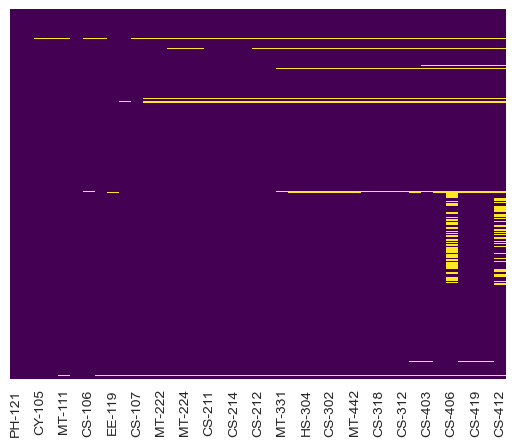

In [12]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df1=df.copy()


df1.dropna()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423  \
0       B-  ...     C-     C-     C-     C-     A-      A     C-      B   
1       D+  ...     D+      D      C      D     A-     B-      C      C   
2       A-  ...      B      B      A      C      A      A      A     A-   
3        D  ...     D+      C     D+     C-     B-      B     C+     C+   
4        A  ...     B-     B+     B+     B-     A-      A     A-     A-   
..     ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
566     A+  ...     A-     A-      A      A      A     B+     B+      B   
567      A  ...     B+     B+      A      A     A-      B     A-      C   
568      A  ...     A-      B      A     B+      A      C     B+     A-   
569     B-  ...      D      B      B     C-      D      C      B     B-   
570      C  ...     C+      C     B-      D      F     C-     B+      D   

    CS-412   CGPA  
0       A-  2.205  
1        B  2.008  
2        A  3.608  
3       C+  1.906  
4        A  3.448  
..     ...    ...  
566      A  3.798  
567     A-  3.772  
568     A-  3.470  
569      C  2.193  
570     C-  1.753  

[417 rows x 43 columns]

Cannot Drop Null values as we are loosing significant amount of data (27%)

But at the same time, it seems like we cannot impute null values as imputed values may affect CGPA Adversly 

C:\Users\dnyan\AppData\Local\Temp\ipykernel_22264\588870486.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


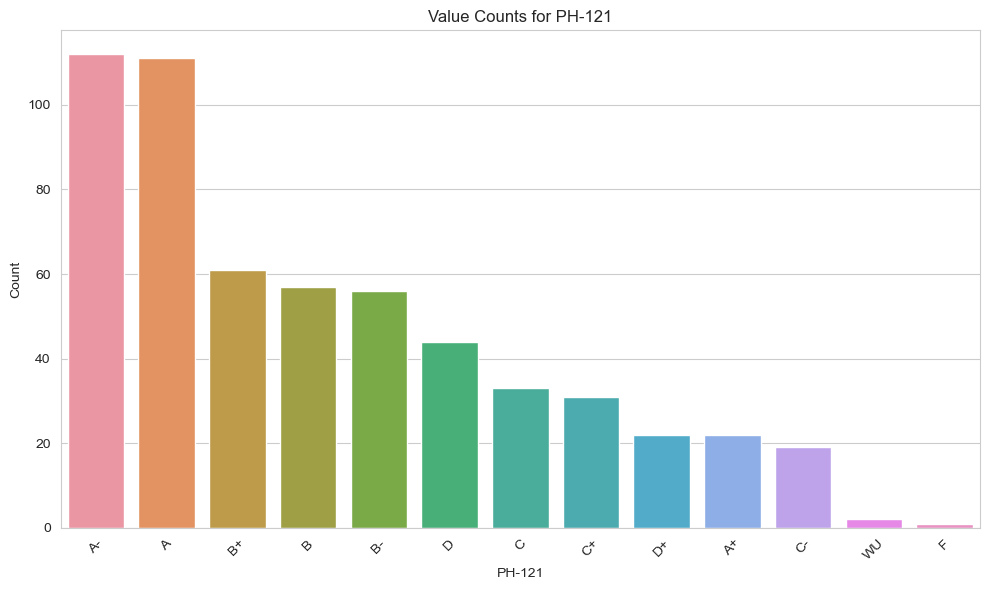

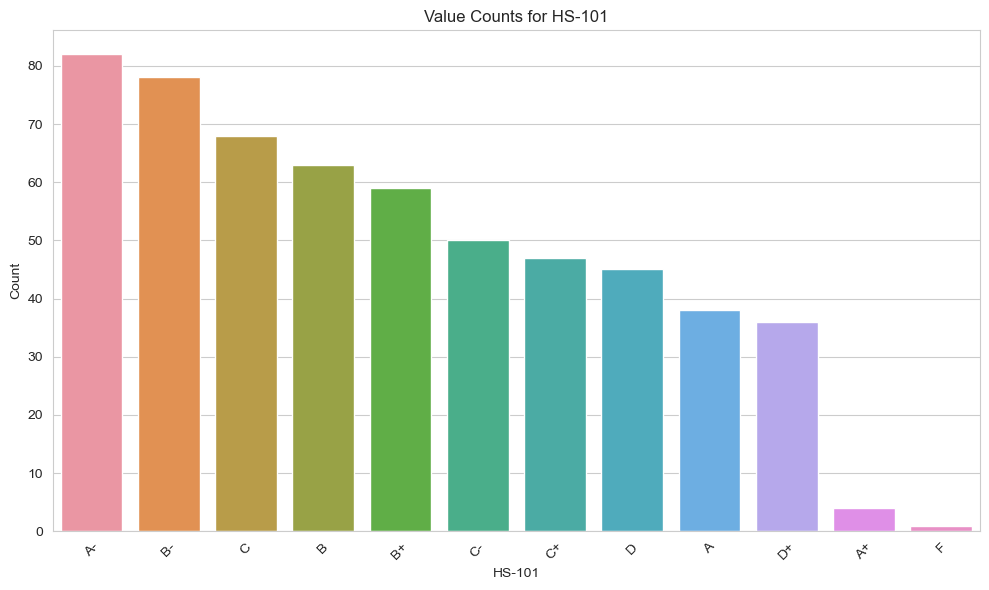

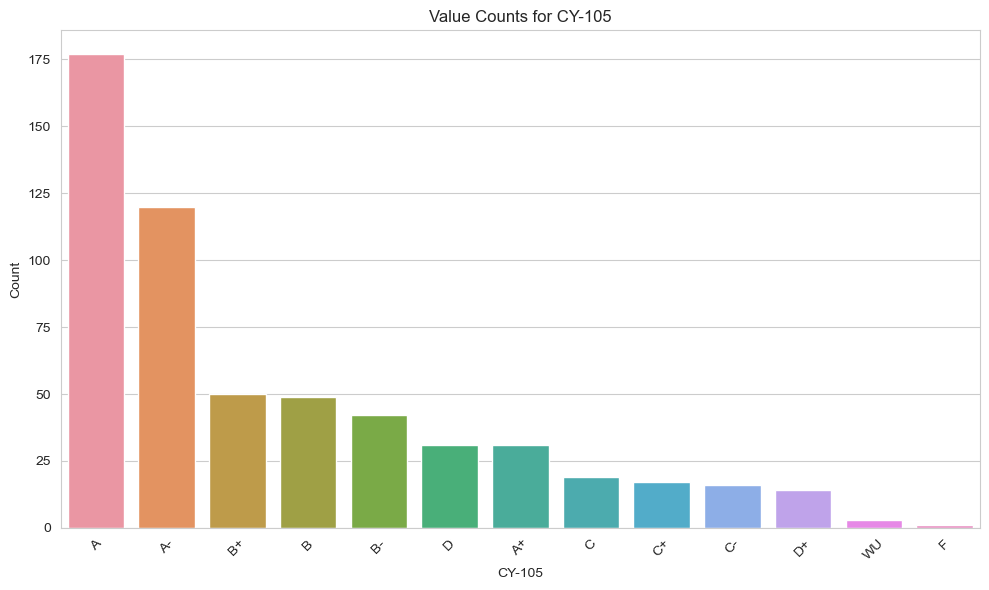

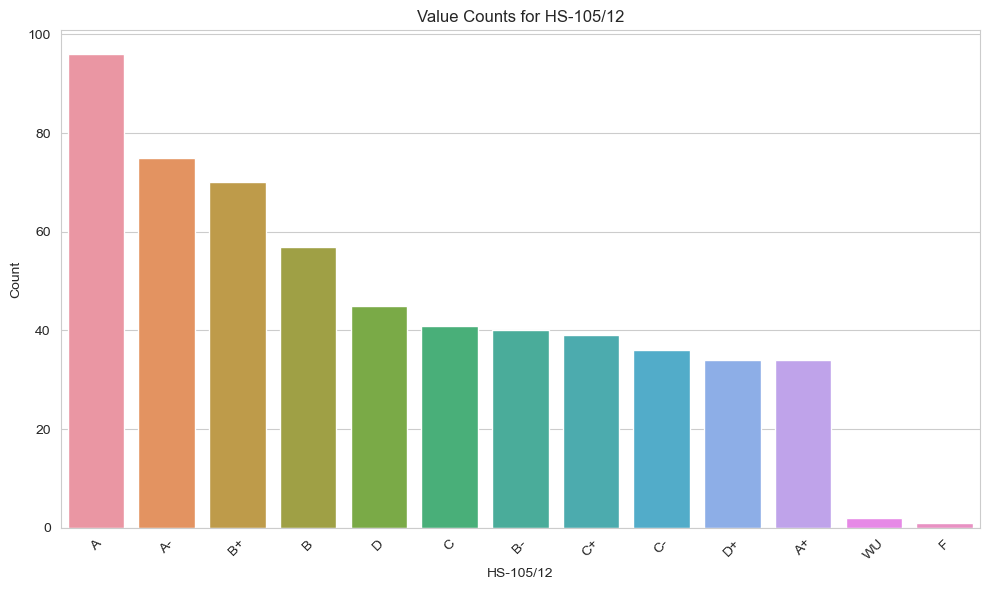

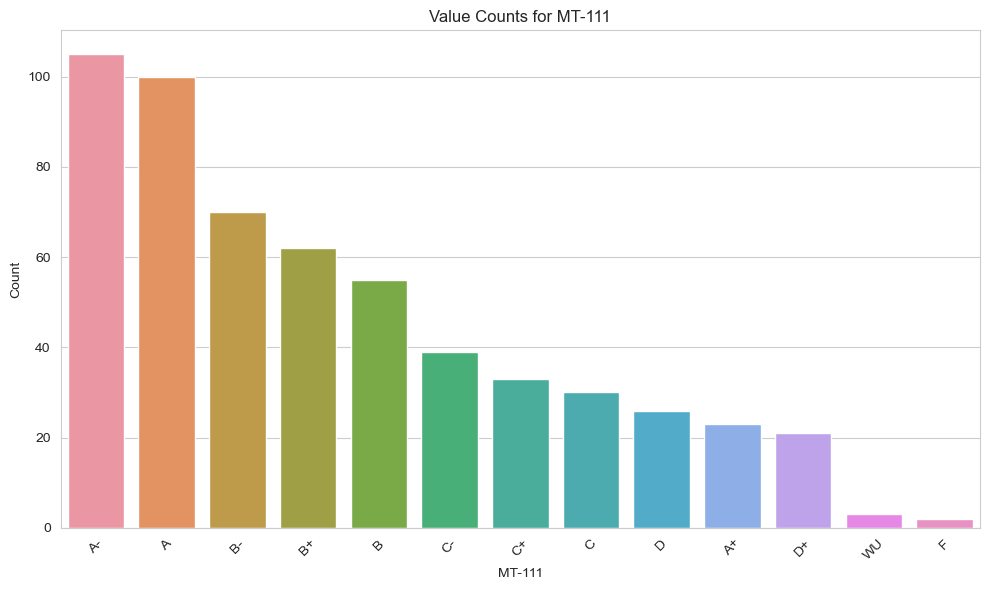

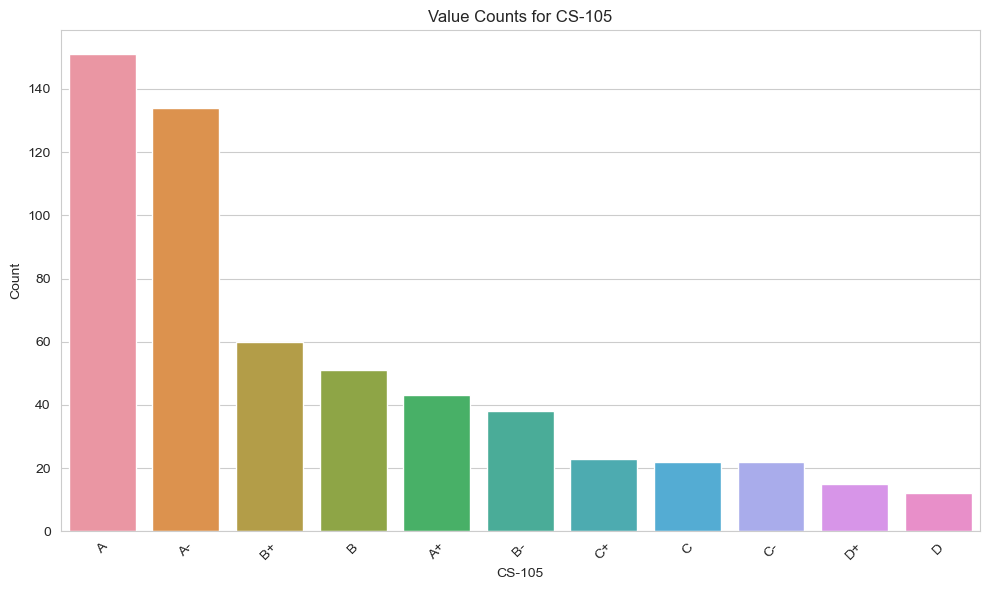

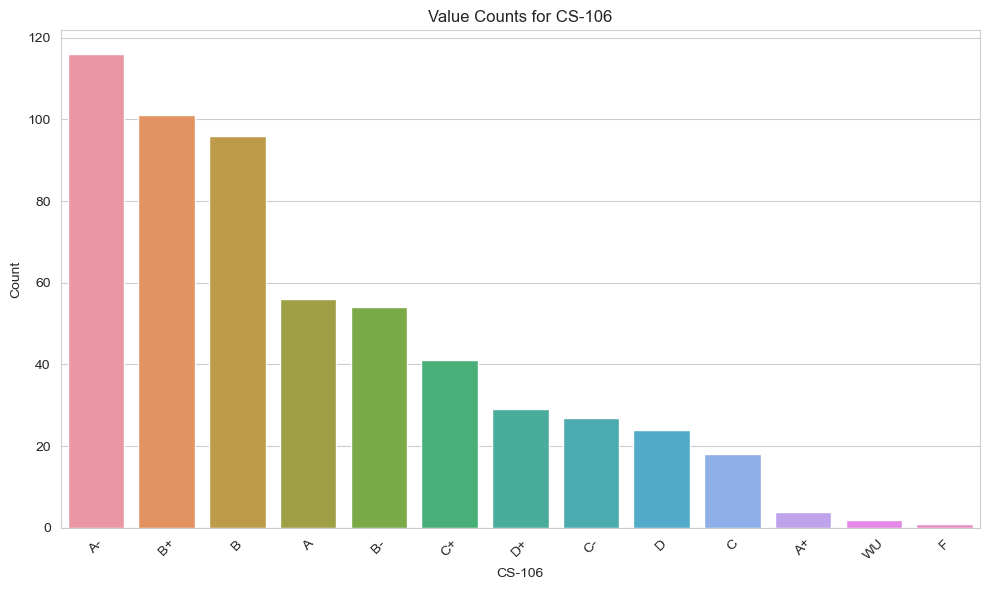

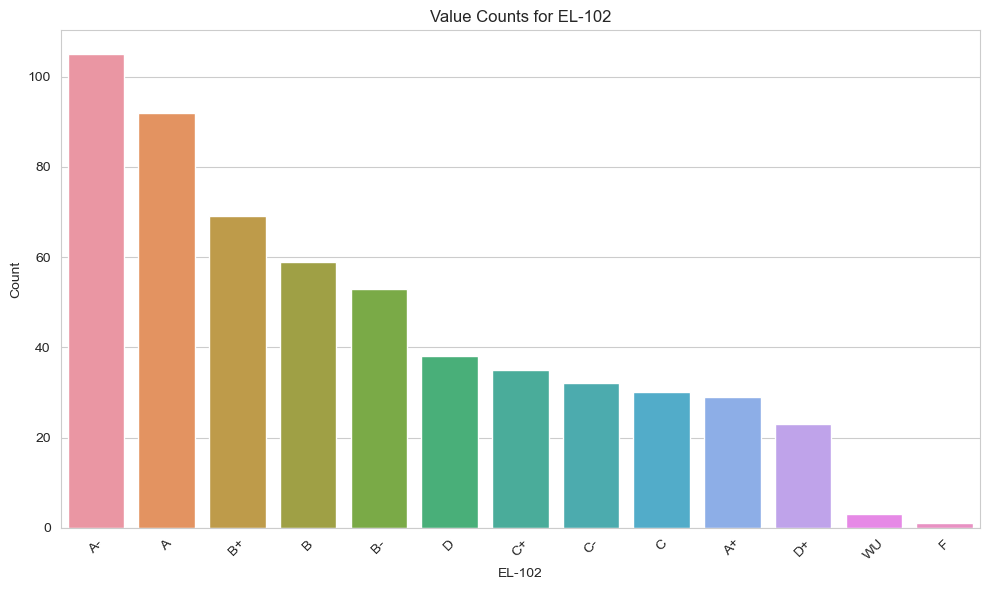

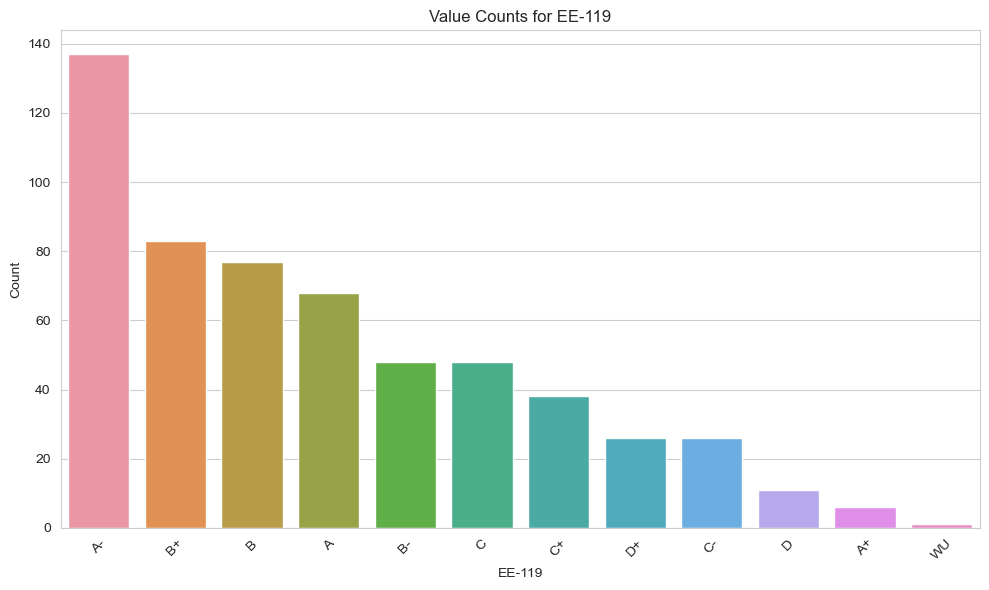

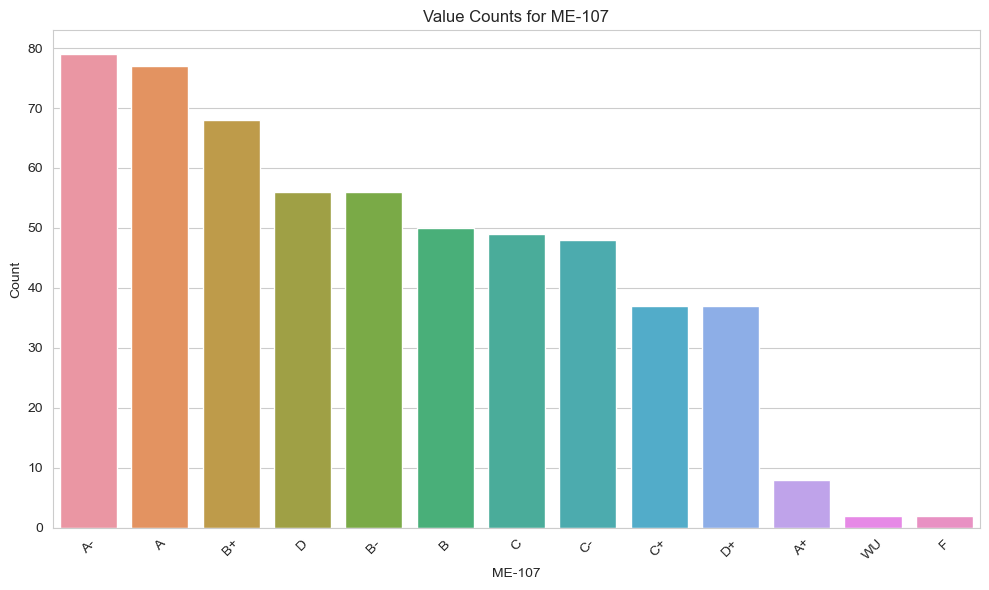

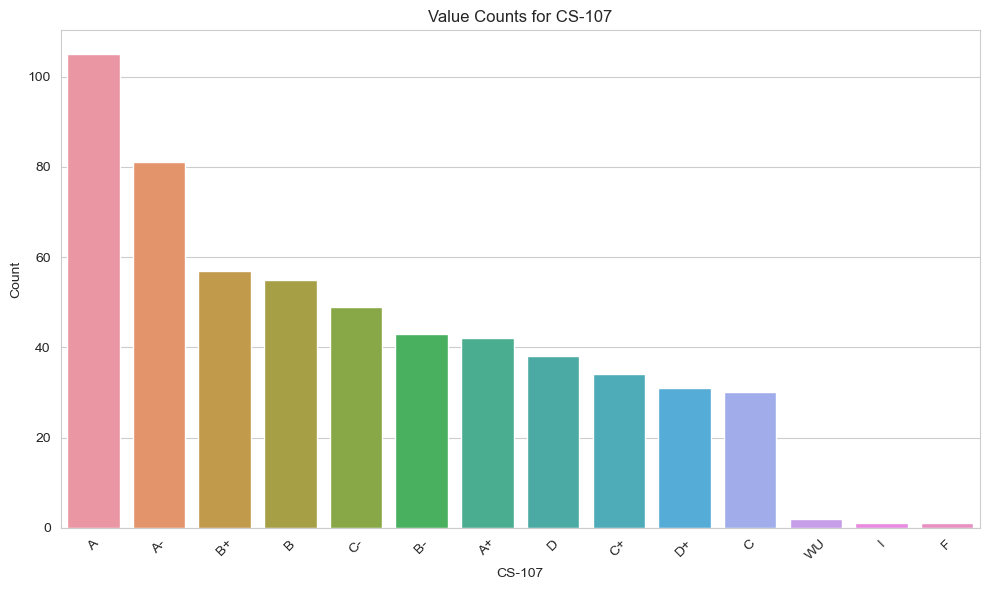

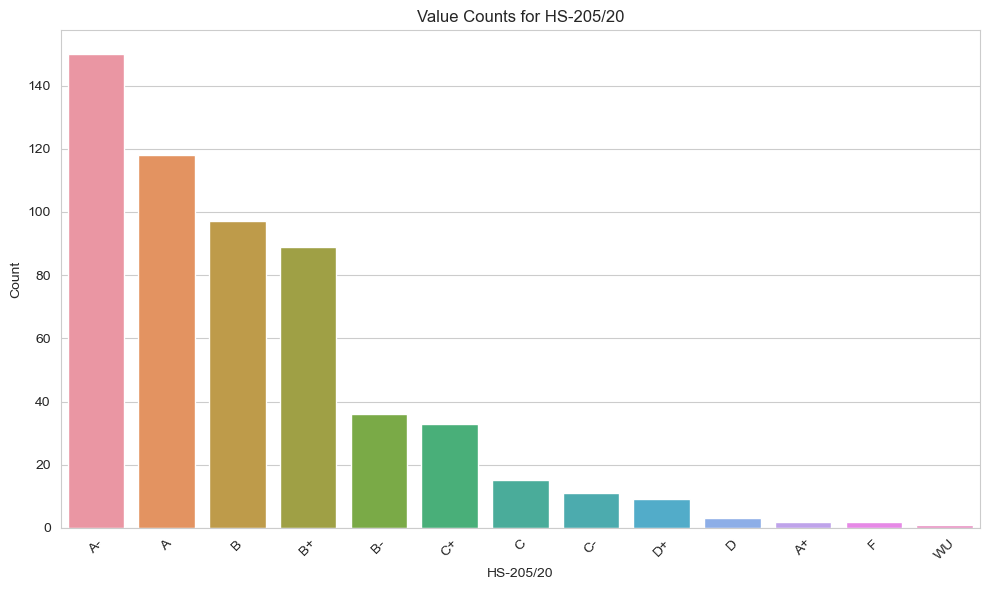

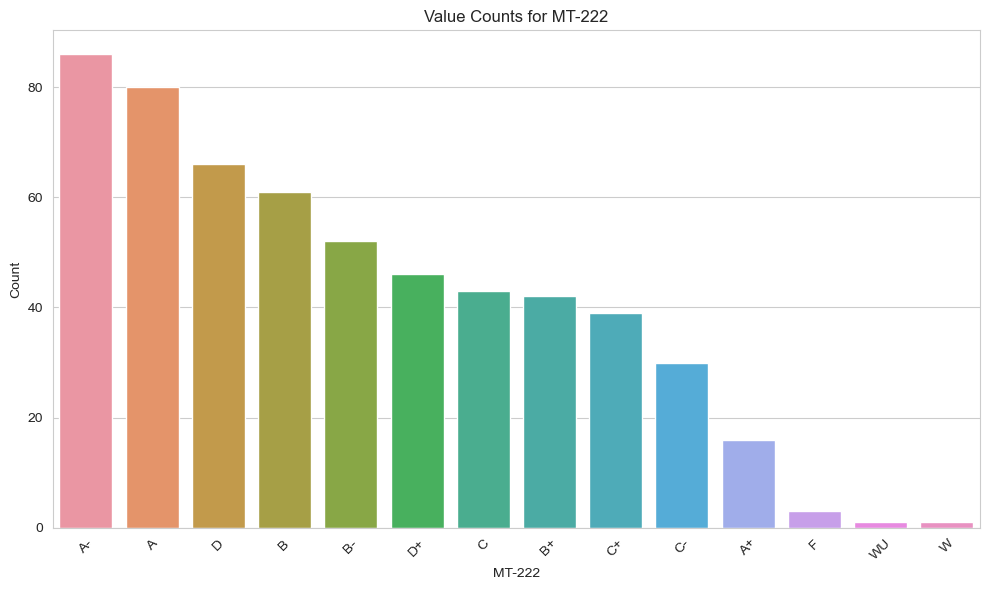

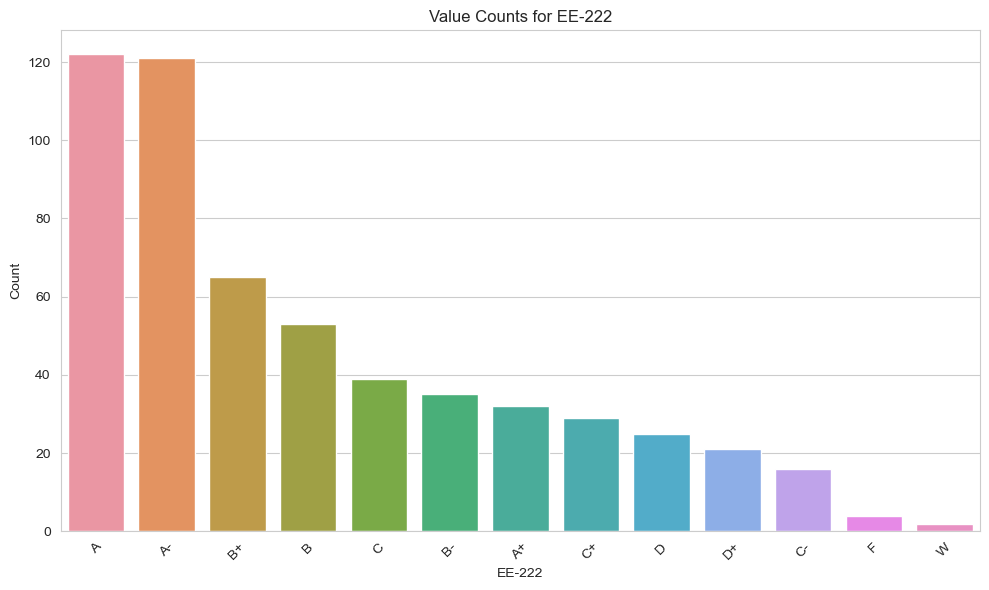

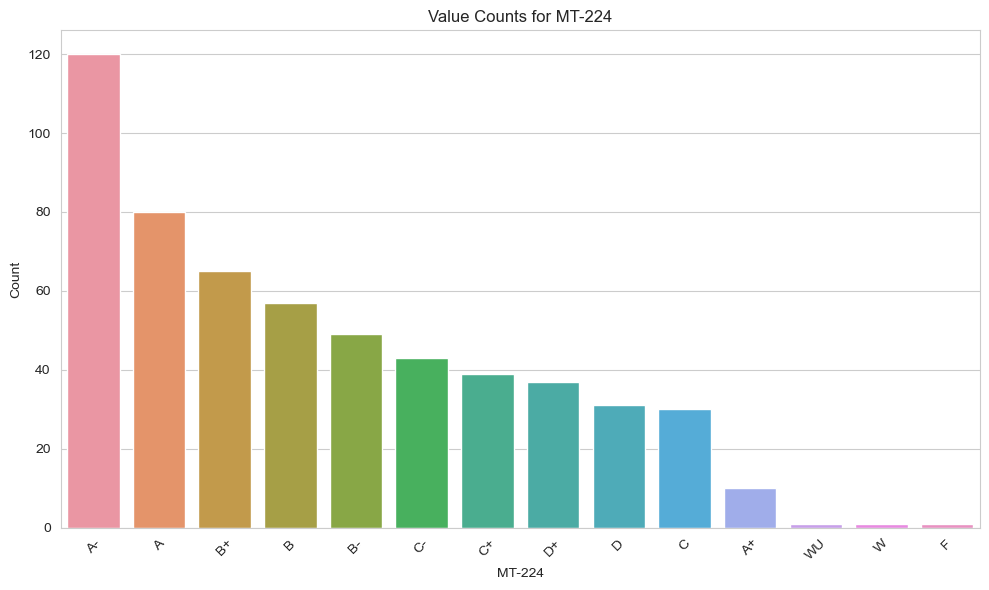

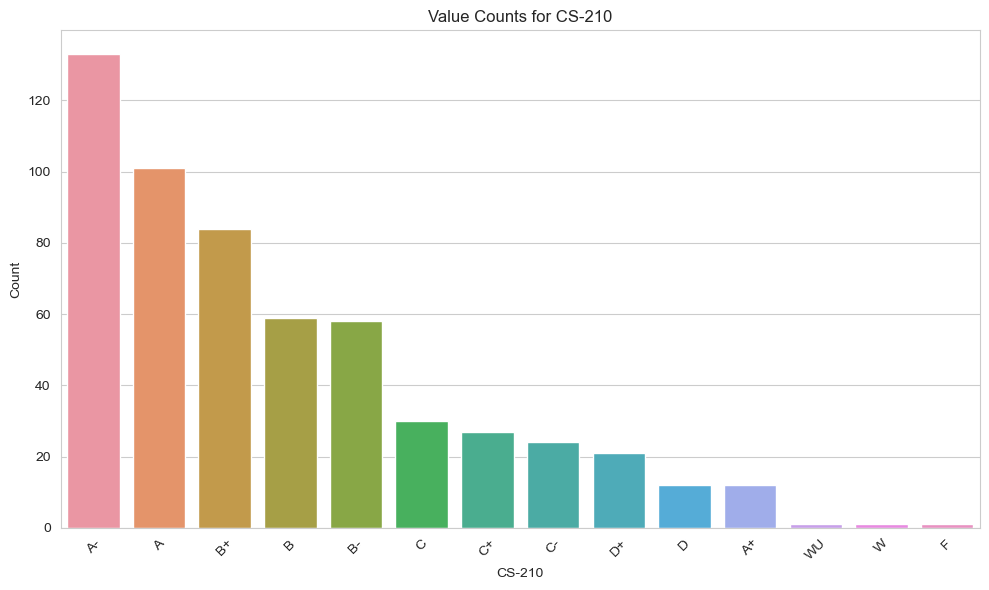

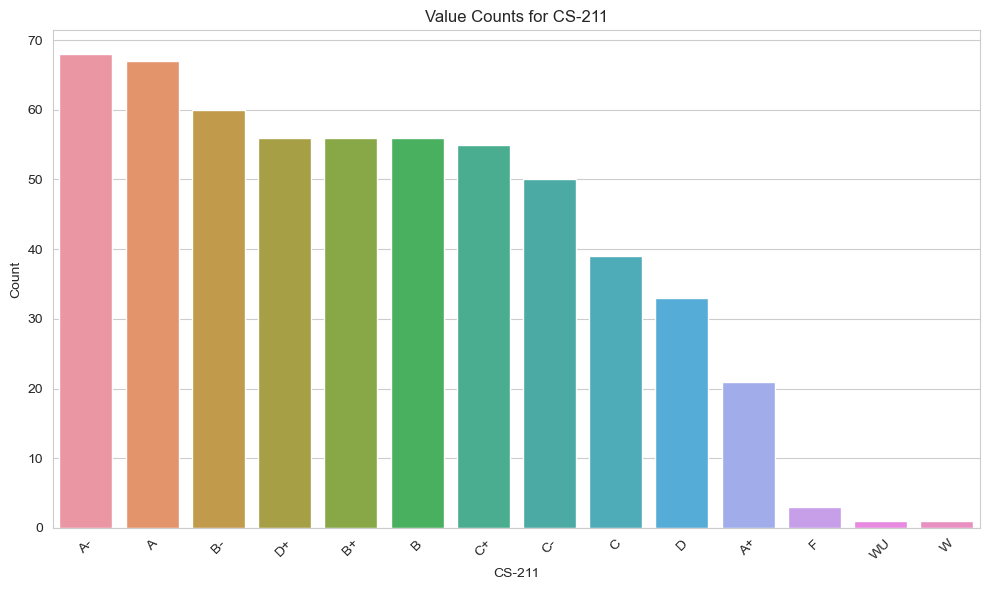

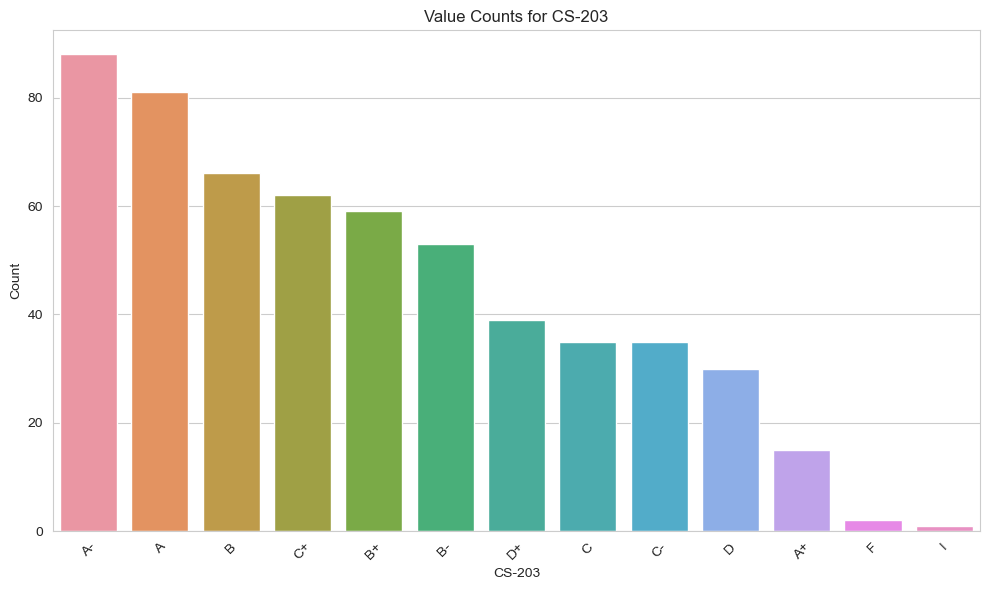

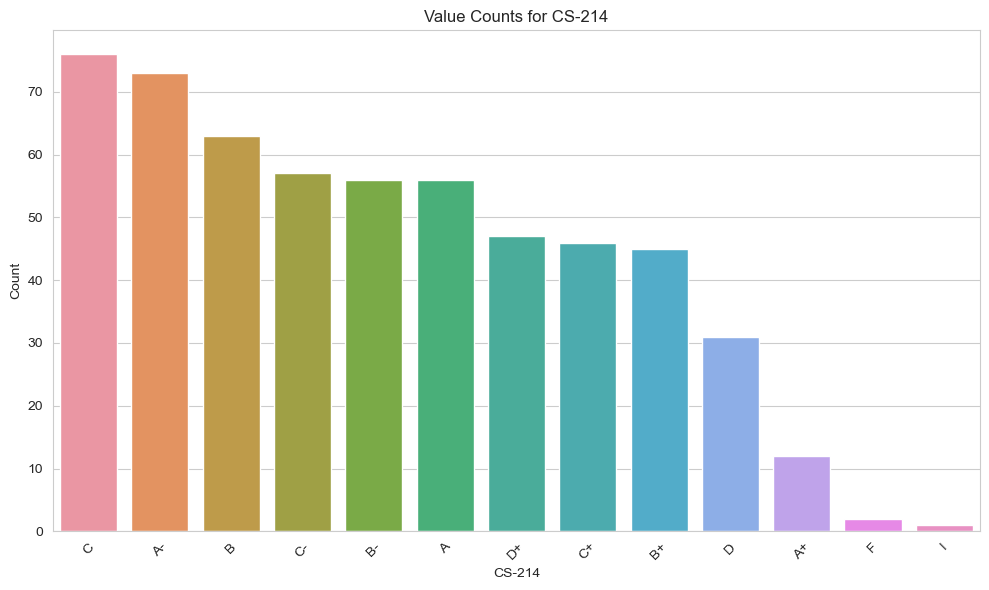

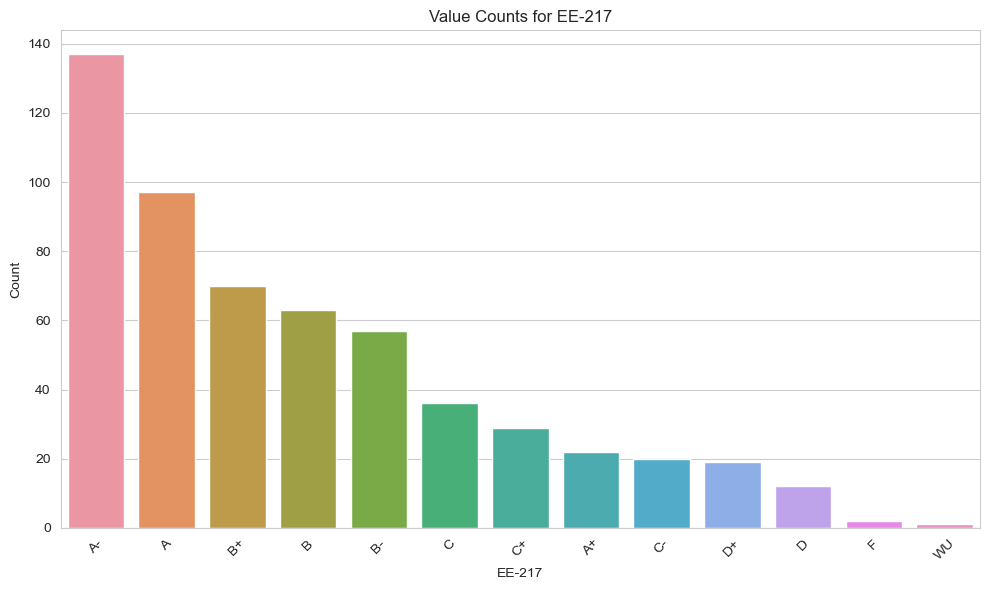

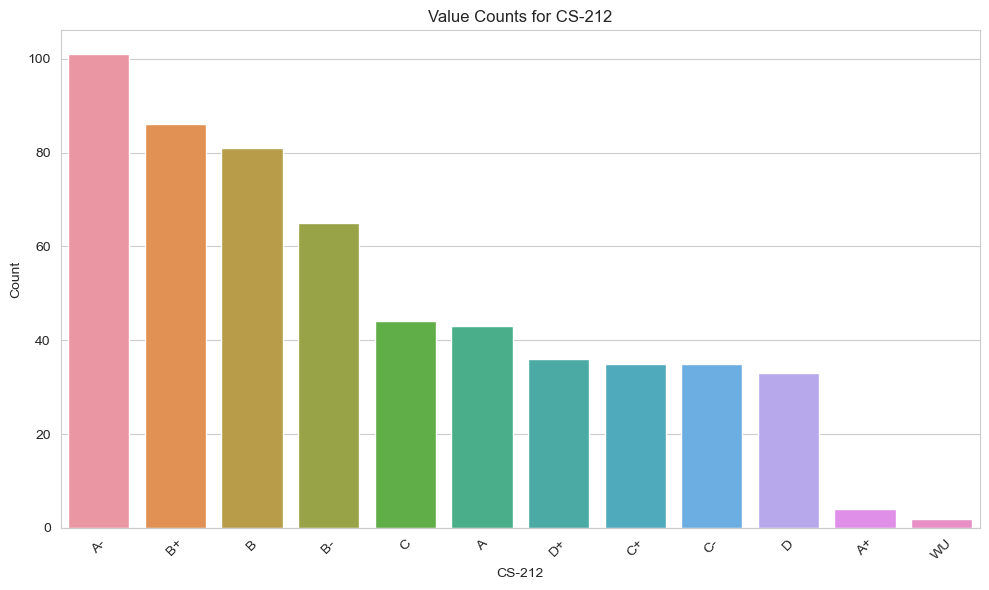

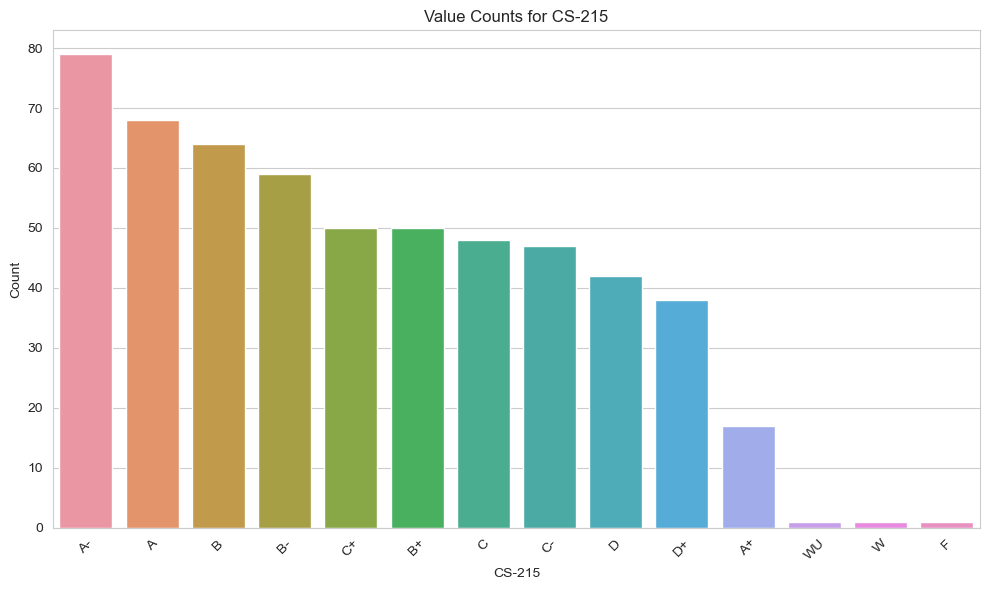

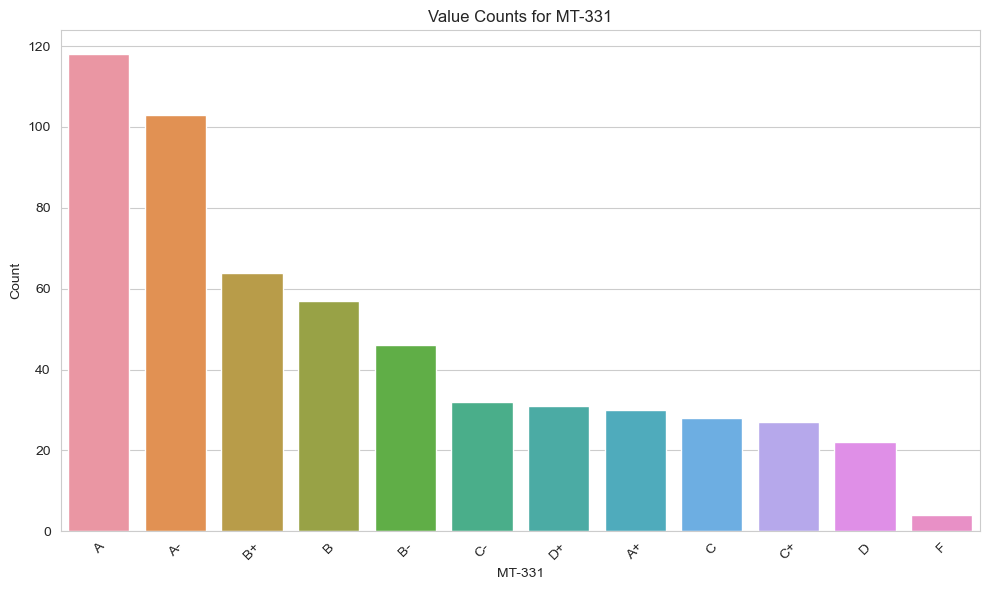

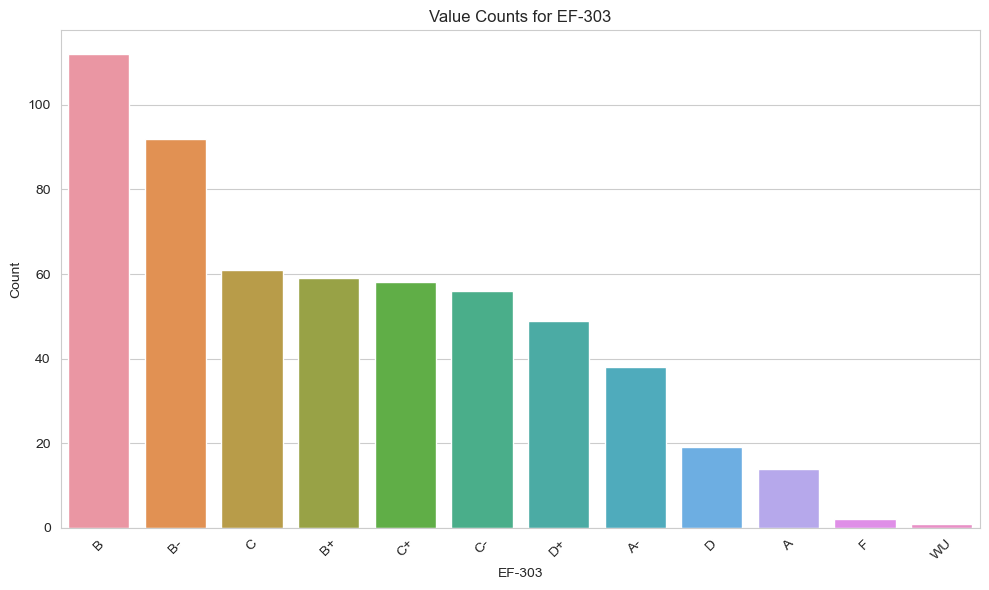

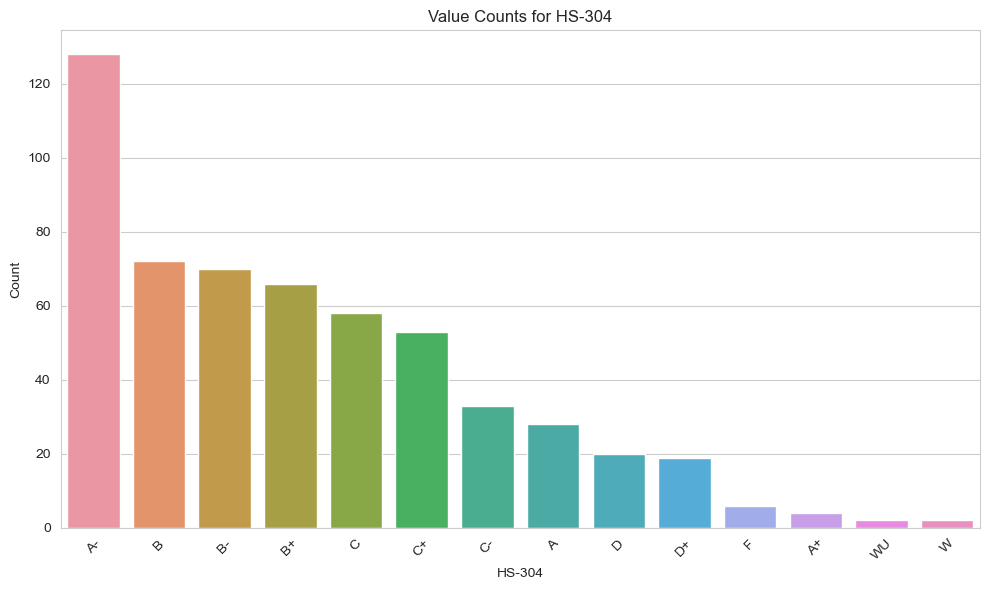

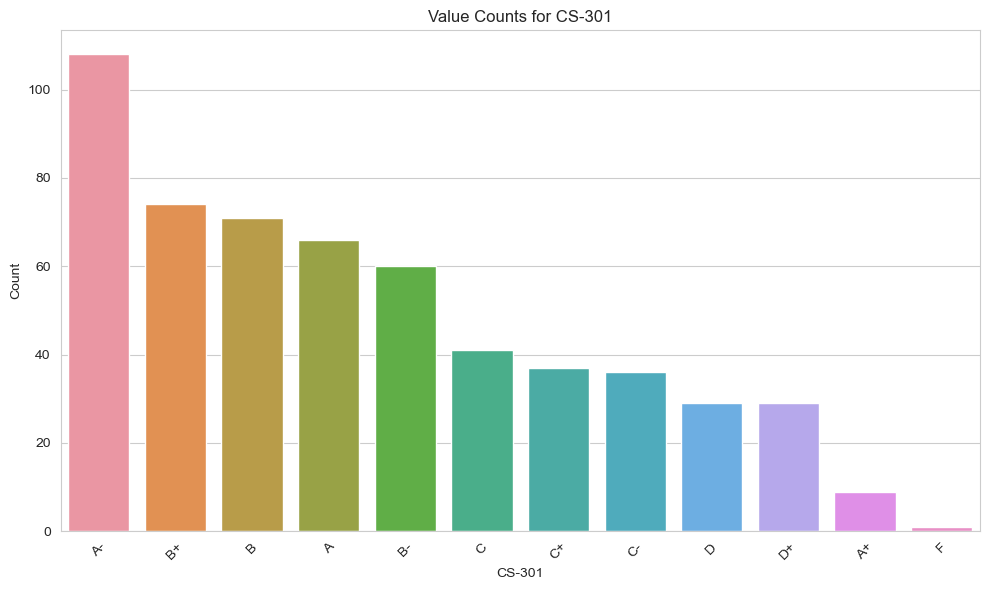

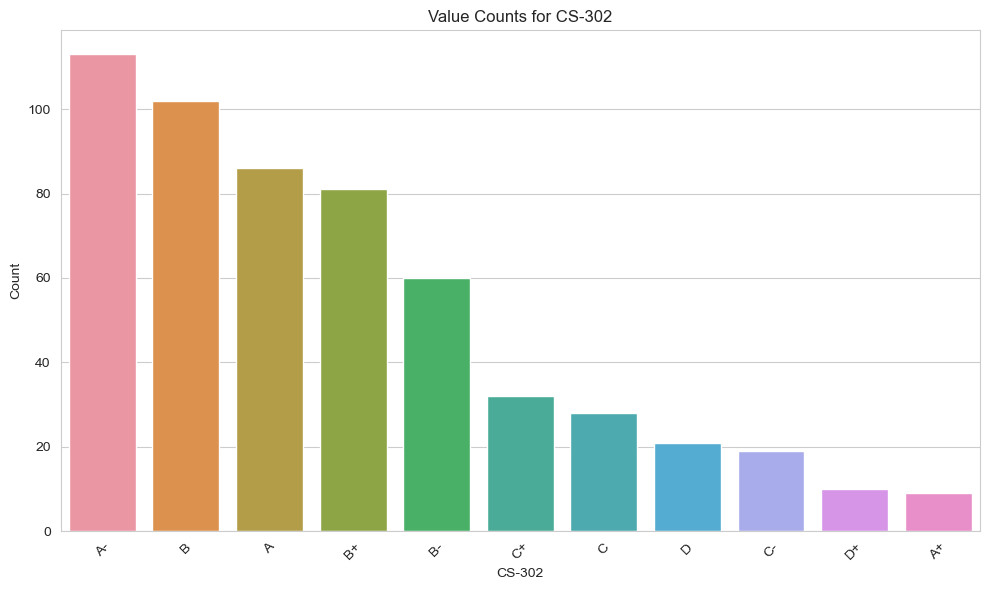

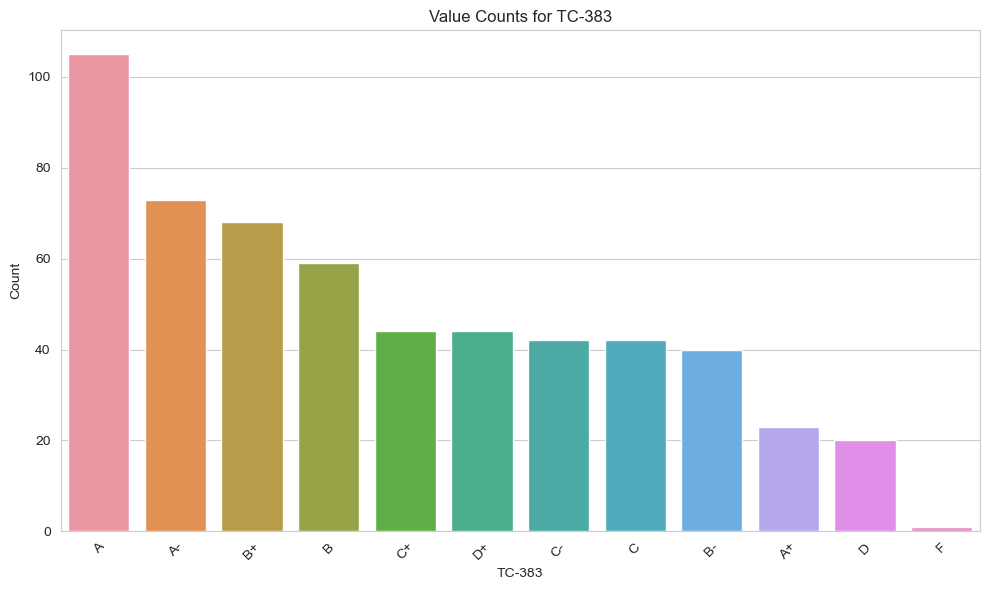

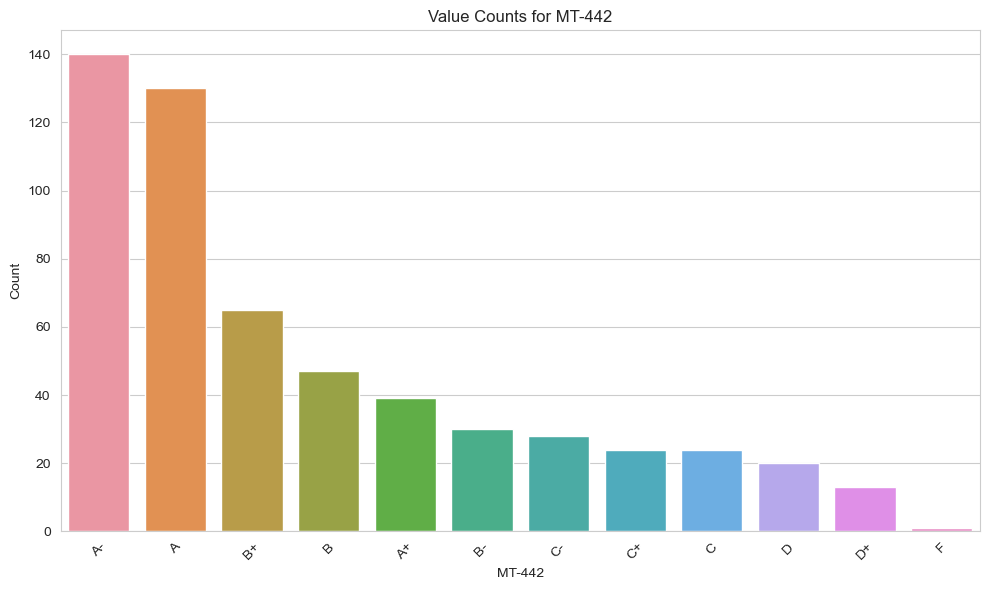

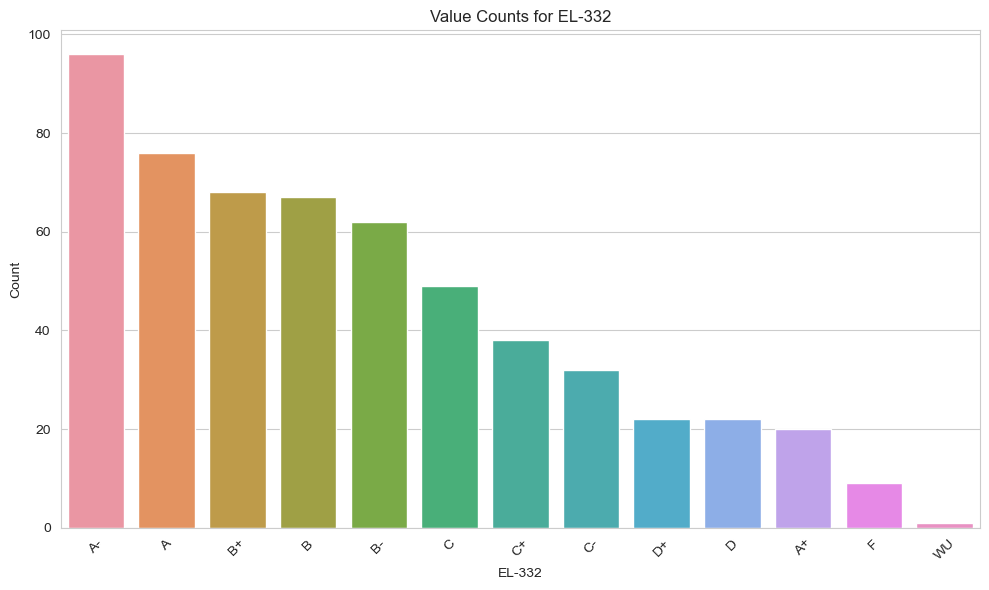

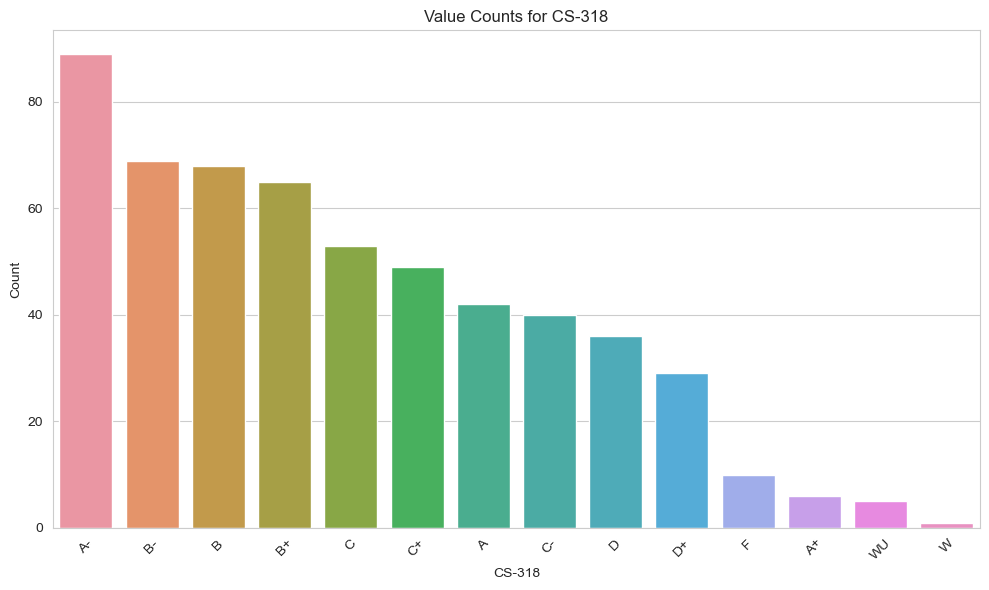

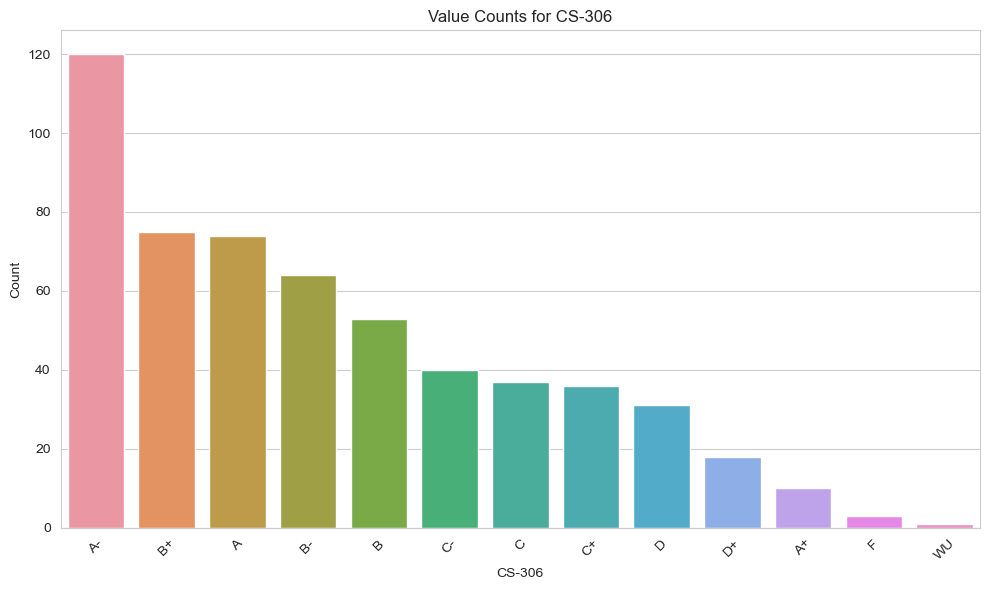

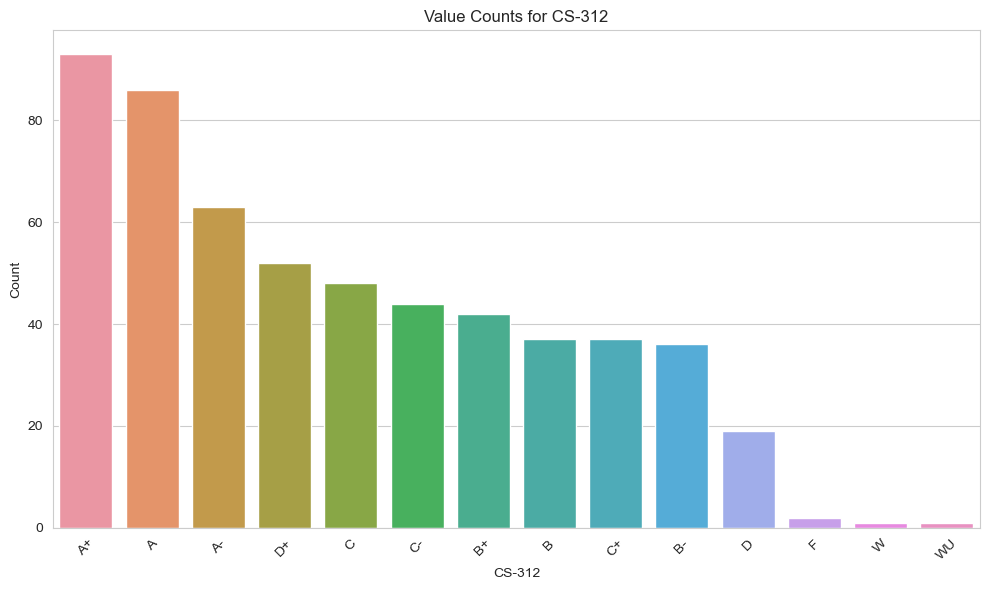

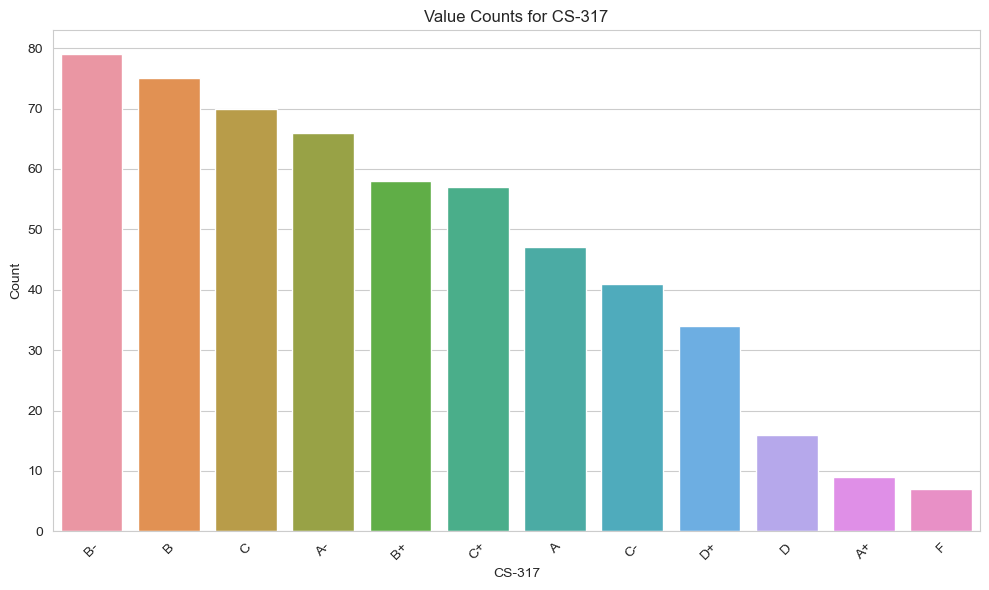

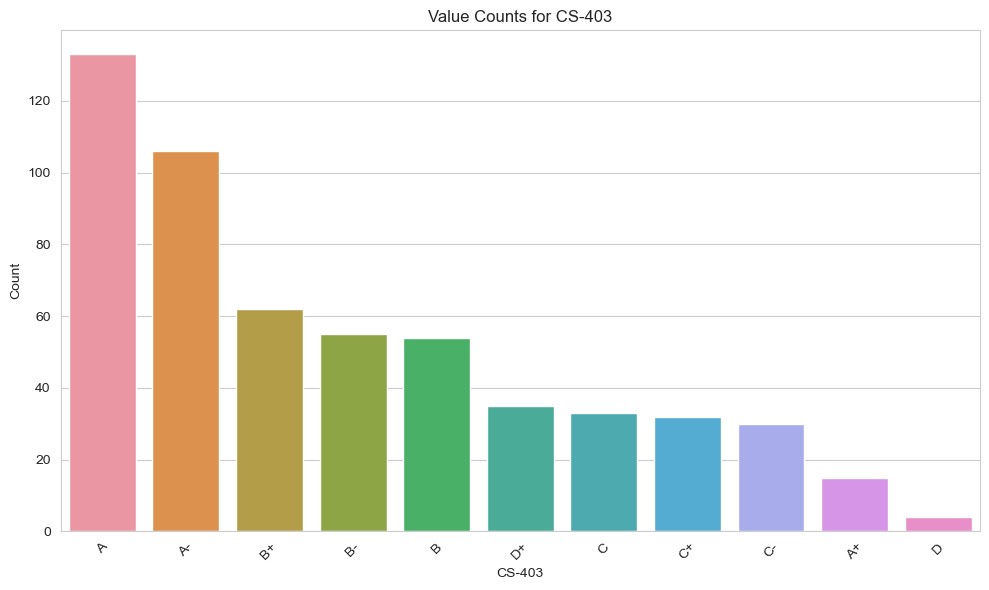

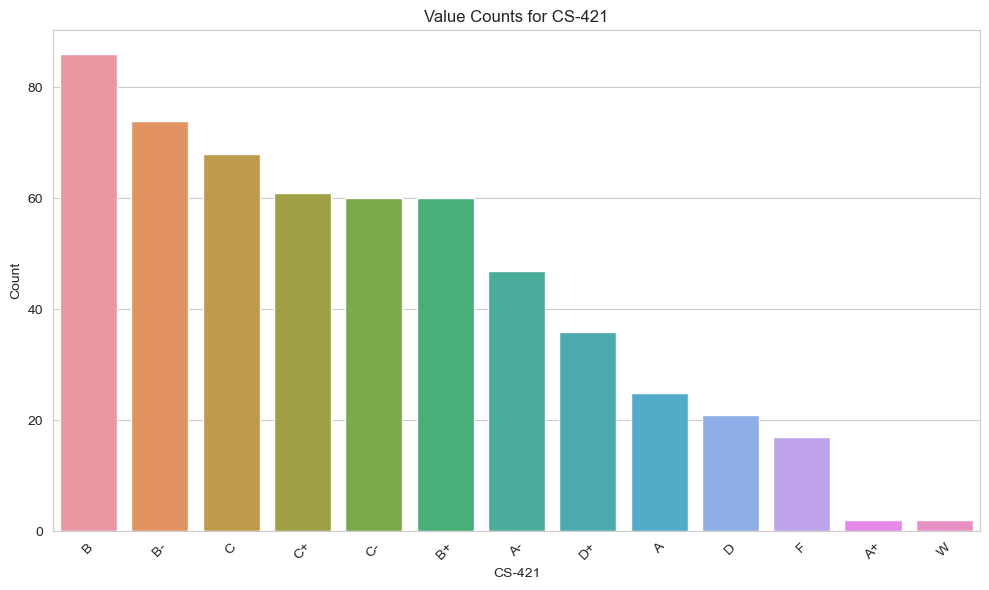

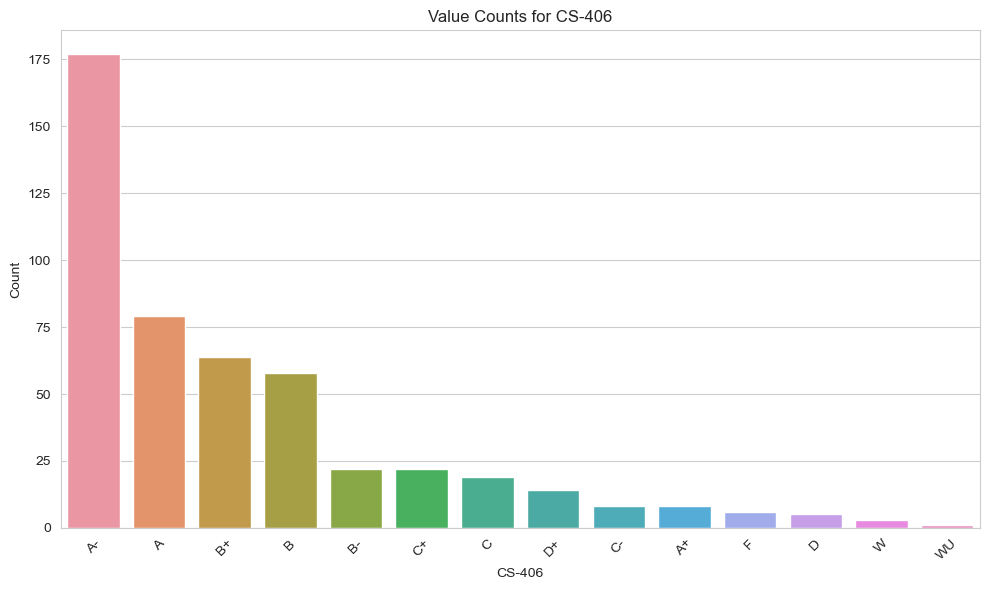

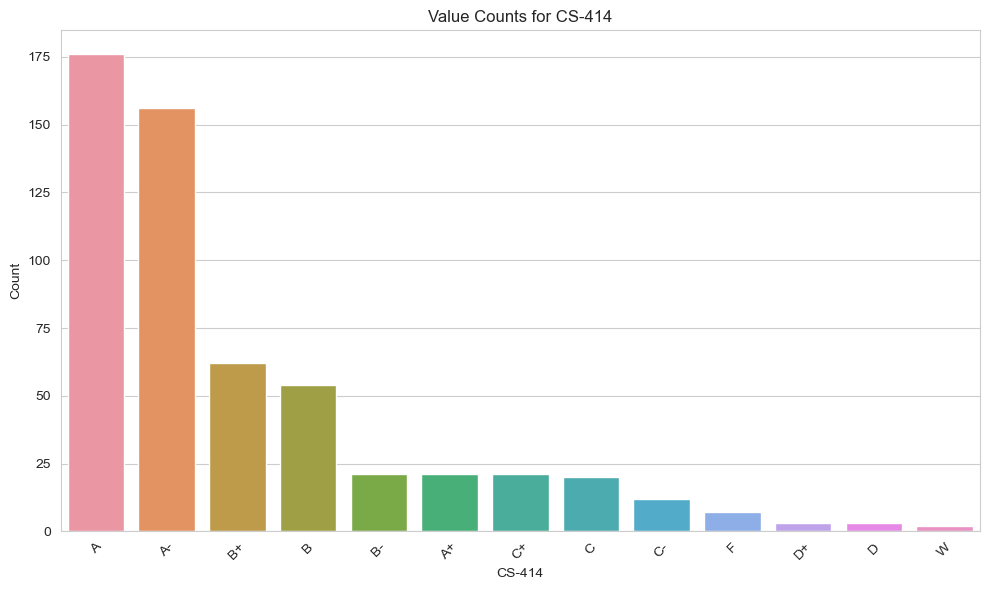

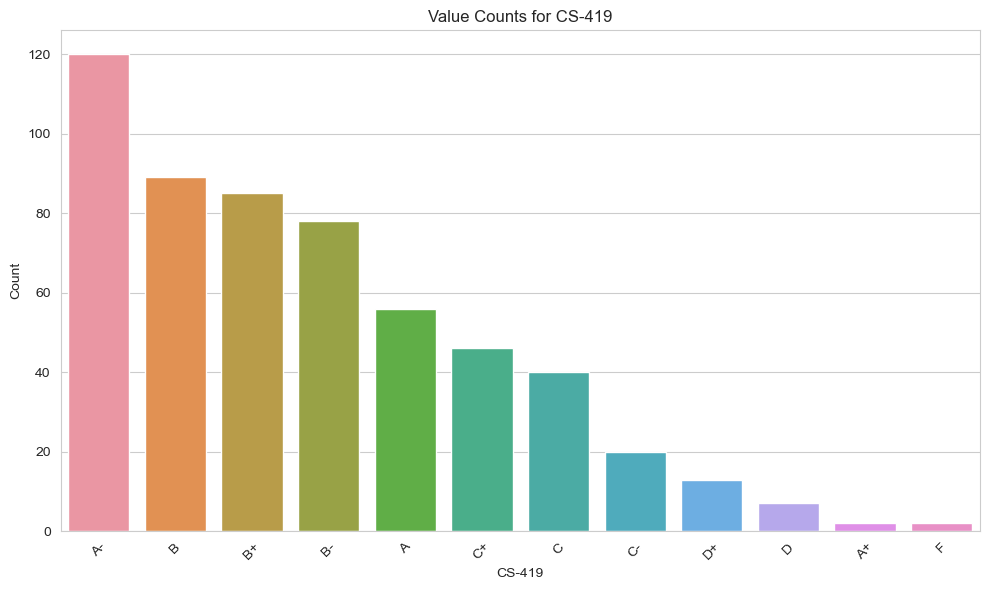

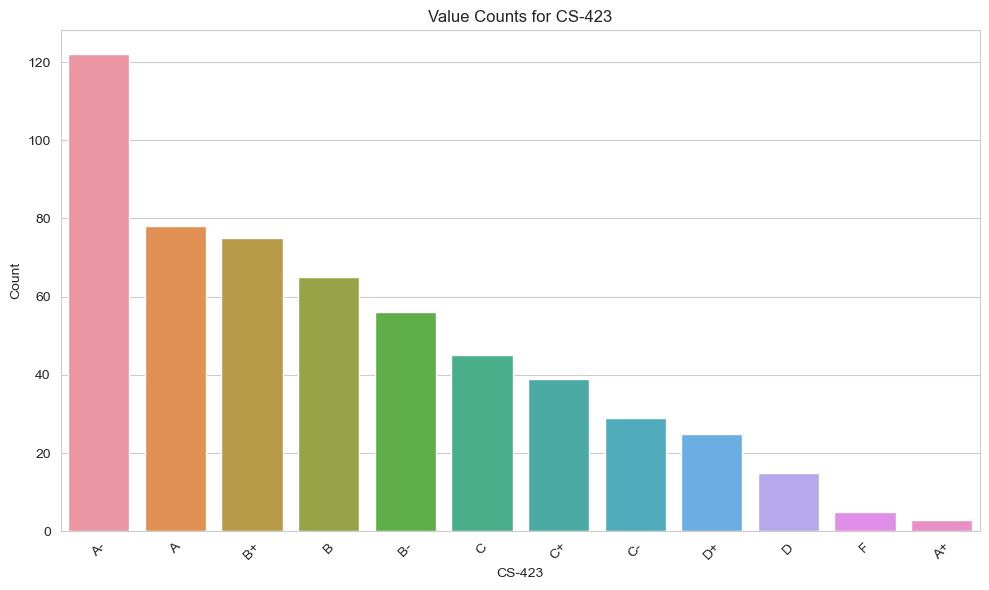

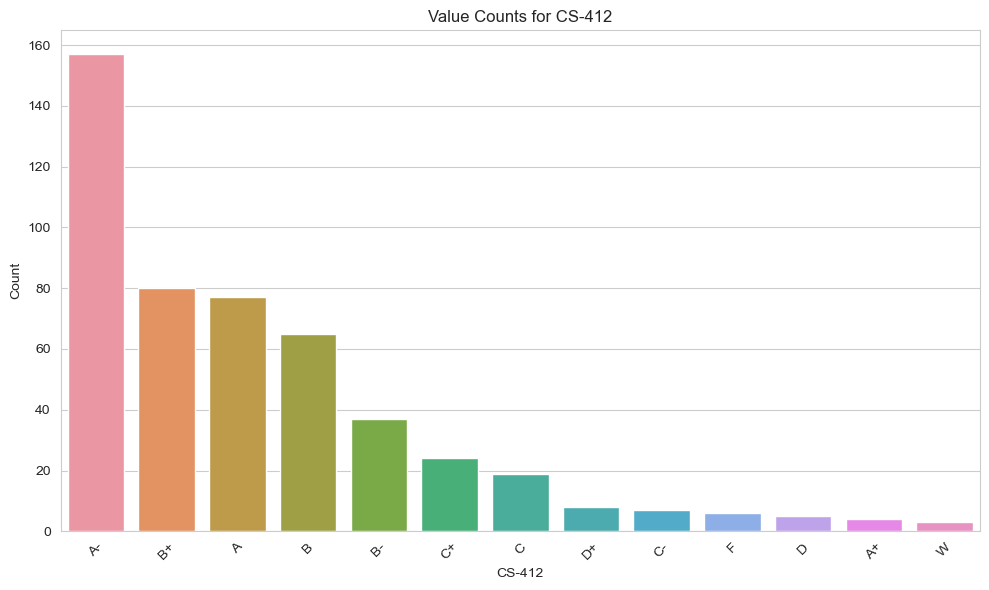

In [36]:
import pandas as pd

columns = [
    'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 'EL-102',
    'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210',
    'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303',
    'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306',
    'CS-312', 'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 
    'CS-412'
]

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Value Counts for {column}')
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout()

#### Encoding Categorical Features 

#### 1. Trying with Label Encoding first

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106', 
    'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 
    'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 
    'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 
    'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403', 
    'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412'
]

label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [20]:
df

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001       5      10       8          6       8      10       9   
1    CS-97002       0       9      10          9       5       6       9   
2    CS-97003       0       3       0          5       4       0       5   
3    CS-97004       9       7      10          9       9       2      10   
4    CS-97005       2       2       2          4       0       0       2   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567       3       0       0          2       1       0       2   
567  CS-97568       1       0       0          0       0       0       0   
568  CS-97569       3       0       2          4       0       0       0   
569  CS-97570       0       4       9          0       9      10       5   
570  CS-97571       6       9       9          6       6      10       3   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0         8       5  ...       8       8       8       8       2       0   
1         0      10  ...      10       9       6       9       2       5   
2         4       2  ...       3       3       0       6       0       0   
3         8       9  ...      10       6      10       8       5       3   
4         4       0  ...       5       4       4       5       2       0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566       2       1  ...       2       2       0       0       0       4   
567       2       0  ...       4       4       0       0       2       3   
568       0       0  ...       2       3       0       4       0       6   
569       8       5  ...       9       3       3       8       9       6   
570       7       6  ...       7       6       5       9      11       8   

     CS-419  CS-423  CS-412   CGPA  
0         8       3       2  2.205  
1         6       6       3  2.008  
2         0       2       0  3.608  
3         7       7       7  1.906  
4         2       2       0  3.448  
..      ...     ...     ...    ...  
566       4       3       0  3.798  
567       2       6       2  3.772  
568       4       2       2  3.470  
569       3       5       6  2.193  
570       4       9       8  1.753  

[571 rows x 43 columns]

Doesnt look right with respect to grades and marks 

##### 2. Using Ordinal Encoder 

Using International Grades to Marks conversion and considering a specific marks for specific grade for all students

In [40]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

grade_to_marks = {
    'A+': 95,
    'A': 90,
    'A-': 85,
    'B+': 80,
    'B': 75,
    'B-': 70,
    'C+': 65,
    'C': 60,
    'C-': 55,
    'D+': 50,
    'D': 45,
    'F': 0,
    'WU': -1,  # Assuming WU stands for Withdrawal Unauthorized and assigning a unique value
    'I': -2,   # Assuming I stands for Incomplete and assigning a unique value
    'W': -3    # Assuming W stands for Withdrawal and assigning a unique value
}


columns_to_encode = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
                     'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
                     'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
                     'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
                     'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
                     'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df_encoded = df.copy()
for column in columns_to_encode:
    df_encoded[column] = df_encoded[column].map(grade_to_marks)

print(df_encoded.head())


   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1  CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2  CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3  CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4  CS-97005      85      85    85.0       80.0    90.0      90    85.0   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1    90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2    80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3    55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4    80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   

   CS-419  CS-423  CS-412   CGPA  
0    55.0    75.0    85.0  2.205  
1    60.0    60.0    75.0  2.008  
2    

In [22]:
df_encoded

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1    CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2    CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3    CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4    CS-97005      85      85    85.0       80.0    90.0      90    85.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567      75      90    90.0       85.0    95.0      90    85.0   
567  CS-97568      95      90    90.0       90.0    90.0      90    90.0   
568  CS-97569      75      90    85.0       80.0    90.0      90    90.0   
569  CS-97570      90      80    45.0       90.0    45.0      50    70.0   
570  CS-97571      60      45    45.0       60.0    60.0      50    75.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0      55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1      90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2      80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3      55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4      80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566    85.0    95.0  ...    85.0    85.0    90.0    90.0    90.0    80.0   
567    85.0    90.0  ...    80.0    80.0    90.0    90.0    85.0    75.0   
568    90.0    90.0  ...    85.0    75.0    90.0    80.0    90.0    60.0   
569    55.0    70.0  ...    45.0    75.0    75.0    55.0    45.0    60.0   
570    65.0    60.0  ...    65.0    60.0    70.0    45.0     0.0    55.0   

     CS-419  CS-423  CS-412   CGPA  
0      55.0    75.0    85.0  2.205  
1      60.0    60.0    75.0  2.008  
2      90.0    85.0    90.0  3.608  
3      65.0    65.0    65.0  1.906  
4      85.0    85.0    90.0  3.448  
..      ...     ...     ...    ...  
566    80.0    75.0    90.0  3.798  
567    85.0    60.0    85.0  3.772  
568    80.0    85.0    85.0  3.470  
569    75.0    70.0    60.0  2.193  
570    80.0    45.0    55.0  1.753  

[571 rows x 43 columns]

Data looks ok

In [41]:
df_encoded.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  570.000000  570.000000  569.000000  571.000000   
mean    74.943958   68.975482   78.784211   73.014035   74.520211   79.973730   
std     15.477783   13.871317   15.135037   16.217648   15.480680   12.504358   
min     -1.000000    0.000000   -1.000000   -1.000000   -1.000000   45.000000   
25%     65.000000   60.000000   71.250000   60.000000   65.000000   75.000000   
50%     80.000000   70.000000   85.000000   75.000000   80.000000   85.000000   
75%     85.000000   80.000000   90.000000   85.000000   85.000000   90.000000   
max     95.000000   95.000000   95.000000   95.000000   95.000000   95.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  569.000000  569.000000  569.000000  569.000000  ...  561.000000   
mean    73.985940   74.353251   75.015817   70.066784  ...   74.404635   
std     13.592529   15.710295   12.699178   16.138129  ...   17.393099   
min     -1.000000   -1.000000   -1.000000   -1.000000  ...   -3.000000   
25%     70.000000   65.000000   65.000000   55.000000  ...   60.000000   
50%     75.000000   80.000000   80.000000   70.000000  ...   80.000000   
75%     85.000000   85.000000   85.000000   85.000000  ...   90.000000   
max     95.000000   95.000000   95.000000   95.000000  ...   95.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  559.000000  559.000000  559.000000  486.000000  558.000000  558.000000   
mean    69.892665   76.753131   66.098390   77.880658   80.786738   74.946237   
std     14.816292   13.105030   17.184096   15.564636   14.338034   11.738349   
min      0.000000   45.000000   -3.000000   -3.000000   -3.000000    0.000000   
25%     60.000000   70.000000   60.000000   75.000000   75.000000   70.000000   
50%     70.000000   80.000000   70.000000   85.000000   85.000000   75.000000   
75%     80.000000   90.000000   75.000000   85.000000   90.000000   85.000000   
max     95.000000   95.000000   95.000000   95.000000   95.000000   95.000000   

           CS-423      CS-412        CGPA  
count  557.000000  492.000000  571.000000  
mean    74.012567   77.684959    2.954888  
std     14.478768   14.622206    0.620552  
min      0.000000   -3.000000    0.800000  
25%     65.000000   75.000000    2.538000  
50%     75.000000   80.000000    3.029000  
75%     85.000000   85.000000    3.451000  
max     95.000000   95.000000    3.985000  

[8 rows x 42 columns]

Above information is not of use; as we have converted categorical data into numerical one and it has -1, 0,1 values that are misanalyzed in above table

In [23]:
df=df_encoded.copy()

In [24]:
df

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1    CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2    CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3    CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4    CS-97005      85      85    85.0       80.0    90.0      90    85.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567      75      90    90.0       85.0    95.0      90    85.0   
567  CS-97568      95      90    90.0       90.0    90.0      90    90.0   
568  CS-97569      75      90    85.0       80.0    90.0      90    90.0   
569  CS-97570      90      80    45.0       90.0    45.0      50    70.0   
570  CS-97571      60      45    45.0       60.0    60.0      50    75.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0      55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1      90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2      80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3      55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4      80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566    85.0    95.0  ...    85.0    85.0    90.0    90.0    90.0    80.0   
567    85.0    90.0  ...    80.0    80.0    90.0    90.0    85.0    75.0   
568    90.0    90.0  ...    85.0    75.0    90.0    80.0    90.0    60.0   
569    55.0    70.0  ...    45.0    75.0    75.0    55.0    45.0    60.0   
570    65.0    60.0  ...    65.0    60.0    70.0    45.0     0.0    55.0   

     CS-419  CS-423  CS-412   CGPA  
0      55.0    75.0    85.0  2.205  
1      60.0    60.0    75.0  2.008  
2      90.0    85.0    90.0  3.608  
3      65.0    65.0    65.0  1.906  
4      85.0    85.0    90.0  3.448  
..      ...     ...     ...    ...  
566    80.0    75.0    90.0  3.798  
567    85.0    60.0    85.0  3.772  
568    80.0    85.0    85.0  3.470  
569    75.0    70.0    60.0  2.193  
570    80.0    45.0    55.0  1.753  

[571 rows x 43 columns]

In [25]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

1. 1st Approach: Imputing missing values using CGPA closets to that row's CGPA

2. 2nd Approach: Building a ML Model to predict missing values using CGPA

## Imputing using function 

In [26]:
def impute_missing_values(df, target_column):
    df_copy = df.copy()
    
    missing_rows = df_copy[target_column].isnull()
    
    cgpa_values = df_copy[['CGPA']].values
    distances = euclidean_distances(cgpa_values, cgpa_values)
    
    for index in df_copy[missing_rows].index:

        similar_rows = np.argsort(distances[index])
        
        similar_rows = similar_rows[similar_rows != index]
        
        similar_values = df_copy.loc[similar_rows, target_column].dropna()
        
        if not similar_values.empty:
            df_copy.loc[index, target_column] = similar_values.mean()
        else:
            df_copy.loc[index, target_column] = df_copy[target_column].mean()
    
    return df_copy

for column in columns_to_encode:
    df_encoded = impute_missing_values(df_encoded, column)

print(df_encoded.head())

   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1  CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2  CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3  CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4  CS-97005      85      85    85.0       80.0    90.0      90    85.0   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1    90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2    80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3    55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4    80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   

   CS-419  CS-423  CS-412   CGPA  
0    55.0    75.0    85.0  2.205  
1    60.0    60.0    75.0  2.008  
2    

In [27]:
df_encoded.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Imputed values using Ecludiean Distances

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

df = pd.read_csv('Grades.csv')

grade_to_marks = {
    'A+': 95, 'A': 90, 'A-': 85, 'B+': 80, 'B': 75, 'B-': 70,
    'C+': 65, 'C': 60, 'C-': 55, 'D+': 50, 'D': 45, 'F': 0,
    'WU': -1, 'I': -2, 'W': -3
}

columns_to_encode = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
                     'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
                     'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
                     'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
                     'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
                     'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df_encoded = df.copy()
for column in columns_to_encode:
    df_encoded[column] = df_encoded[column].map(grade_to_marks)

def impute_missing_values(df, target_column):
    df_copy = df.copy()
    
    missing_rows = df_copy[target_column].isnull()
    
    cgpa_values = df_copy[['CGPA']].values
    distances = euclidean_distances(cgpa_values, cgpa_values)
    
    for index in df_copy[missing_rows].index:
        
        similar_rows = np.argsort(distances[index])
        
        similar_rows = similar_rows[similar_rows != index]
        
        similar_values = df_copy.loc[similar_rows, target_column].dropna()
        
        if not similar_values.empty:
            df_copy.loc[index, target_column] = similar_values.mean()
        else:
            df_copy.loc[index, target_column] = df_copy[target_column].mean()
    
    return df_copy

for column in columns_to_encode:
    df_encoded = impute_missing_values(df_encoded, column)

df_encoded.to_csv('encoded_imputed_similar_cgpa.csv', index=False)

print(df_encoded.head())


   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1  CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2  CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3  CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4  CS-97005      85      85    85.0       80.0    90.0      90    85.0   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1    90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2    80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3    55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4    80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   

   CS-419  CS-423  CS-412   CGPA  
0    55.0    75.0    85.0  2.205  
1    60.0    60.0    75.0  2.008  
2    

## ML Model predicted values

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

df = pd.read_csv('Grades.csv')

grade_to_marks = {
    'A+': 95, 'A': 90, 'A-': 85, 'B+': 80, 'B': 75, 'B-': 70,
    'C+': 65, 'C': 60, 'C-': 55, 'D+': 50, 'D': 45, 'F': 0,
    'WU': -1, 'I': -2, 'W': -3
}

columns_to_encode = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
                     'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
                     'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
                     'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
                     'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
                     'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df_encoded = df.copy()
for column in columns_to_encode:
    df_encoded[column] = df_encoded[column].map(grade_to_marks)

df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

def impute_with_regression(df, target_column):
    df_copy = df.copy()
    
    train_data = df_copy[df_copy[target_column].notnull()]
    test_data = df_copy[df_copy[target_column].isnull()]
    
    if test_data.empty:
        return df_copy

    features = [col for col in df_copy.columns if col != target_column]
    
    if len(features) == 0:
        raise ValueError("No features available for training the model.")
    
    X_train = train_data[features]
    y_train = train_data[target_column]
    
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    
    model = LinearRegression()
    model.fit(X_train_imputed, y_train)
    
    X_test = test_data[features]
    X_test_imputed = imputer.transform(X_test)
    predicted_values = model.predict(X_test_imputed)
    
    df_copy.loc[test_data.index, target_column] = predicted_values
    
    return df_copy

for column in columns_to_encode:
    try:
        df_encoded = impute_with_regression(df_encoded, column)
    except ValueError as e:
        print(f"Skipping column {column} due to error: {e}")

df_encoded.to_csv('encoded_imputed_ml_model.csv', index=False)

print(df_encoded.head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-pa

   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0       NaN      70      50    55.0       60.0    55.0      50    45.0   
1       NaN      90      45    50.0       45.0    70.0      60    45.0   
2       NaN      90      75    90.0       70.0    80.0      90    70.0   
3       NaN      45      65    50.0       45.0    45.0      85    50.0   
4       NaN      85      85    85.0       80.0    90.0      90    85.0   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1    90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2    80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3    55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4    80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   

   CS-419  CS-423  CS-412   CGPA  
0    55.0    75.0    85.0  2.205  
1    60.0    60.0    75.0  2.008  
2    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Seat No.']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-pa

In [32]:
df_encoded.isnull().sum()

Seat No.     571
PH-121         0
HS-101         0
CY-105         0
HS-105/12      0
MT-111         0
CS-105         0
CS-106         0
EL-102         0
EE-119         0
ME-107         0
CS-107         0
HS-205/20      0
MT-222         0
EE-222         0
MT-224         0
CS-210         0
CS-211         0
CS-203         0
CS-214         0
EE-217         0
CS-212         0
CS-215         0
MT-331         0
EF-303         0
HS-304         0
CS-301         0
CS-302         0
TC-383         0
MT-442         0
EL-332         0
CS-318         0
CS-306         0
CS-312         0
CS-317         0
CS-403         0
CS-421         0
CS-406         0
CS-414         0
CS-419         0
CS-423         0
CS-412         0
CGPA           0
dtype: int64

### 1. Using Imputed Values df 

In [42]:
df=pd.read_csv('encoded_imputed_similar_cgpa.csv')

In [43]:
df

Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0    CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1    CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2    CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3    CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4    CS-97005      85      85    85.0       80.0    90.0      90    85.0   
..        ...     ...     ...     ...        ...     ...     ...     ...   
566  CS-97567      75      90    90.0       85.0    95.0      90    85.0   
567  CS-97568      95      90    90.0       90.0    90.0      90    90.0   
568  CS-97569      75      90    85.0       80.0    90.0      90    90.0   
569  CS-97570      90      80    45.0       90.0    45.0      50    70.0   
570  CS-97571      60      45    45.0       60.0    60.0      50    75.0   

     EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0      55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1      90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2      80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3      55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4      80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566    85.0    95.0  ...    85.0    85.0    90.0    90.0    90.0    80.0   
567    85.0    90.0  ...    80.0    80.0    90.0    90.0    85.0    75.0   
568    90.0    90.0  ...    85.0    75.0    90.0    80.0    90.0    60.0   
569    55.0    70.0  ...    45.0    75.0    75.0    55.0    45.0    60.0   
570    65.0    60.0  ...    65.0    60.0    70.0    45.0     0.0    55.0   

     CS-419  CS-423  CS-412   CGPA  
0      55.0    75.0    85.0  2.205  
1      60.0    60.0    75.0  2.008  
2      90.0    85.0    90.0  3.608  
3      65.0    65.0    65.0  1.906  
4      85.0    85.0    90.0  3.448  
..      ...     ...     ...    ...  
566    80.0    75.0    90.0  3.798  
567    85.0    60.0    85.0  3.772  
568    80.0    85.0    85.0  3.470  
569    75.0    70.0    60.0  2.193  
570    80.0    45.0    55.0  1.753  

[571 rows x 43 columns]

We dont need Seat No column as it is only a identifier to specific rows

In [44]:
df.drop(['Seat No.'],axis=1,inplace=True)

df

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  \
0        70      50    55.0       60.0    55.0      50    45.0    55.0   
1        90      45    50.0       45.0    70.0      60    45.0    90.0   
2        90      75    90.0       70.0    80.0      90    70.0    80.0   
3        45      65    50.0       45.0    45.0      85    50.0    55.0   
4        85      85    85.0       80.0    90.0      90    85.0    80.0   
..      ...     ...     ...        ...     ...     ...     ...     ...   
566      75      90    90.0       85.0    95.0      90    85.0    85.0   
567      95      90    90.0       90.0    90.0      90    90.0    85.0   
568      75      90    85.0       80.0    90.0      90    90.0    90.0   
569      90      80    45.0       90.0    45.0      50    70.0    55.0   
570      60      45    45.0       60.0    60.0      50    75.0    65.0   

     EE-119  ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0      70.0    55.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1      50.0    45.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2      85.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3      45.0    65.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4      90.0    85.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   
..      ...     ...  ...     ...     ...     ...     ...     ...     ...   
566    95.0    80.0  ...    85.0    85.0    90.0    90.0    90.0    80.0   
567    90.0    90.0  ...    80.0    80.0    90.0    90.0    85.0    75.0   
568    90.0    75.0  ...    85.0    75.0    90.0    80.0    90.0    60.0   
569    70.0    55.0  ...    45.0    75.0    75.0    55.0    45.0    60.0   
570    60.0    50.0  ...    65.0    60.0    70.0    45.0     0.0    55.0   

     CS-419  CS-423  CS-412   CGPA  
0      55.0    75.0    85.0  2.205  
1      60.0    60.0    75.0  2.008  
2      90.0    85.0    90.0  3.608  
3      65.0    65.0    65.0  1.906  
4      85.0    85.0    90.0  3.448  
..      ...     ...     ...    ...  
566    80.0    75.0    90.0  3.798  
567    85.0    60.0    85.0  3.772  
568    80.0    85.0    85.0  3.470  
569    75.0    70.0    60.0  2.193  
570    80.0    45.0    55.0  1.753  

[571 rows x 42 columns]

In [45]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

No nulls present, as we have filled nulls in previous steps

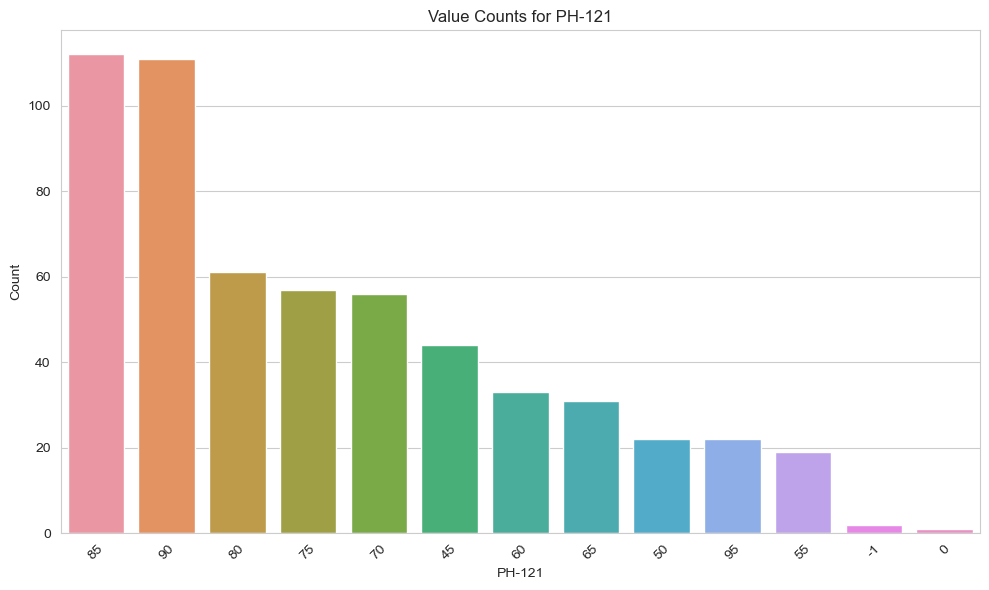

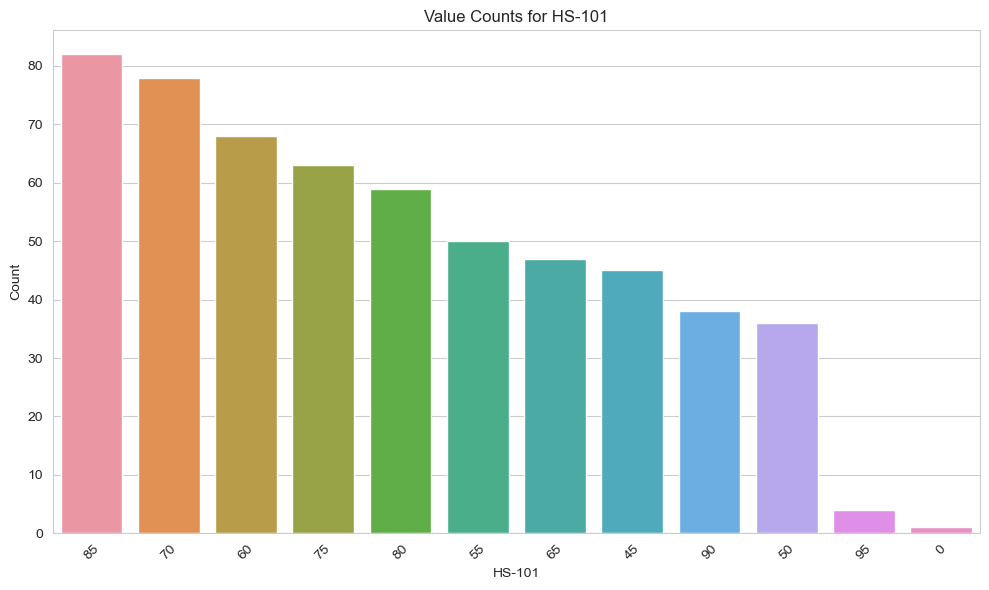

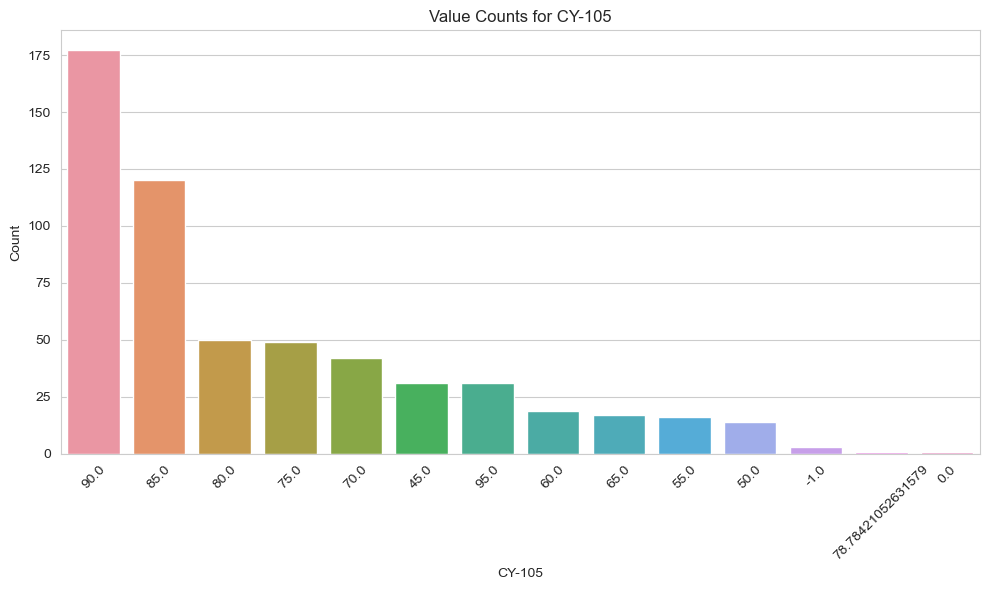

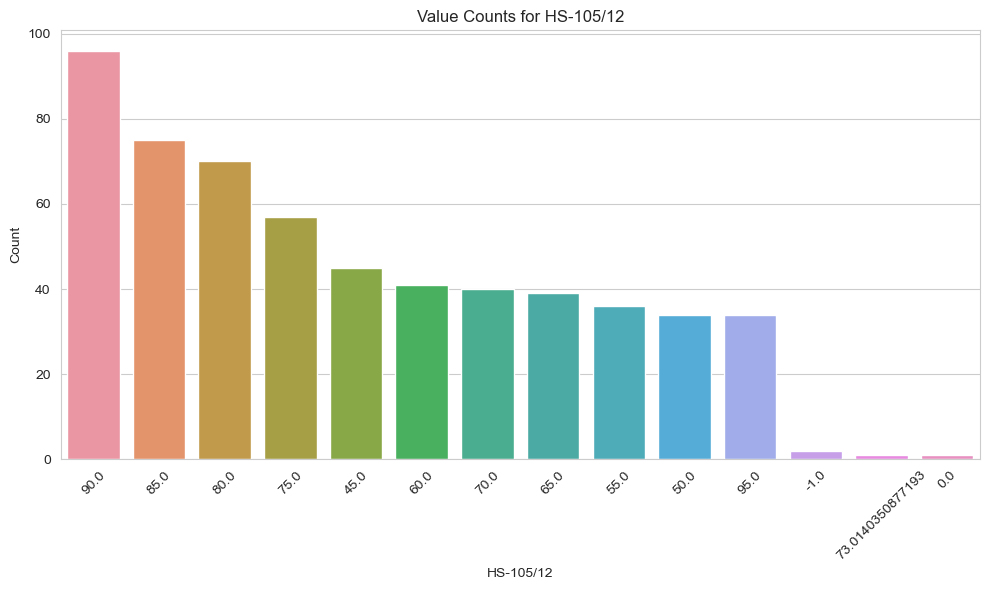

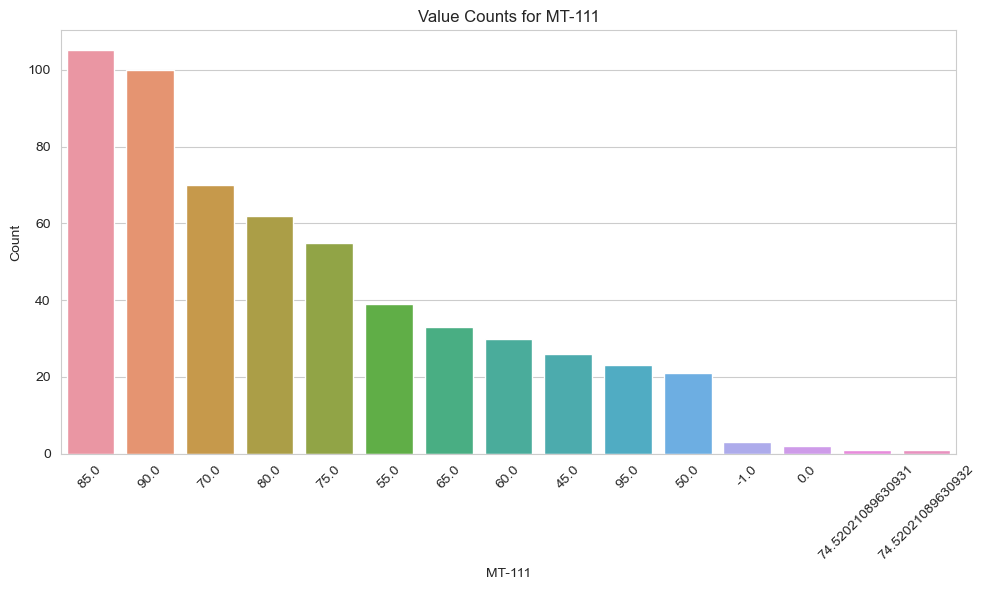

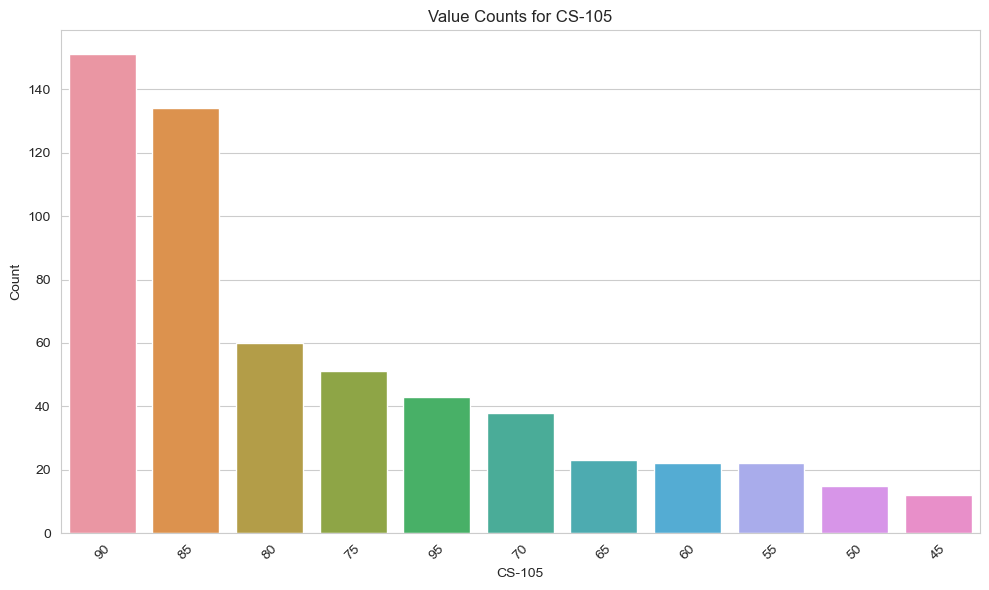

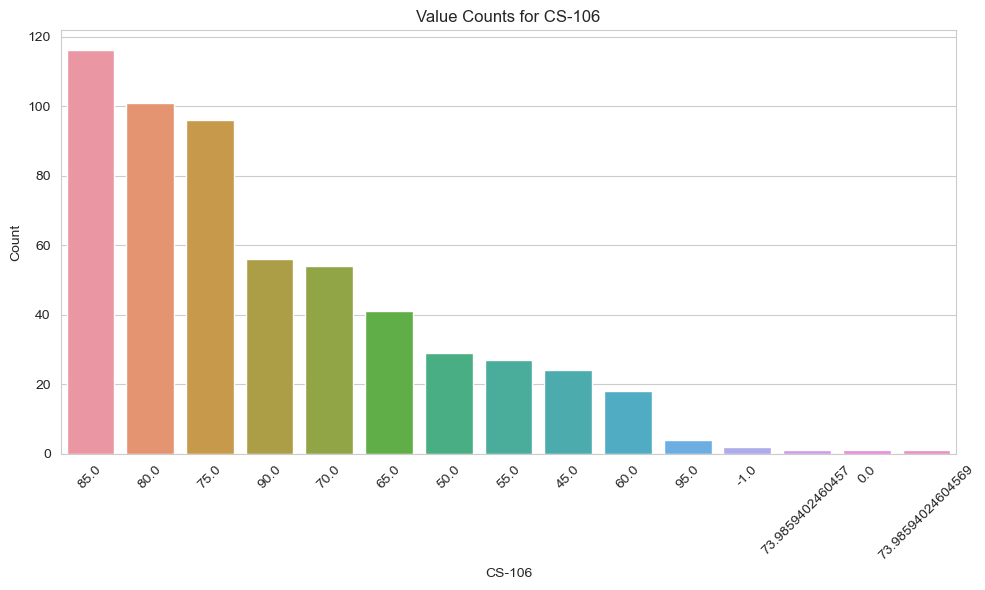

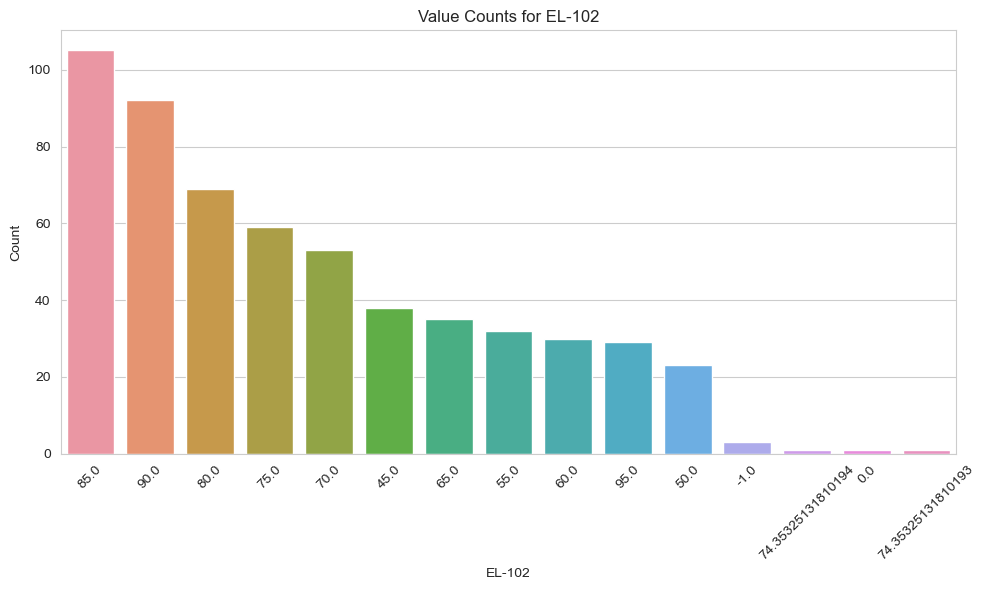

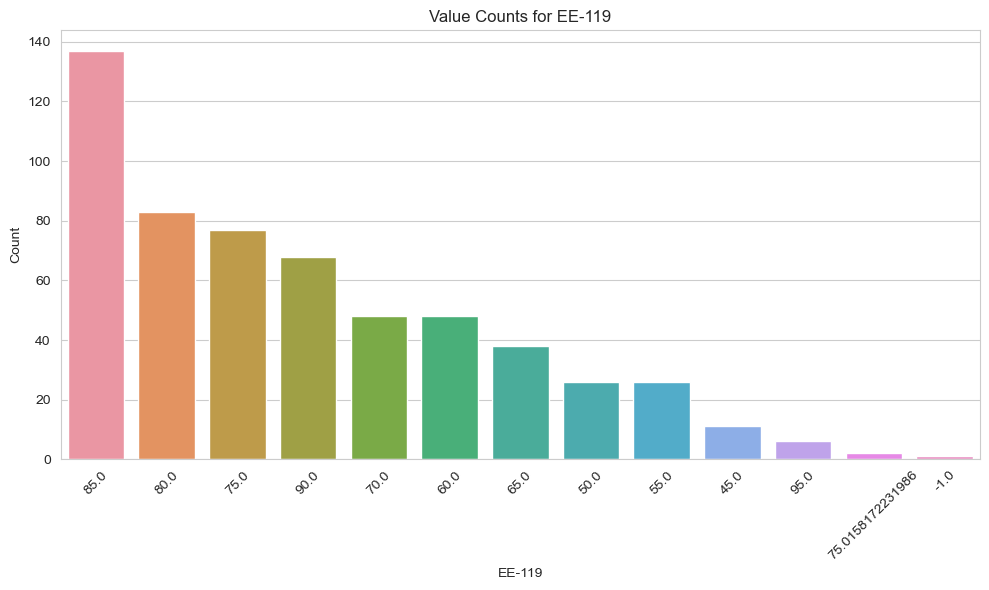

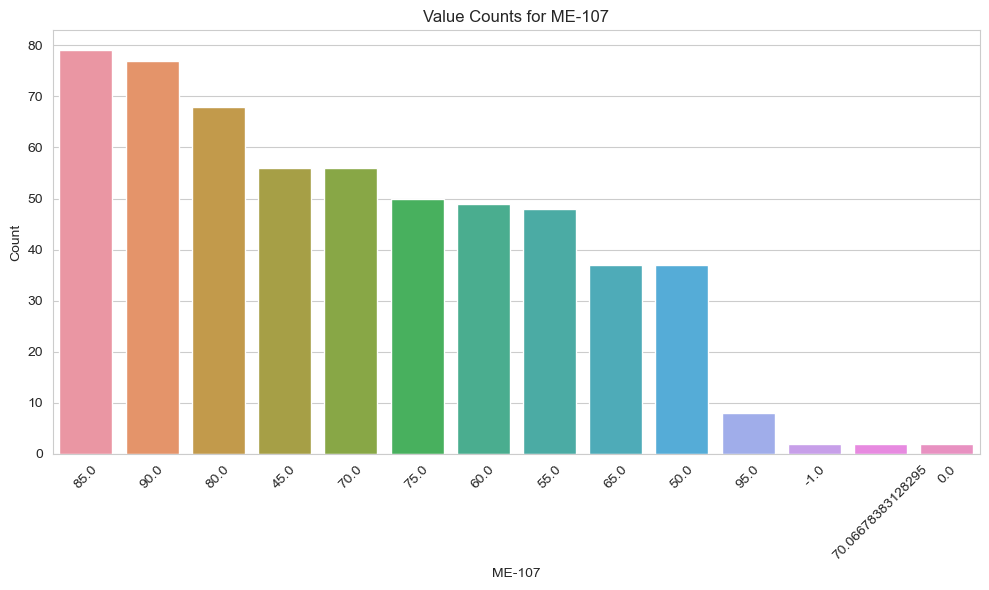

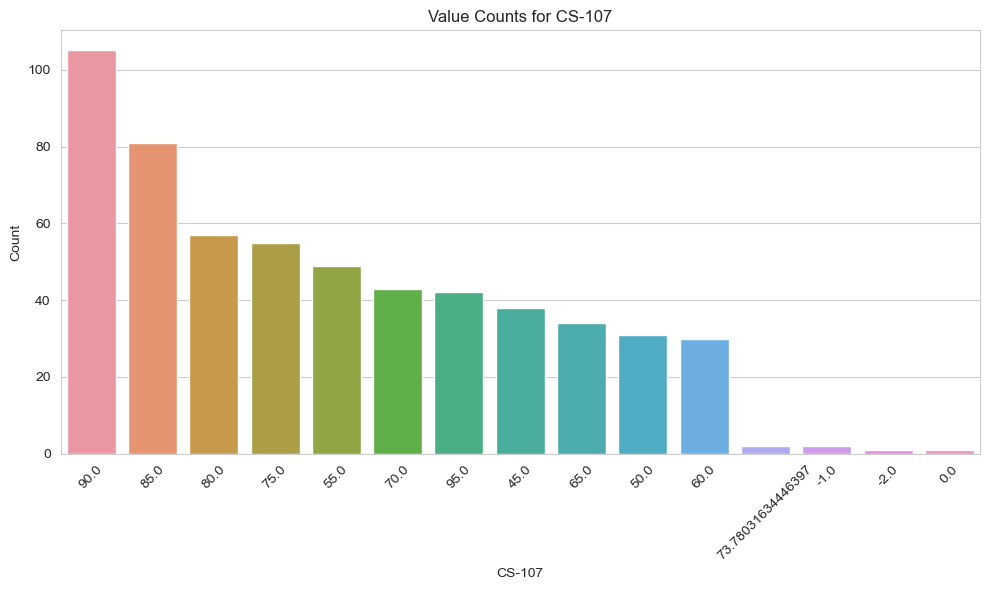

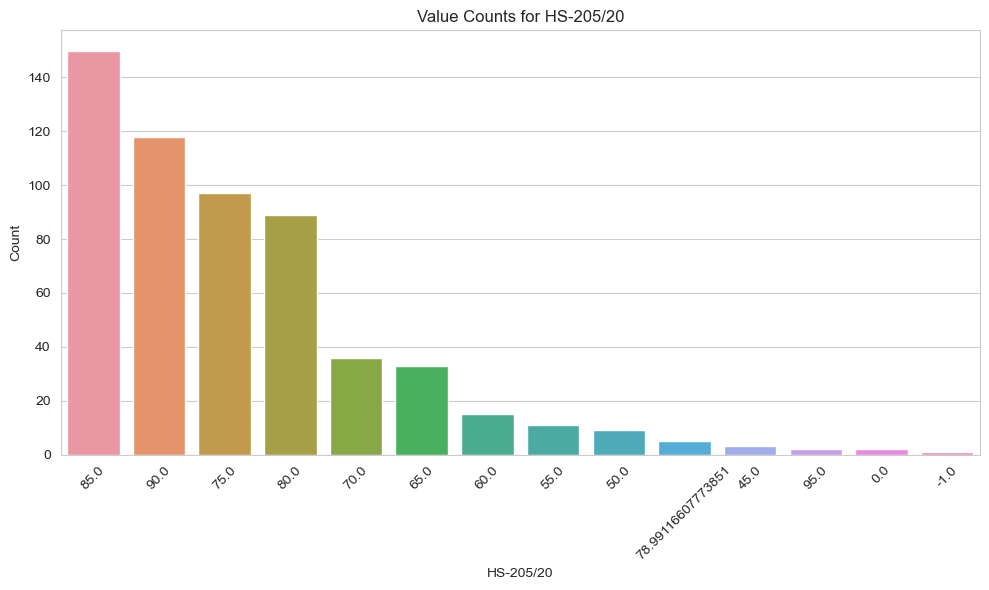

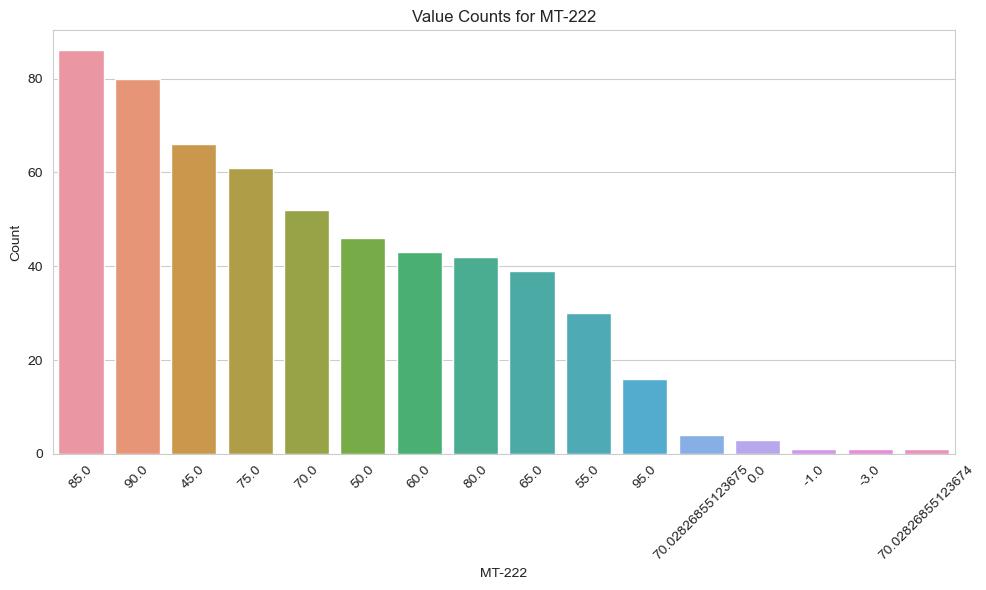

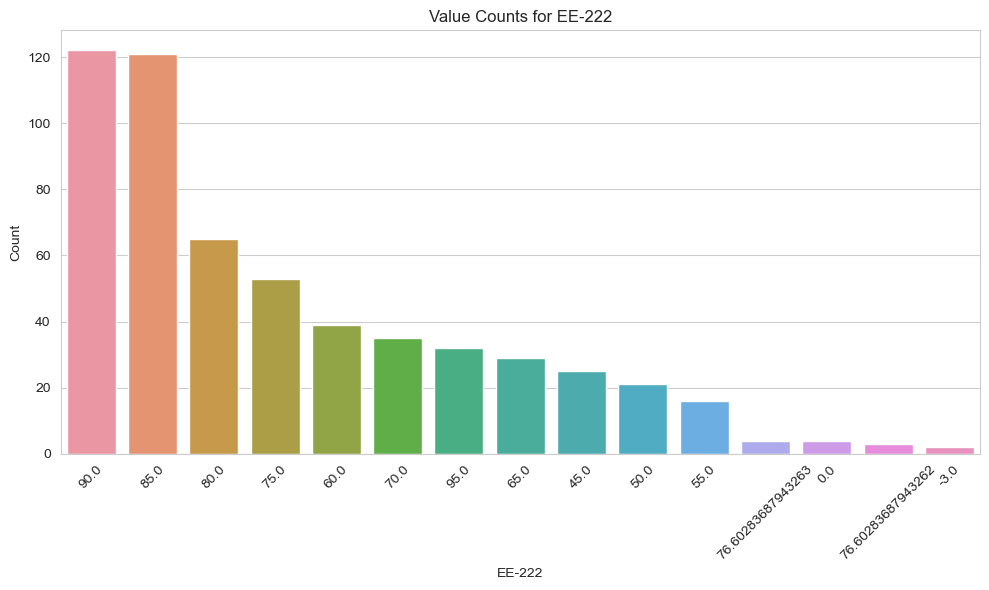

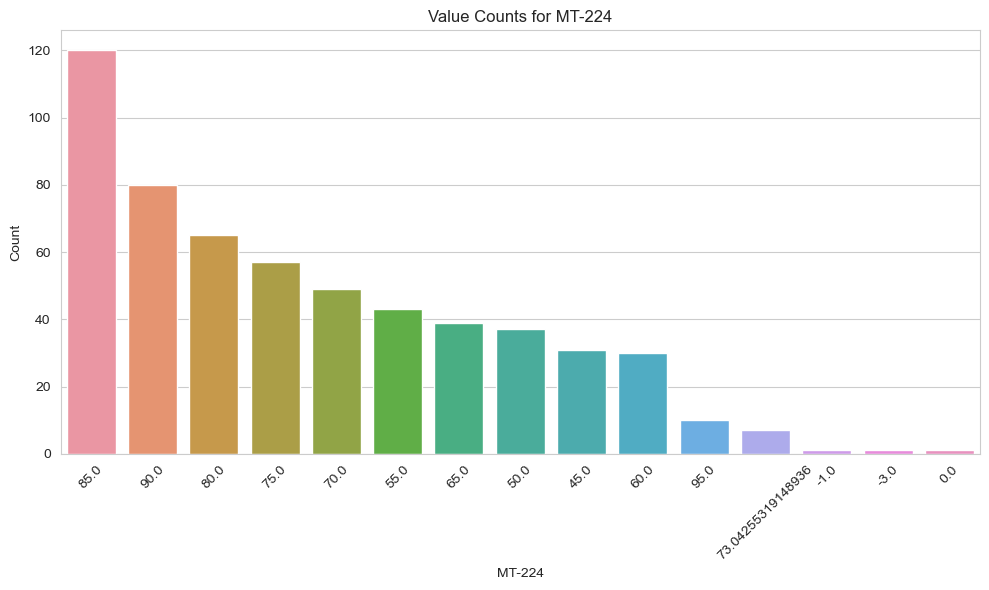

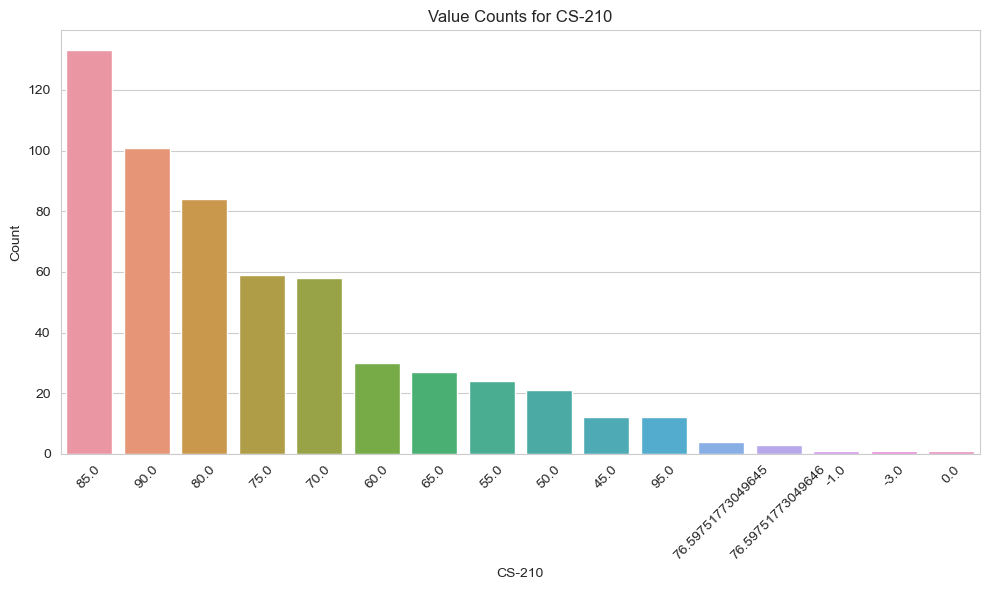

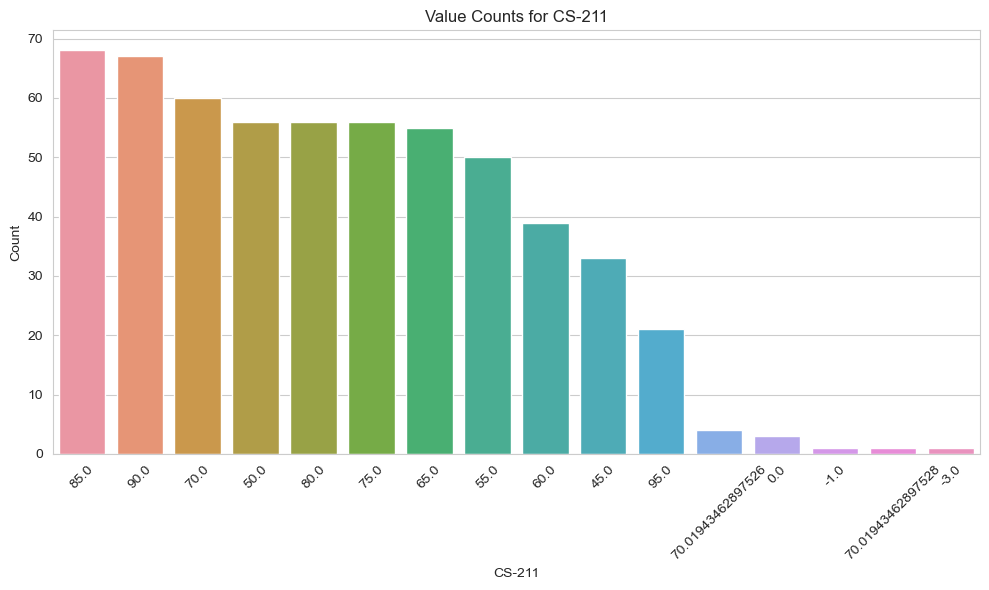

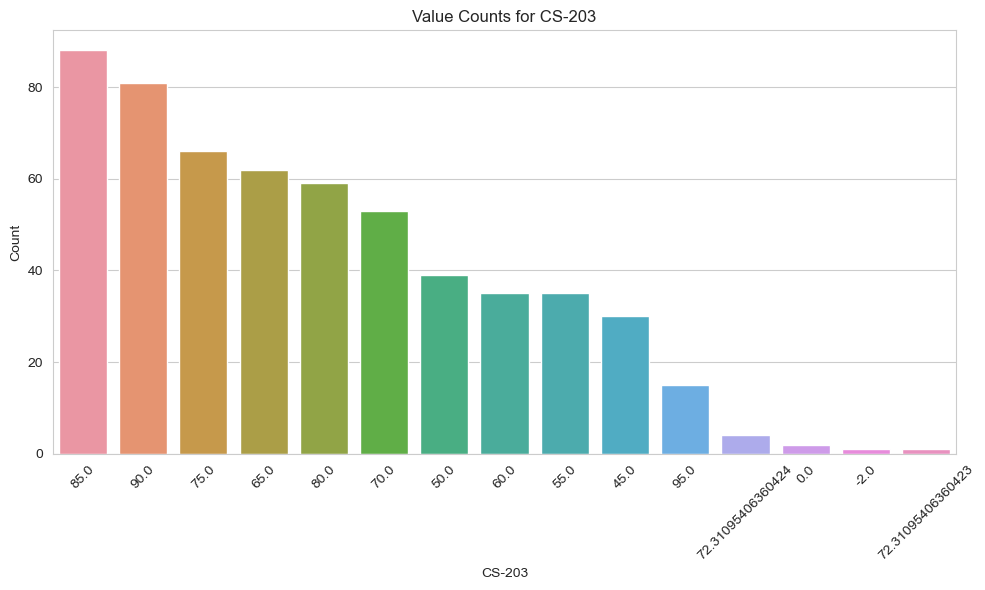

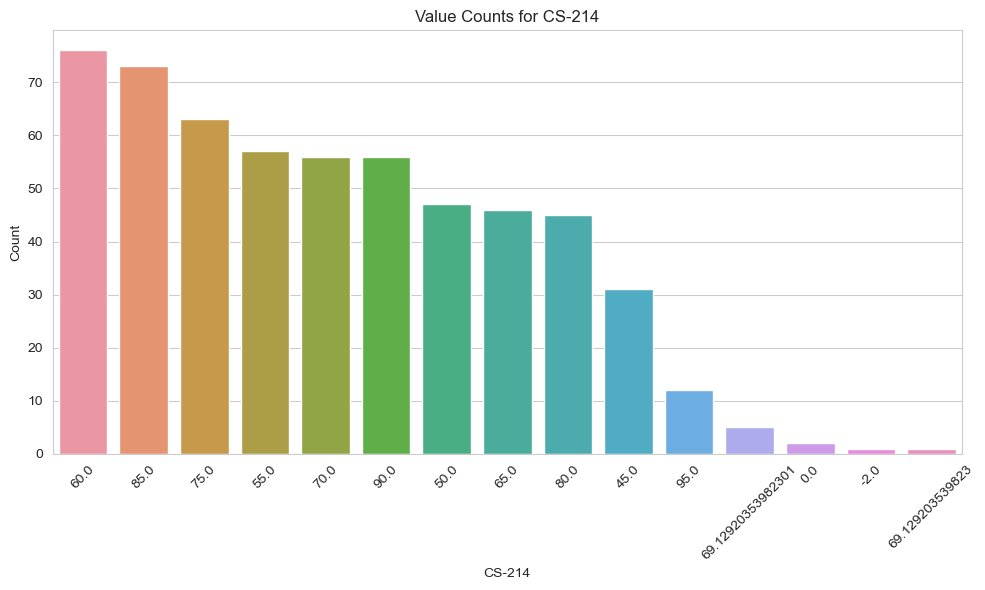

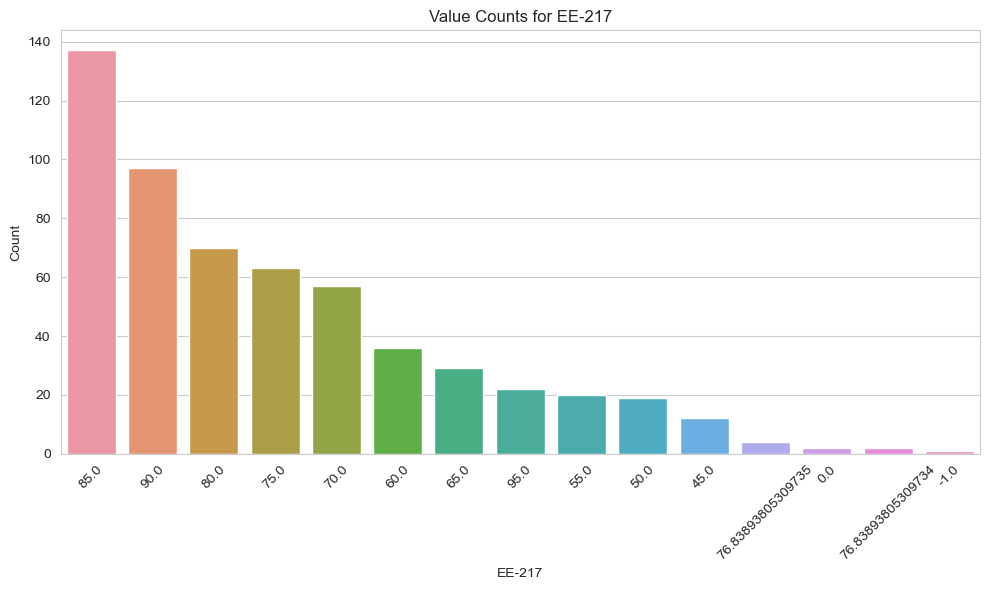

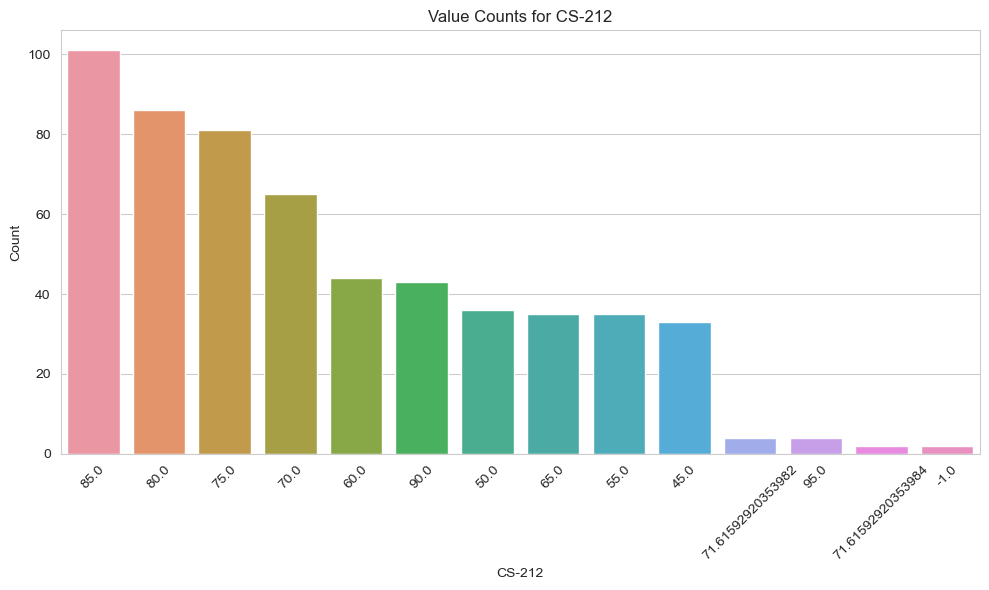

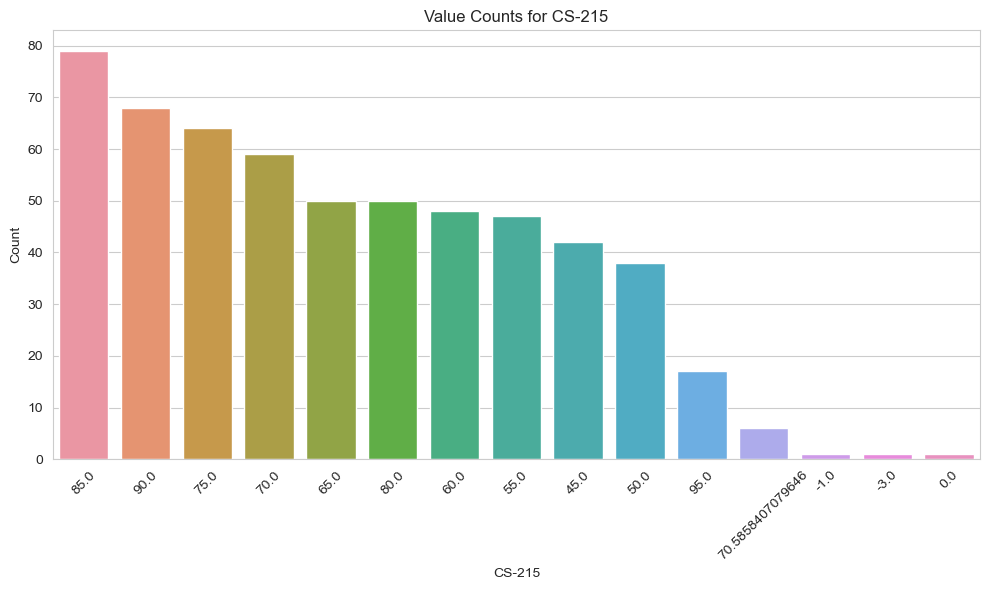

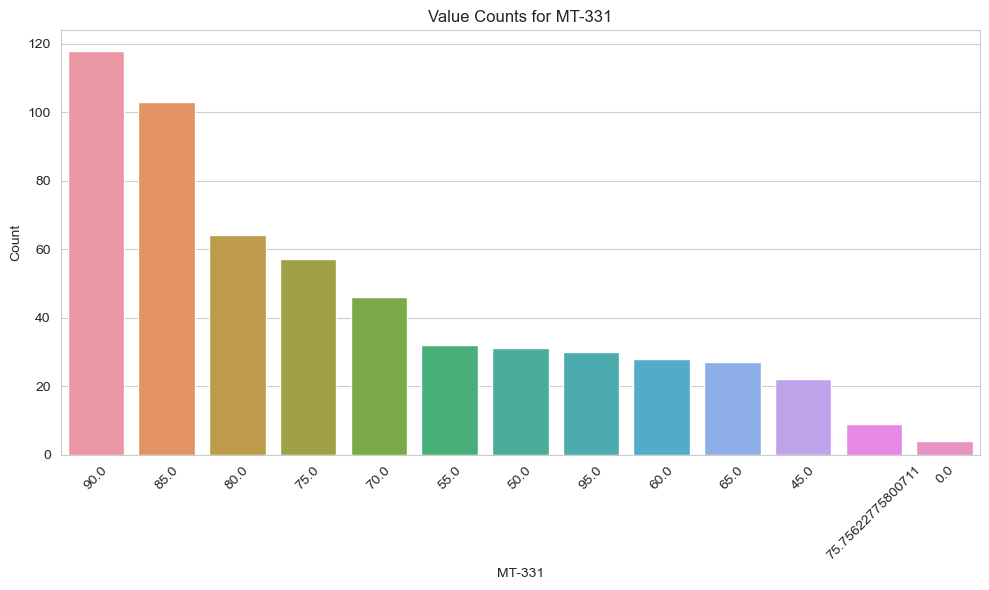

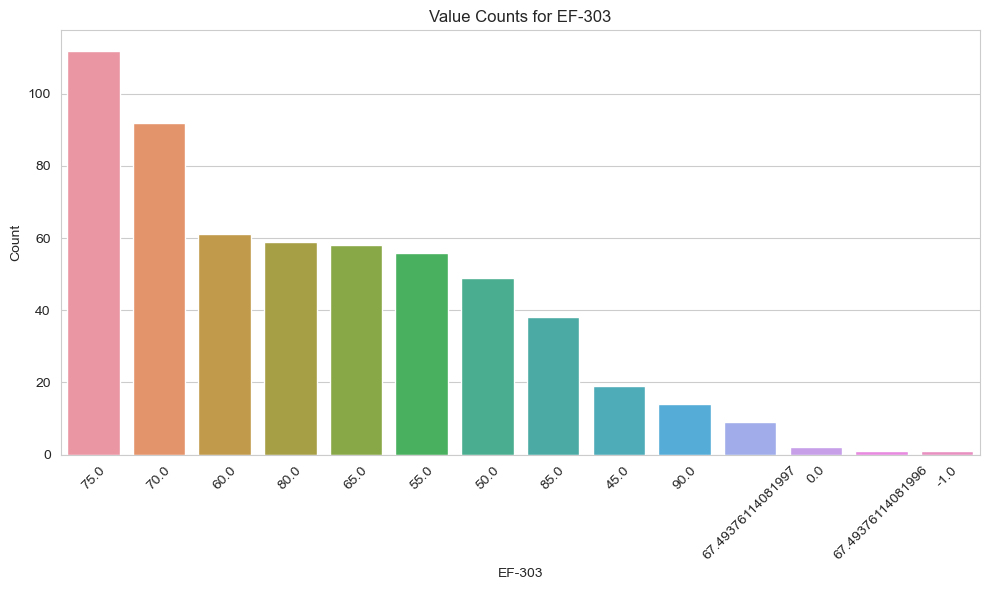

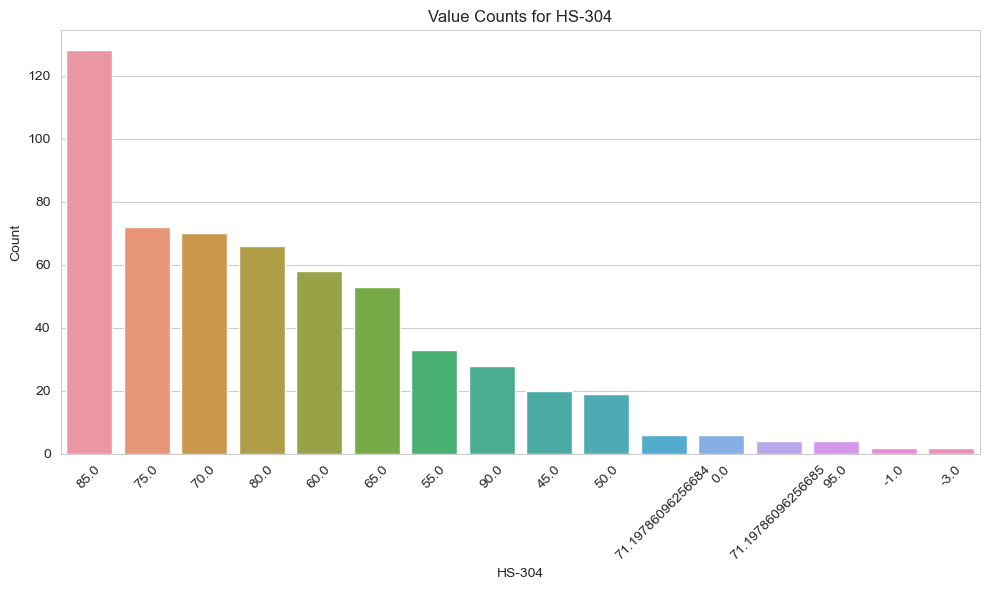

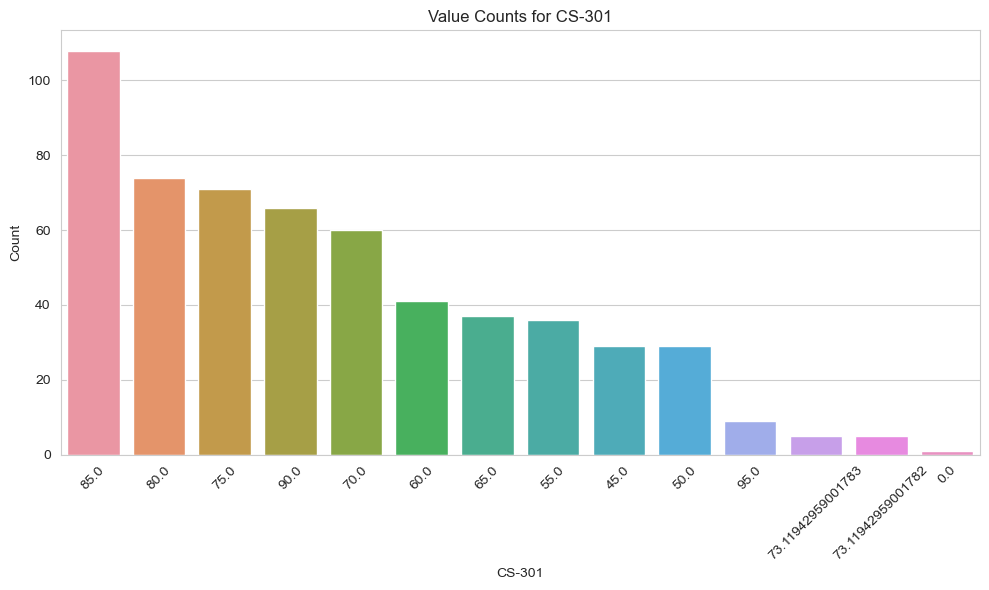

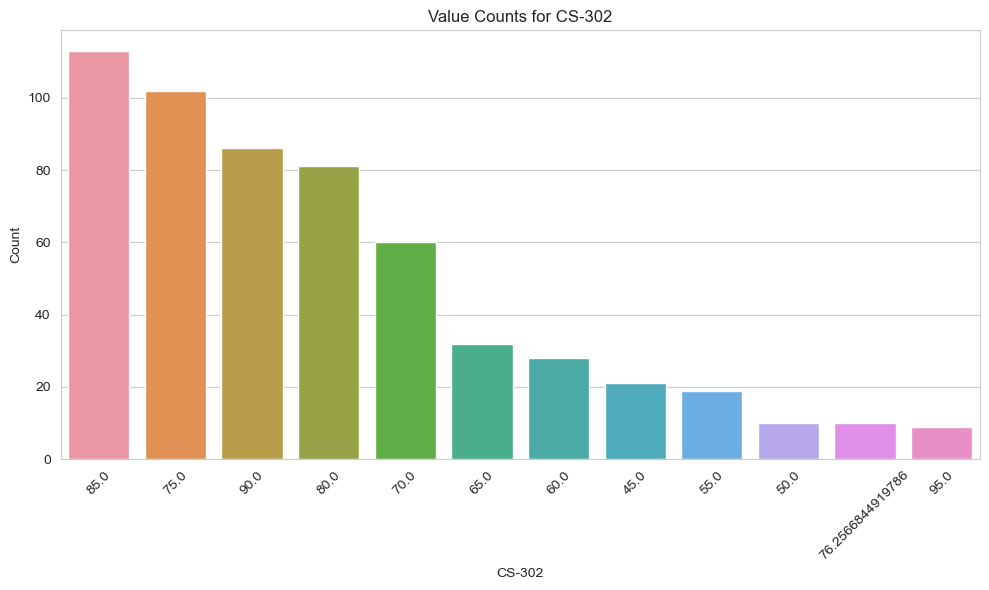

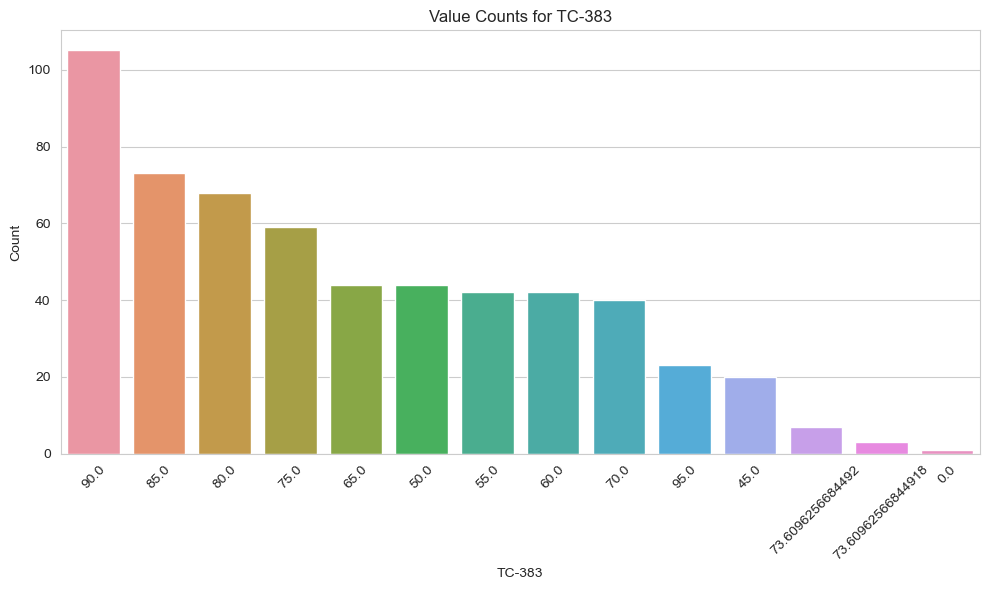

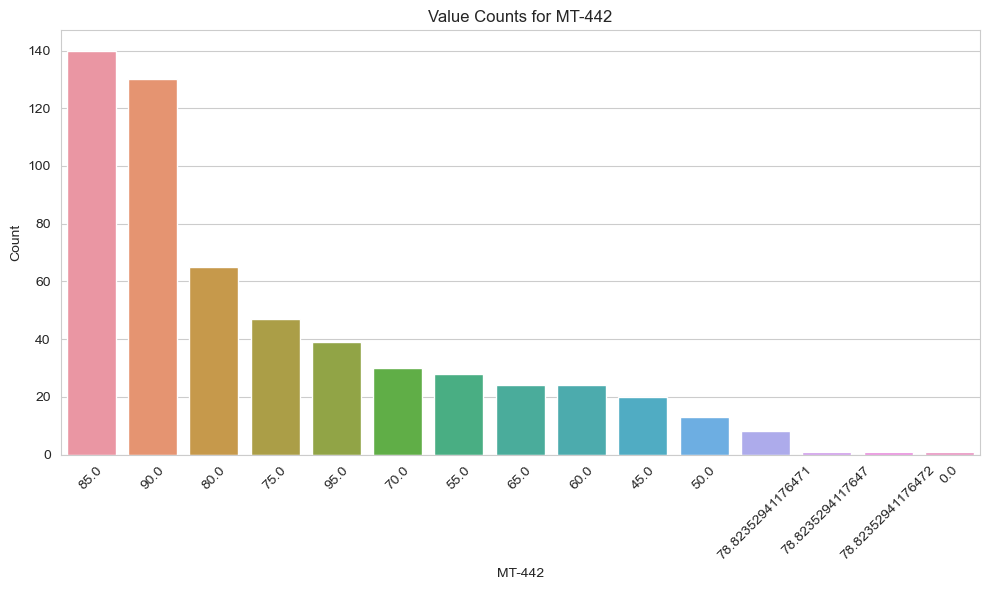

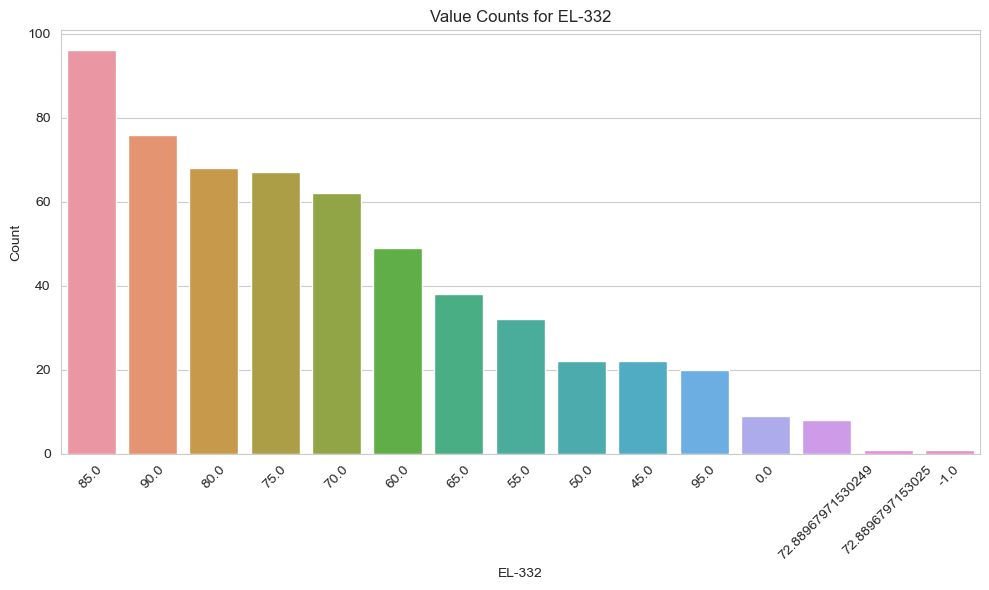

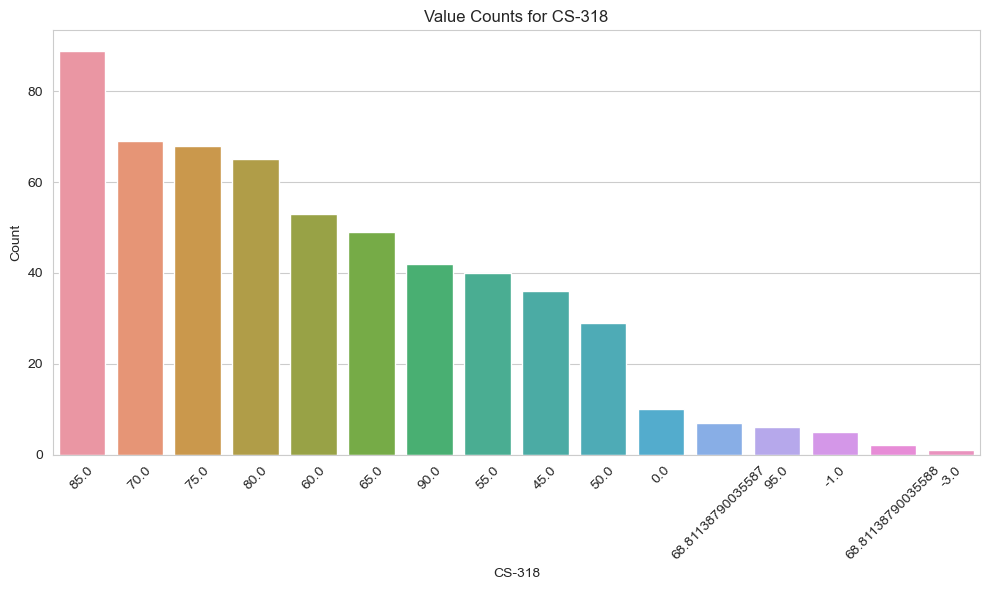

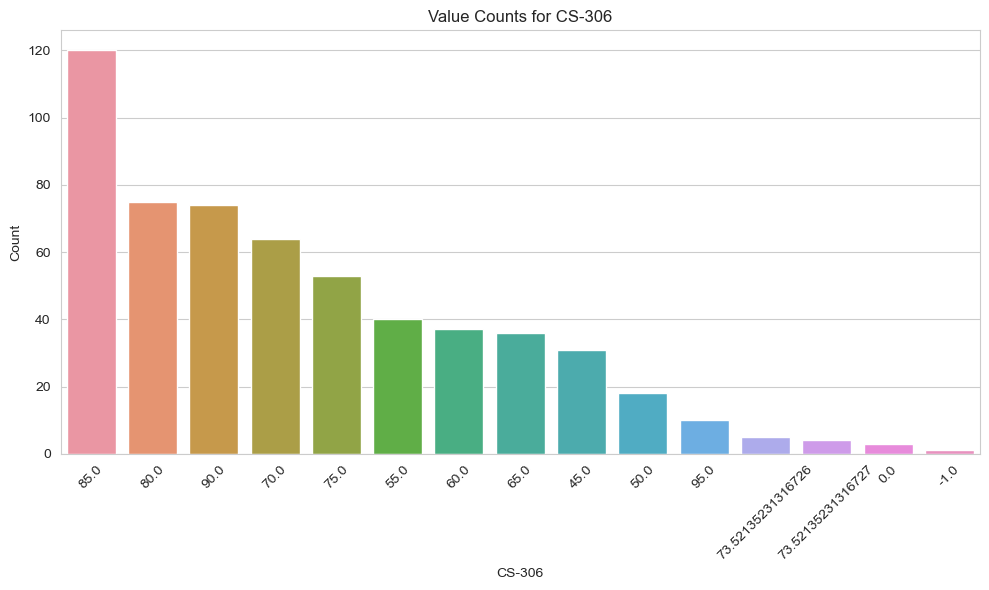

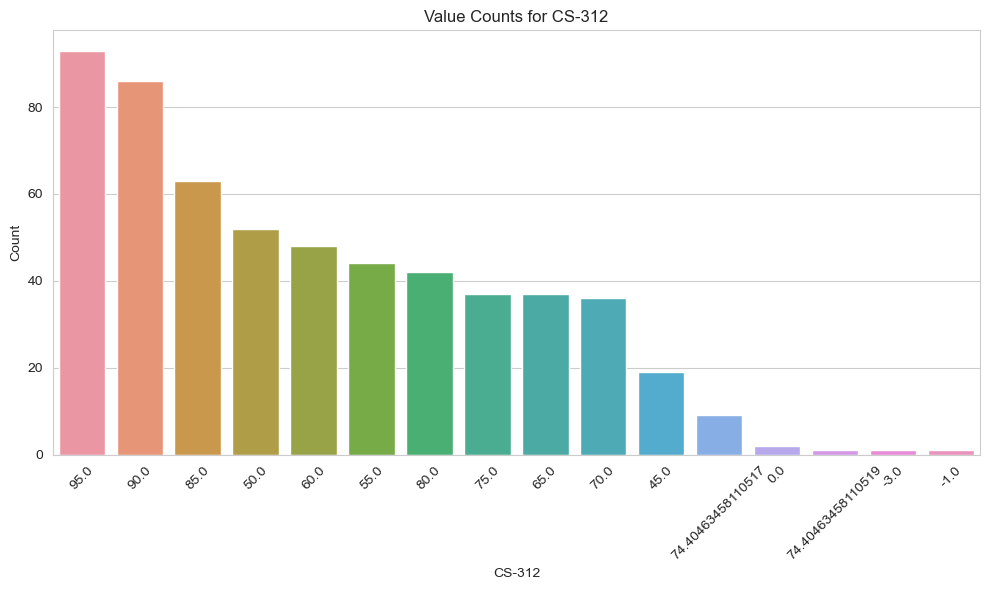

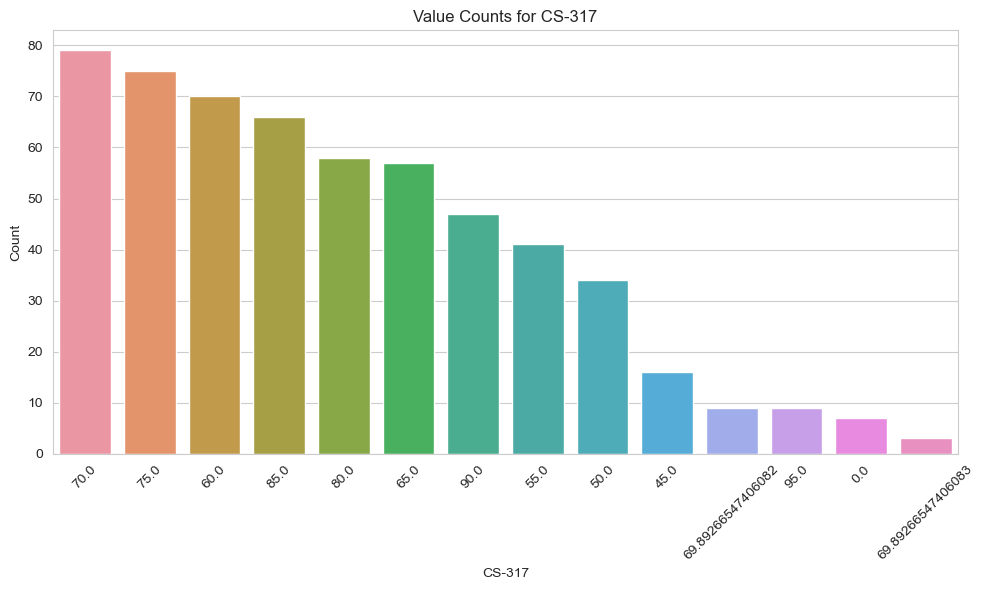

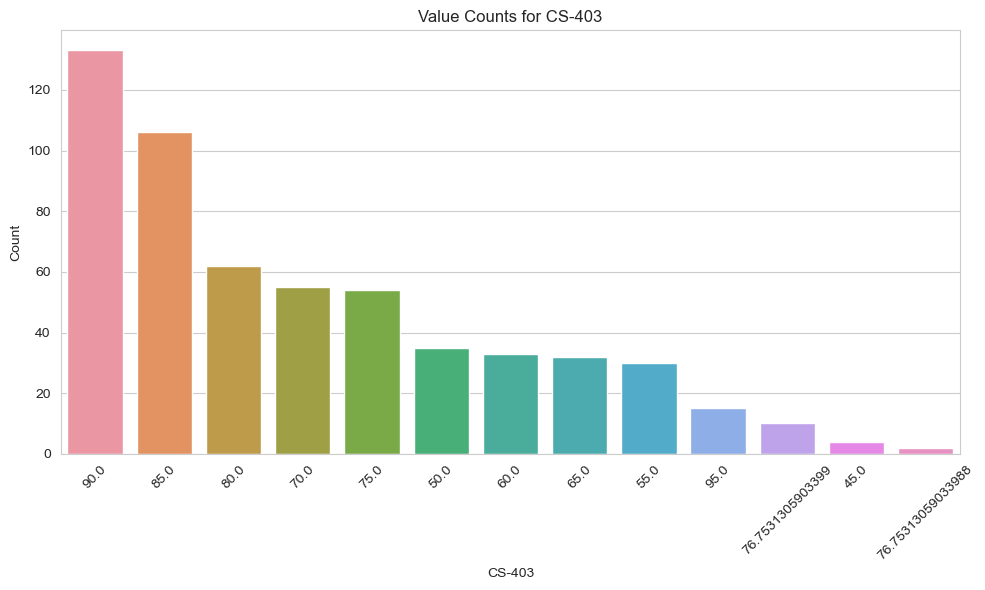

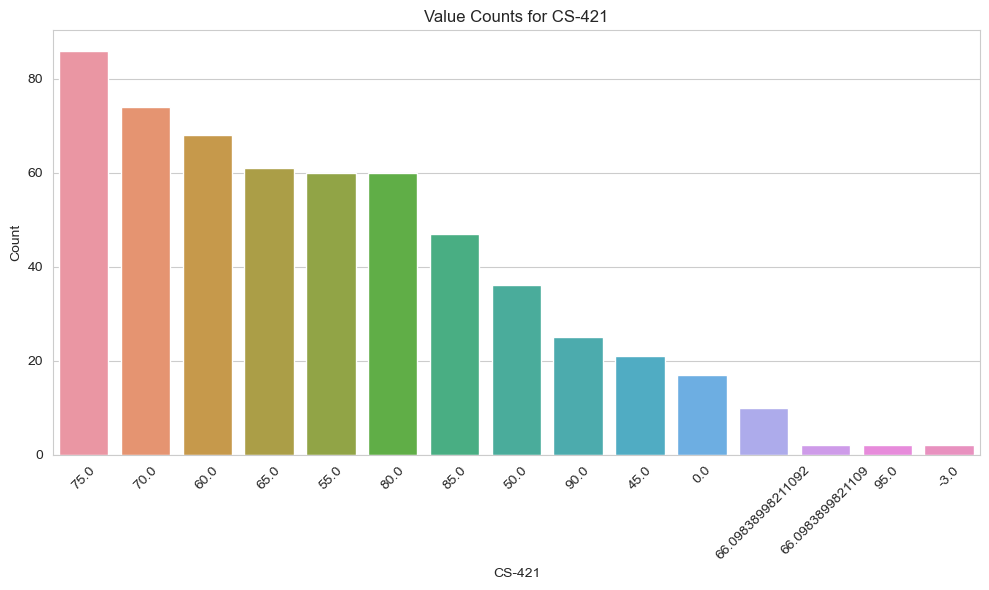

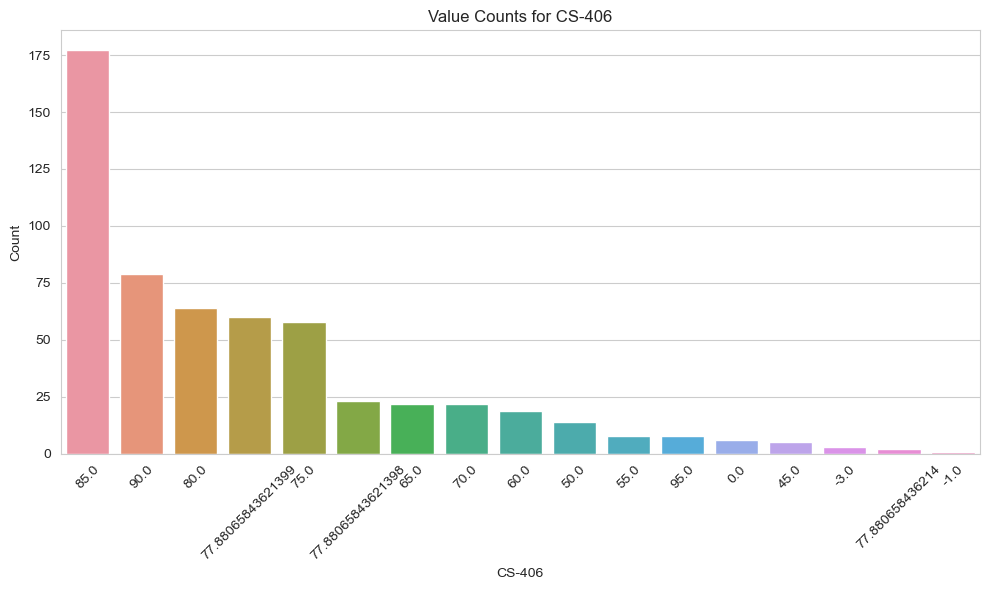

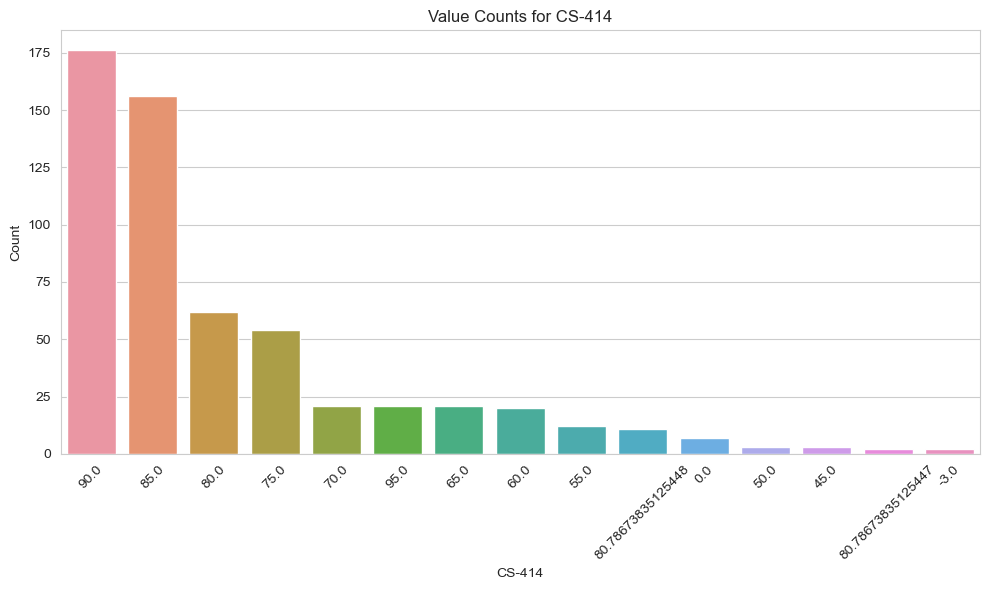

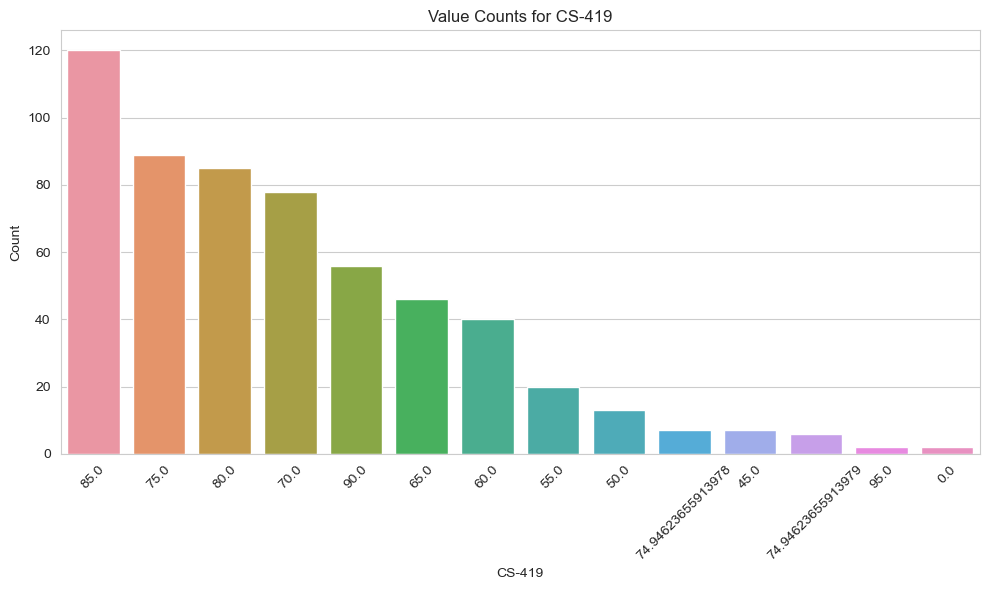

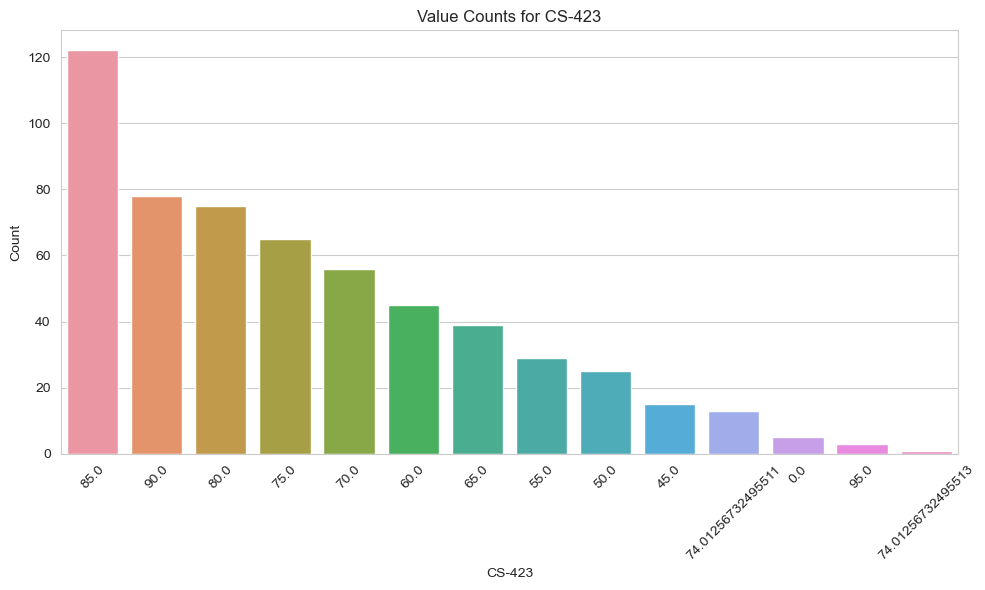

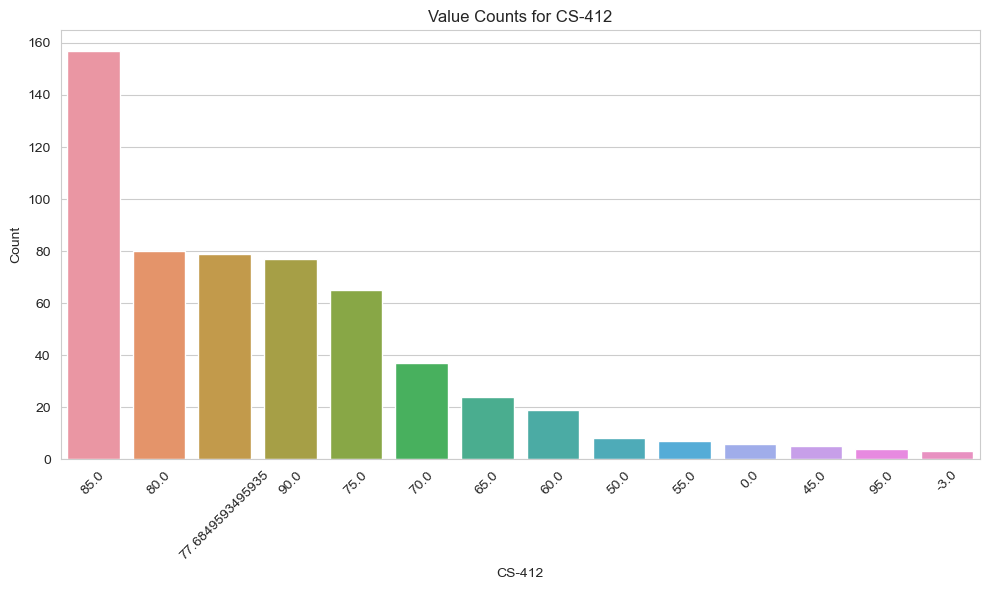

In [47]:
columns = df.columns[df.columns != 'CGPA']


for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Value Counts for {column}')
    plt.xticks(rotation=45)  
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show() 

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

df = pd.read_csv('Grades.csv')

grade_to_marks = {
    'A+': 95, 'A': 90, 'A-': 85, 'B+': 80, 'B': 75, 'B-': 70,
    'C+': 65, 'C': 60, 'C-': 55, 'D+': 50, 'D': 45, 'F': 0,
    'WU': -1, 'I': -2, 'W': -3
}

columns_to_encode = ['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
                     'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
                     'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
                     'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
                     'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
                     'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df_encoded = df.copy()
for column in columns_to_encode:
    df_encoded[column] = df_encoded[column].map(grade_to_marks)

def impute_missing_values(df, target_column):
    df_copy = df.copy()
    
    missing_rows = df_copy[target_column].isnull()
    
    if missing_rows.sum() == 0:
        return df_copy
    
    cgpa_values = df_copy[['CGPA']].values
    distances = euclidean_distances(cgpa_values, cgpa_values)
    
    for index in df_copy[missing_rows].index:
        similar_rows = np.argsort(distances[index])
        
        similar_rows = similar_rows[similar_rows != index]
        
        similar_values = df_copy.loc[similar_rows, target_column].dropna()
        
        if not similar_values.empty:
            df_copy.loc[index, target_column] = similar_values.mean()
        else:
            df_copy.loc[index, target_column] = df_copy[target_column].mean()
    
    return df_copy

for column in columns_to_encode:
    df_encoded = impute_missing_values(df_encoded, column)

df_encoded.to_csv('encoded_imputed_similar_cgpa.csv', index=False)

print(df_encoded.head())


   Seat No.  PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  \
0  CS-97001      70      50    55.0       60.0    55.0      50    45.0   
1  CS-97002      90      45    50.0       45.0    70.0      60    45.0   
2  CS-97003      90      75    90.0       70.0    80.0      90    70.0   
3  CS-97004      45      65    50.0       45.0    45.0      85    50.0   
4  CS-97005      85      85    85.0       80.0    90.0      90    85.0   

   EL-102  EE-119  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  \
0    55.0    70.0  ...    55.0    55.0    55.0    55.0    85.0    90.0   
1    90.0    50.0  ...    50.0    45.0    60.0    45.0    85.0    70.0   
2    80.0    85.0  ...    75.0    75.0    90.0    60.0    90.0    90.0   
3    55.0    45.0  ...    50.0    60.0    50.0    55.0    70.0    75.0   
4    80.0    90.0  ...    70.0    80.0    80.0    70.0    85.0    90.0   

   CS-419  CS-423  CS-412   CGPA  
0    55.0    75.0    85.0  2.205  
1    60.0    60.0    75.0  2.008  
2    

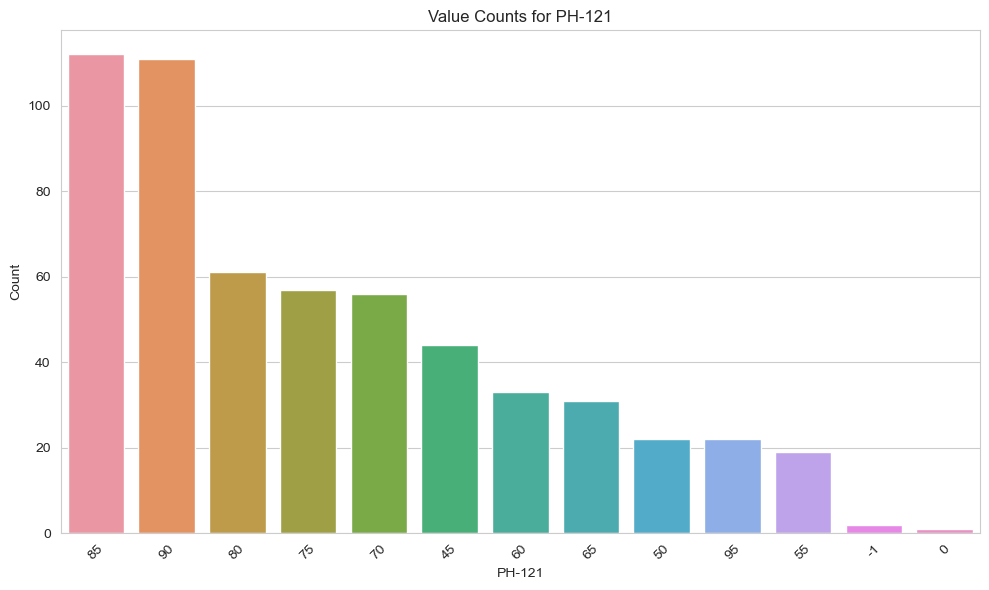

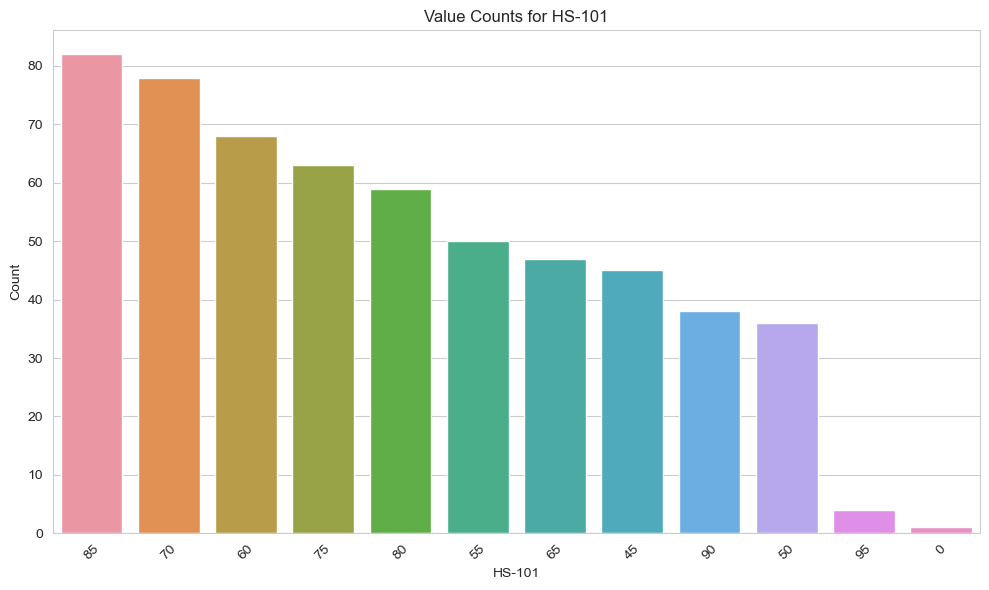

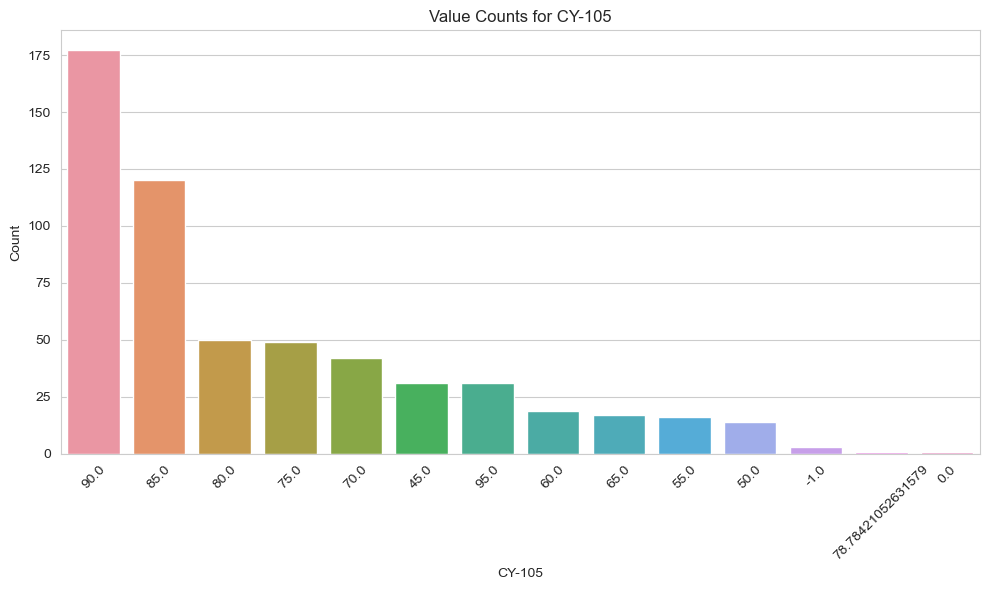

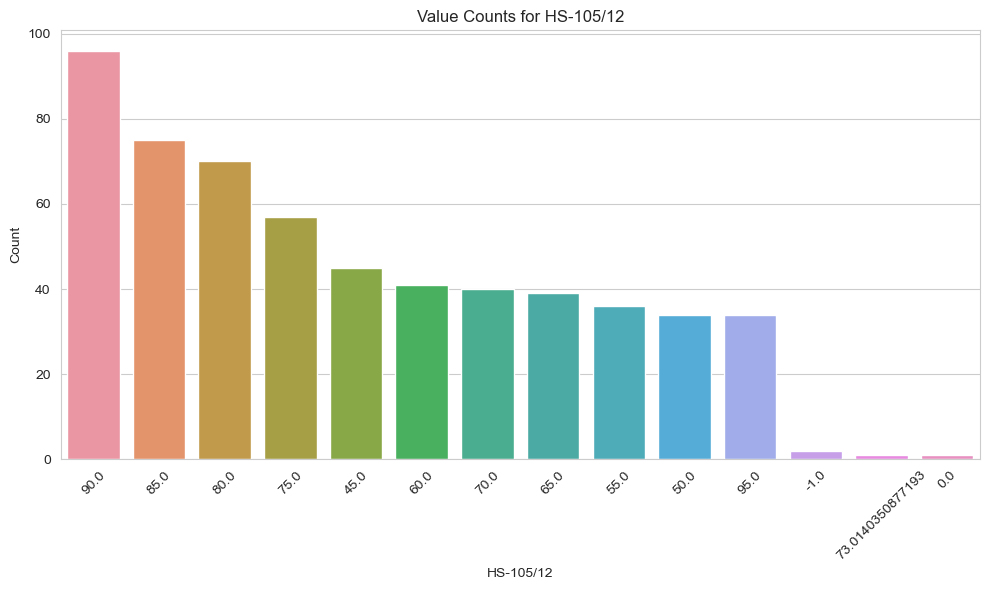

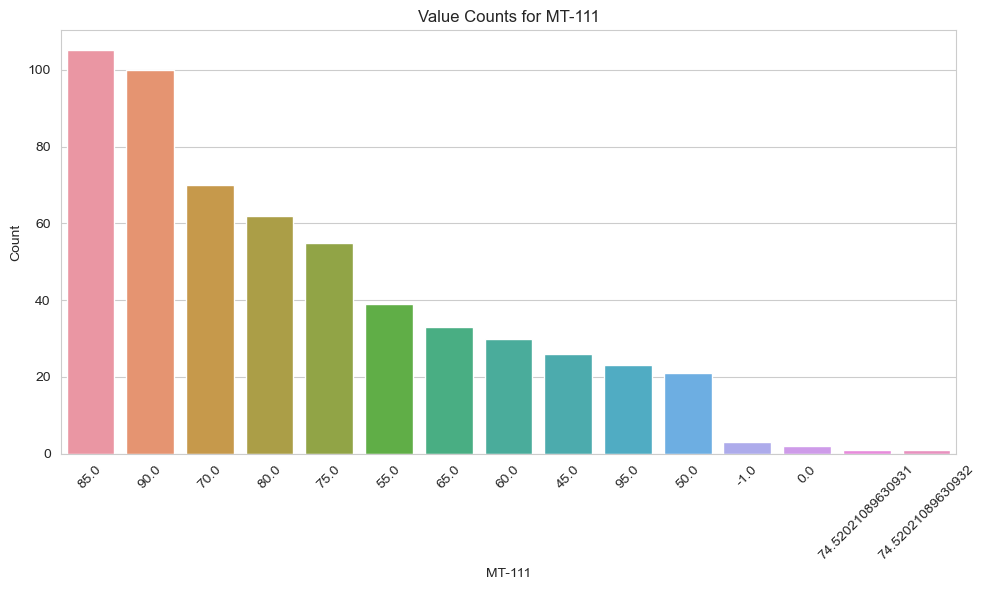

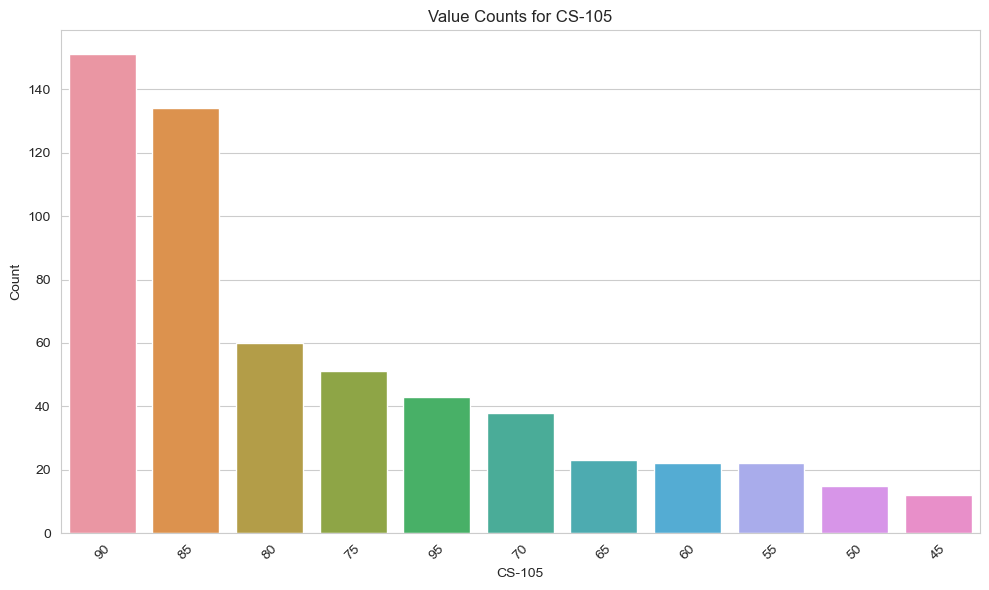

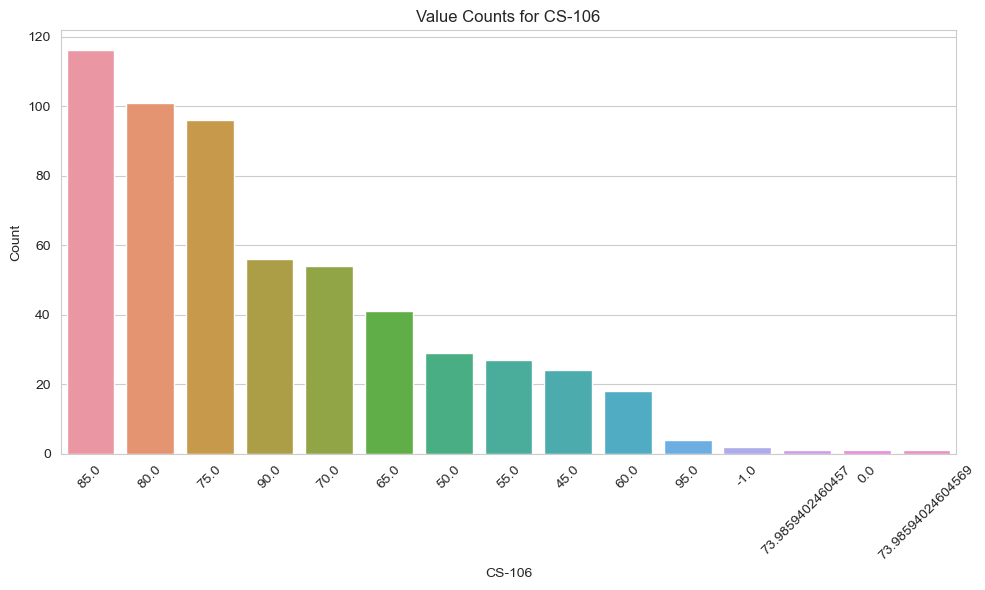

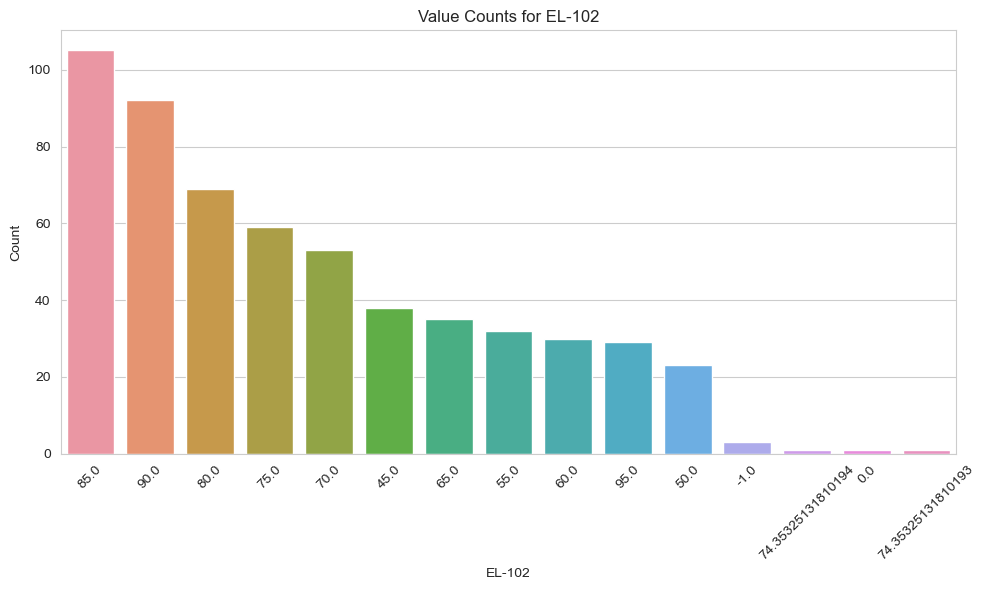

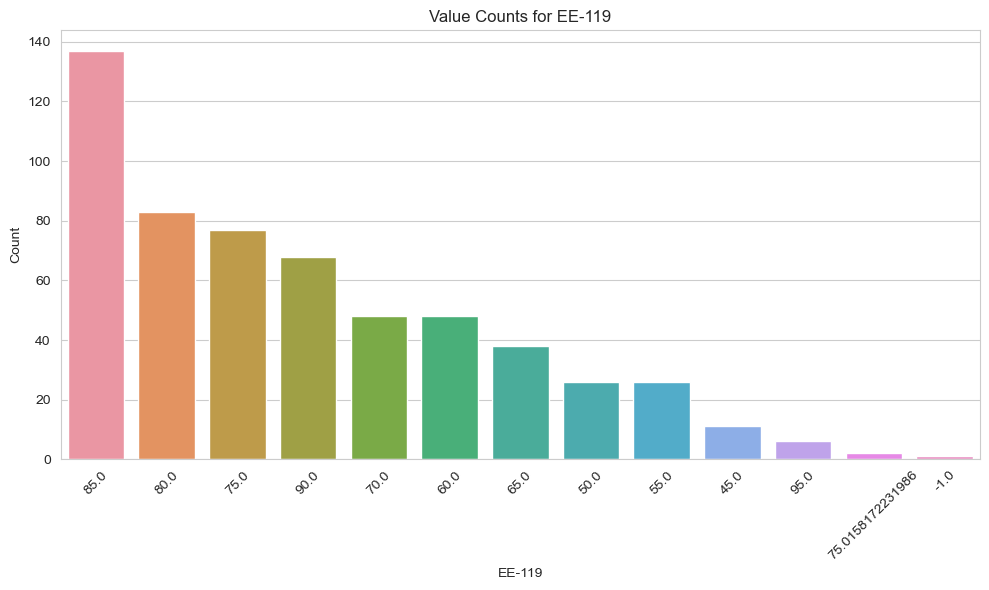

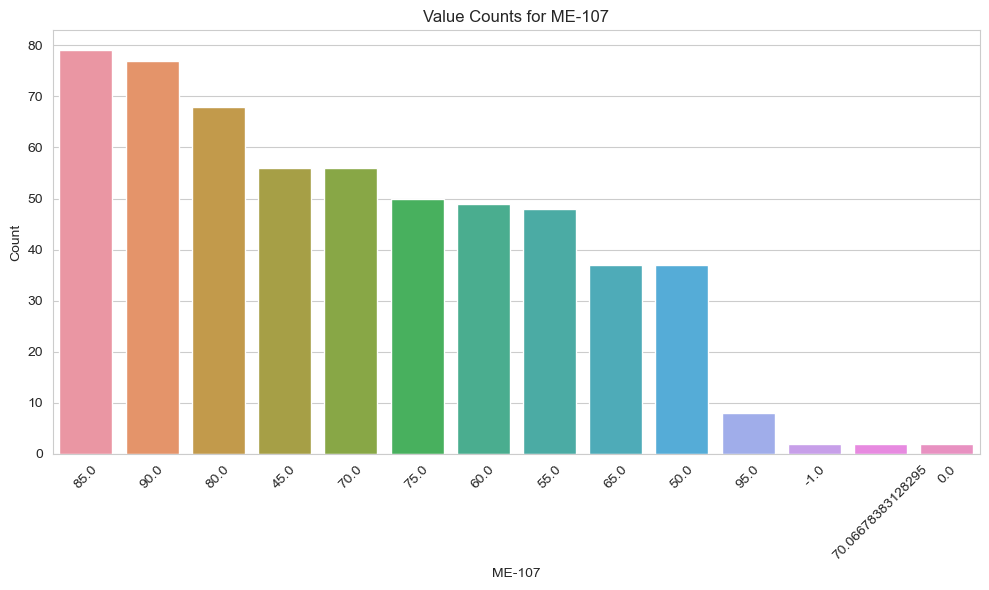

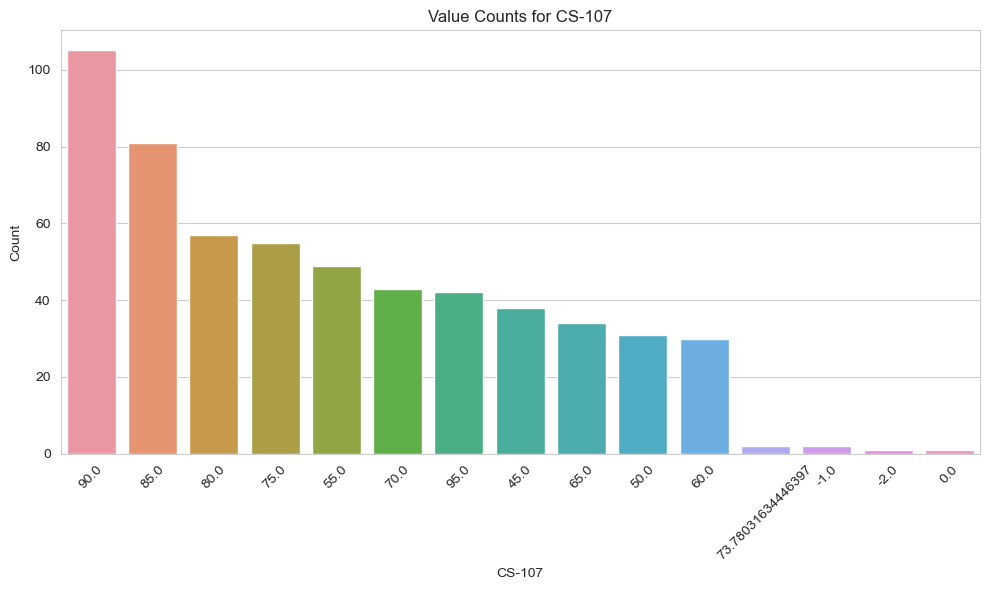

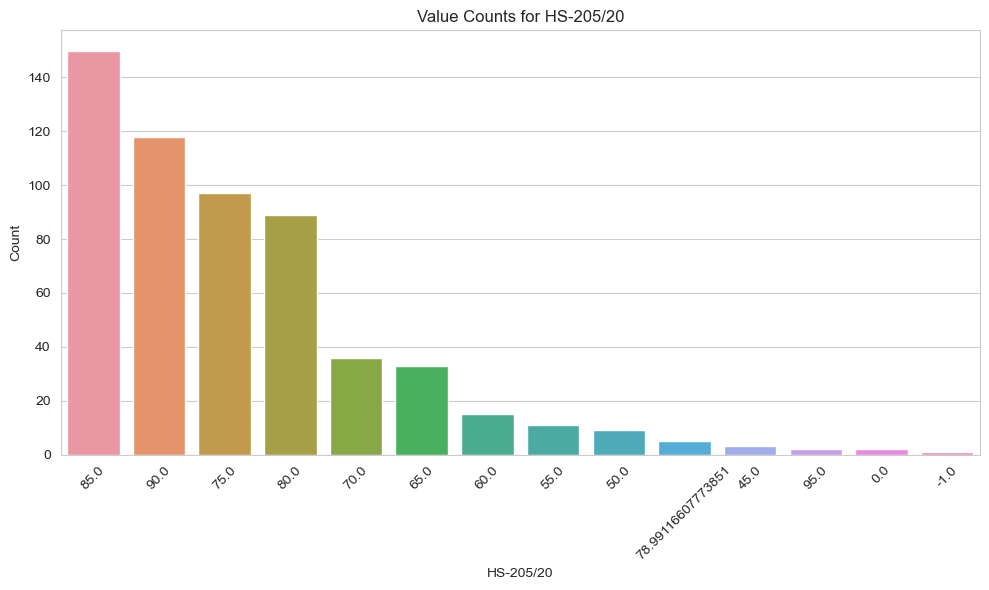

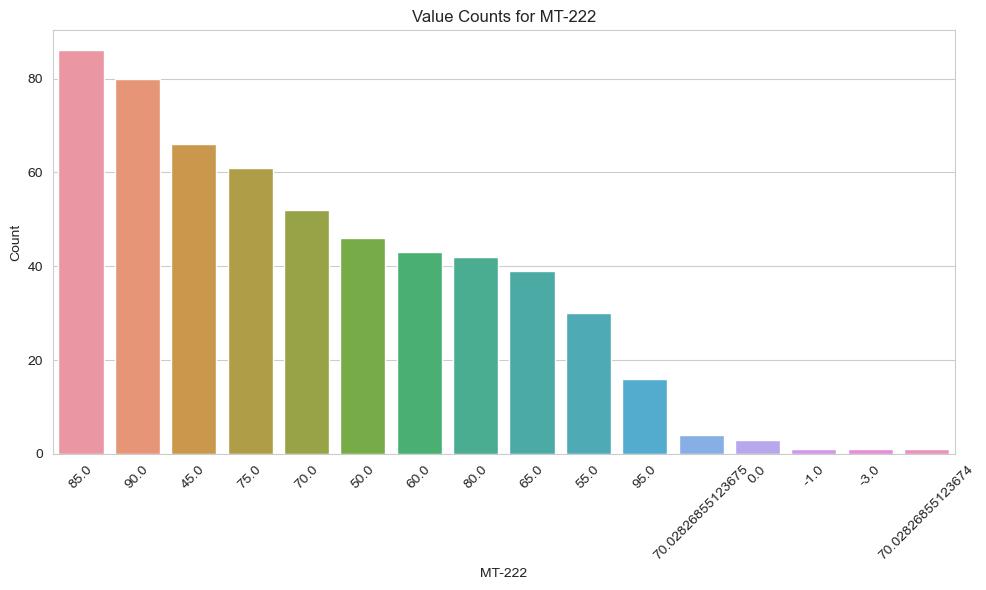

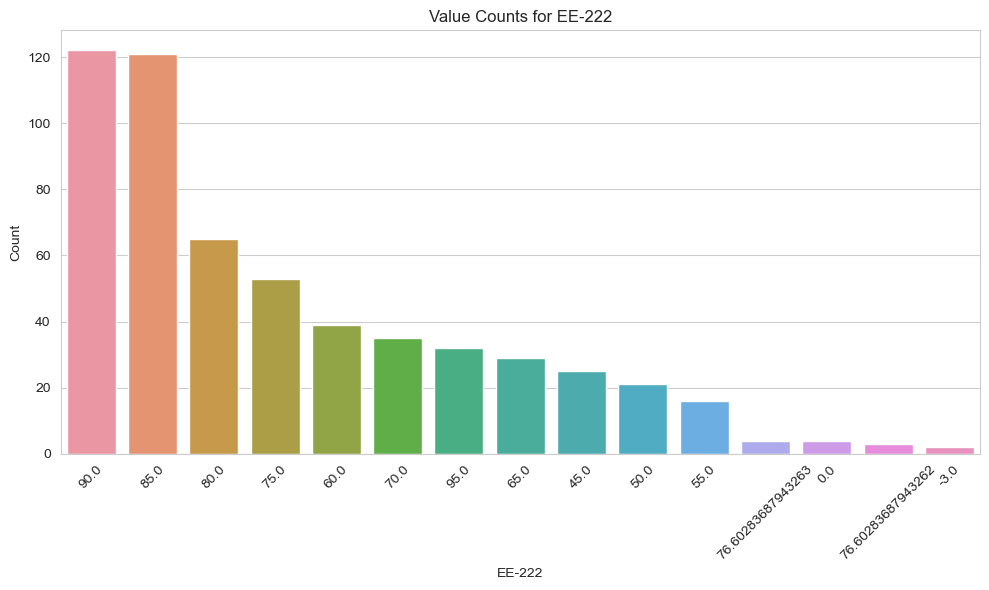

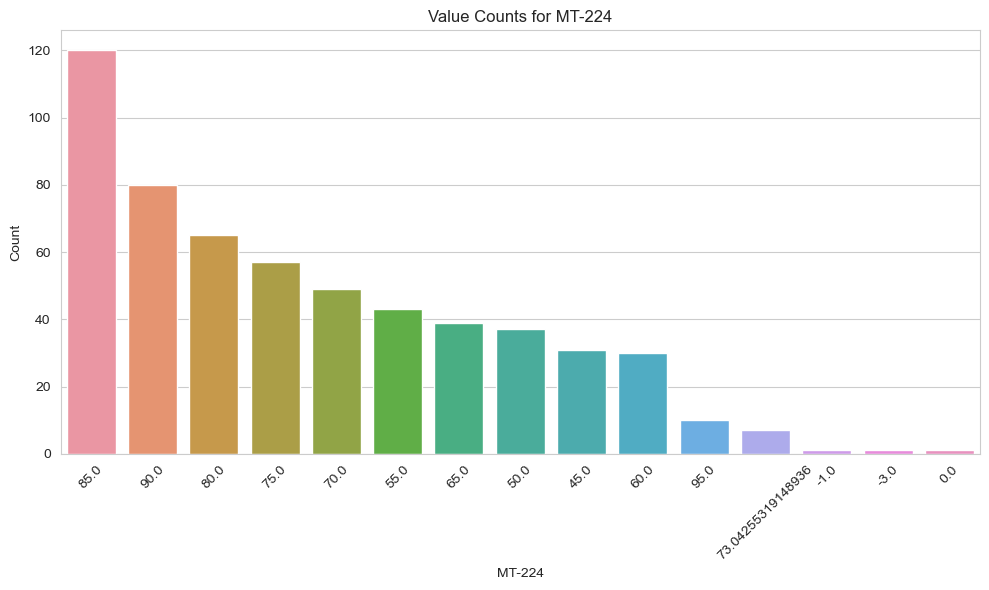

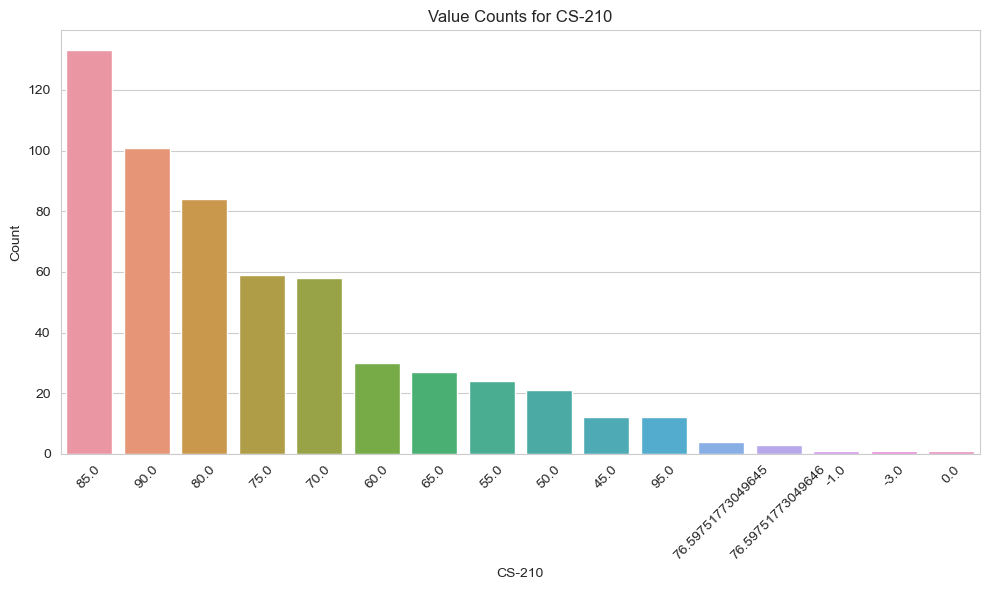

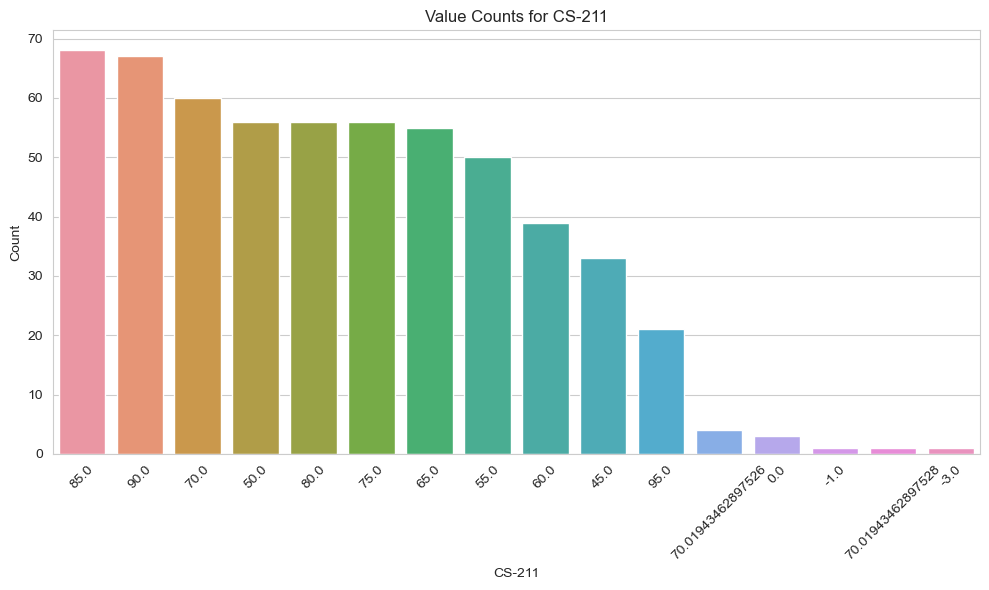

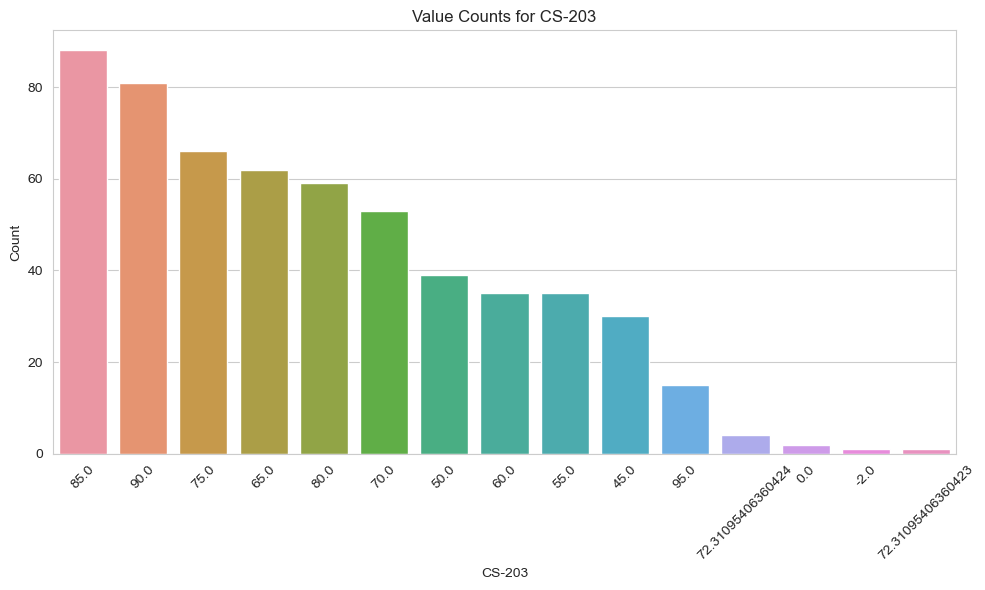

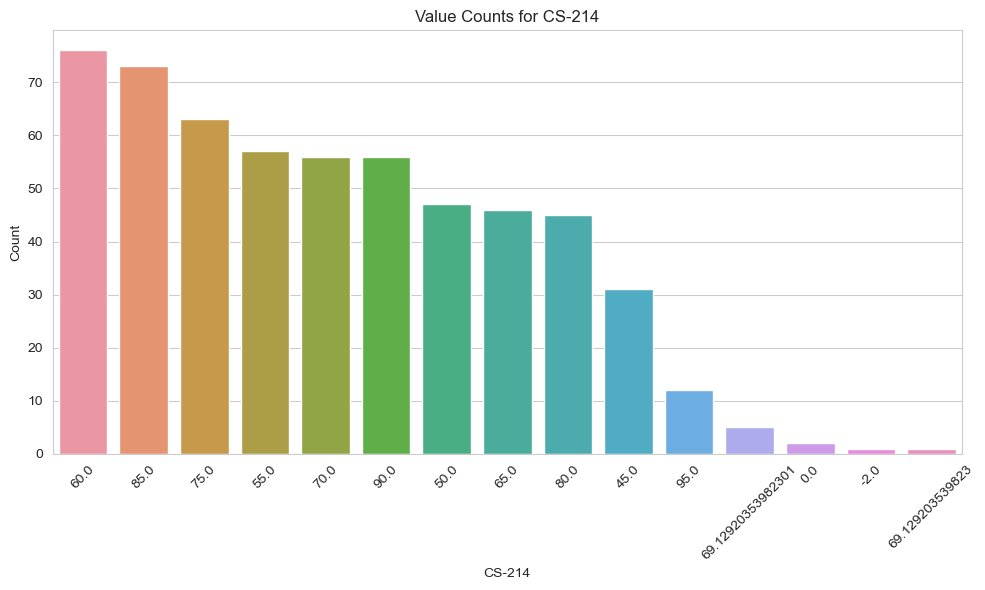

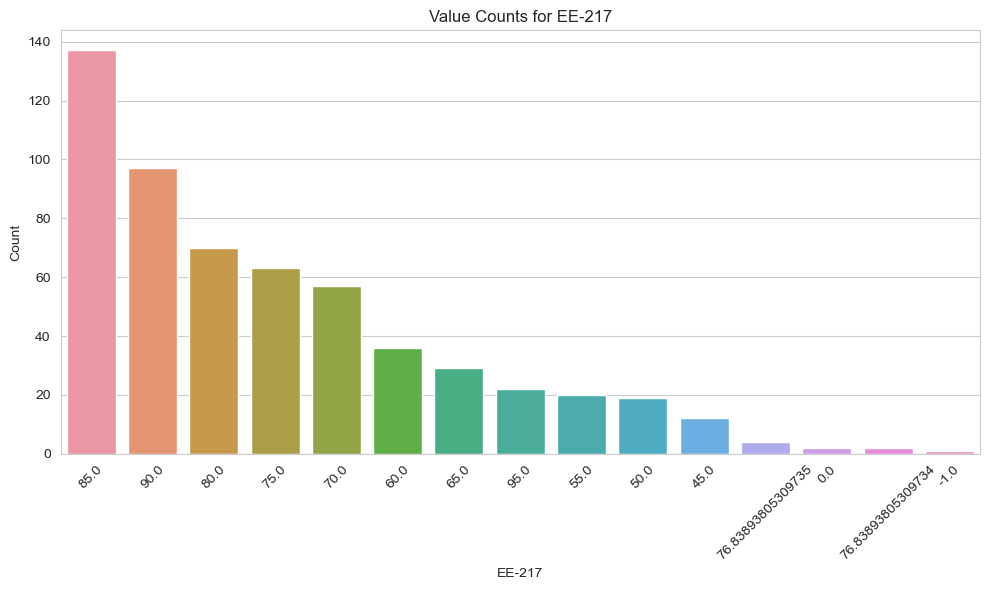

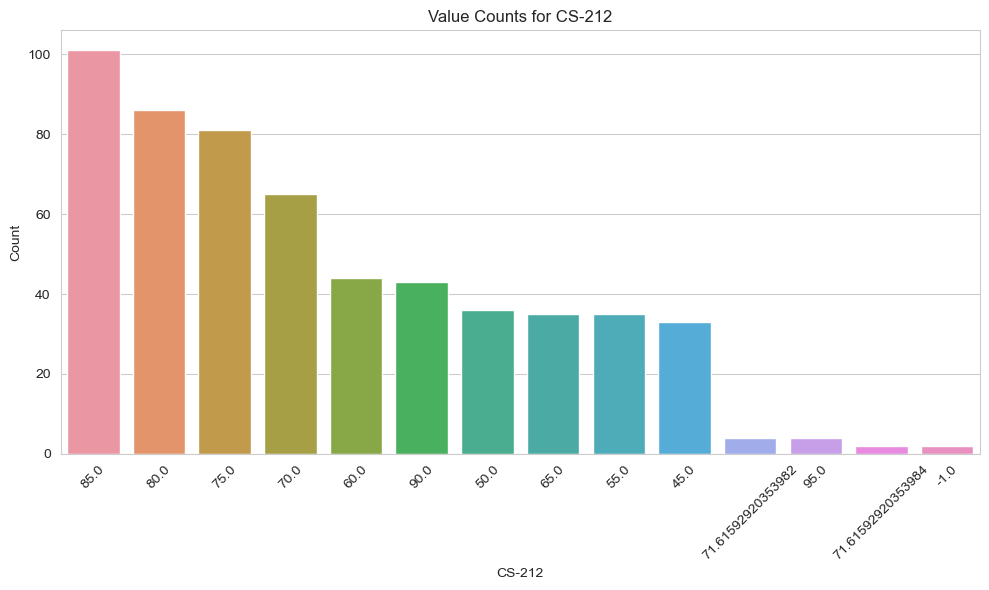

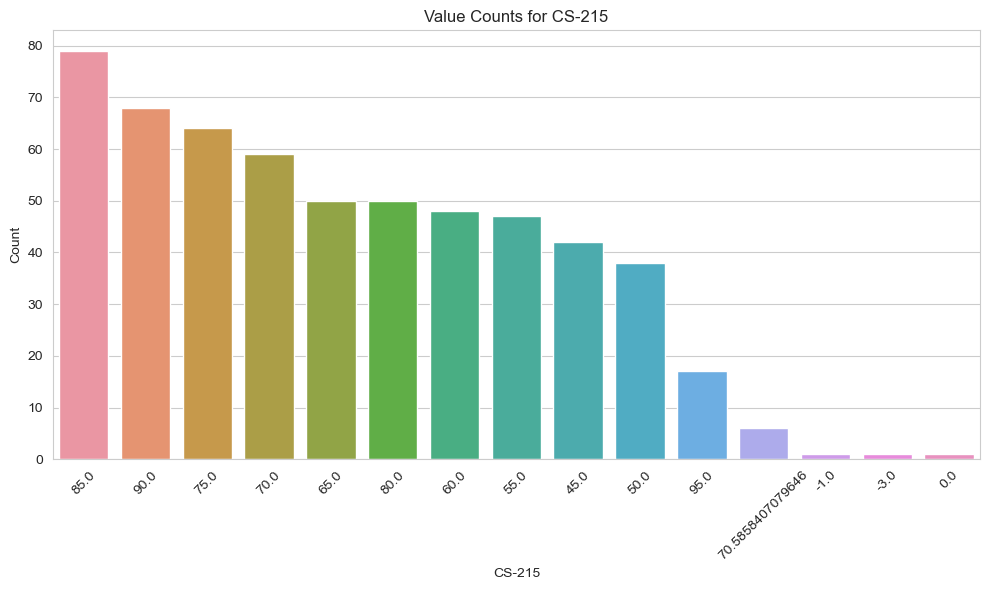

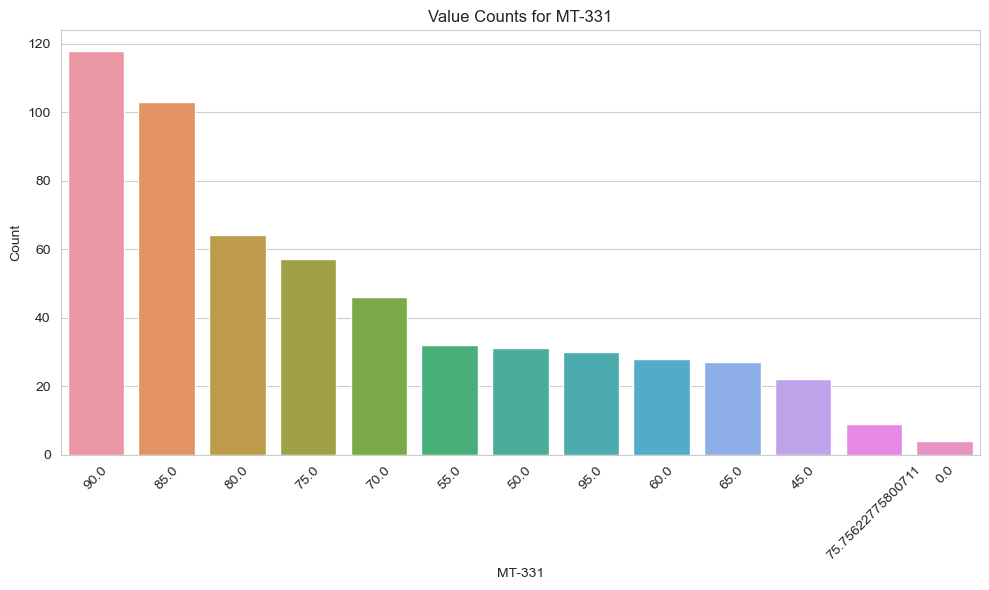

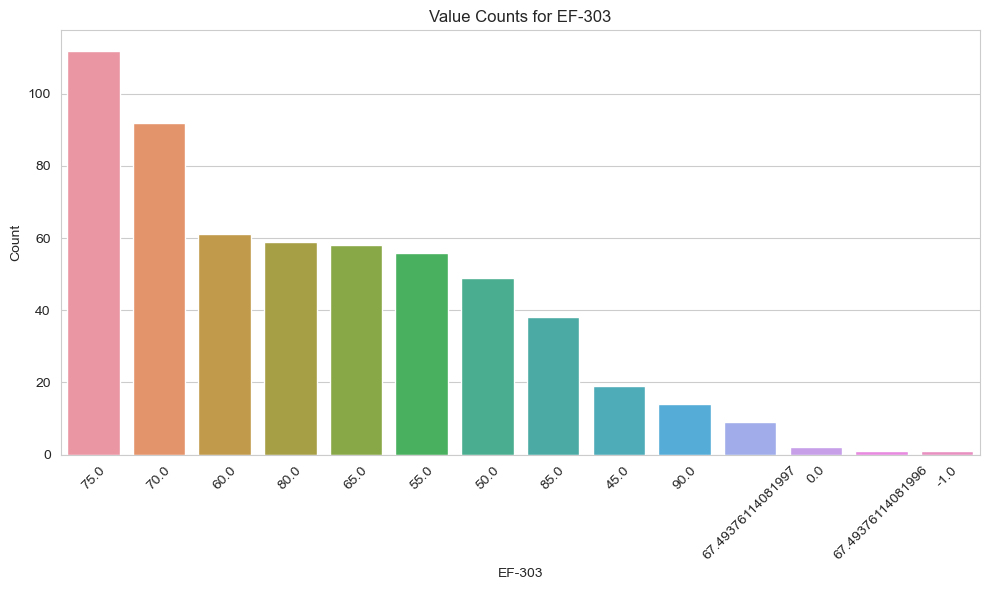

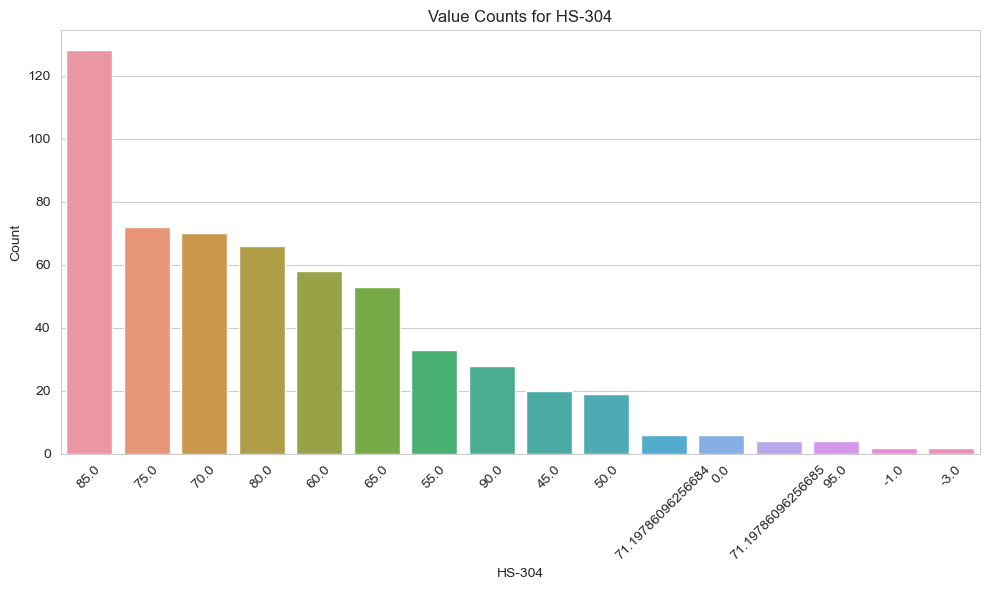

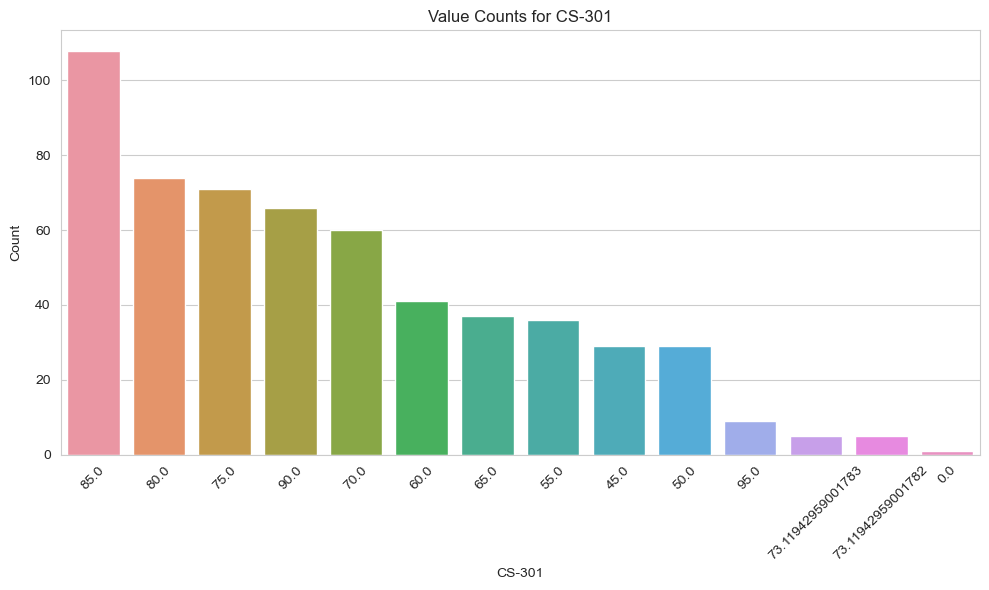

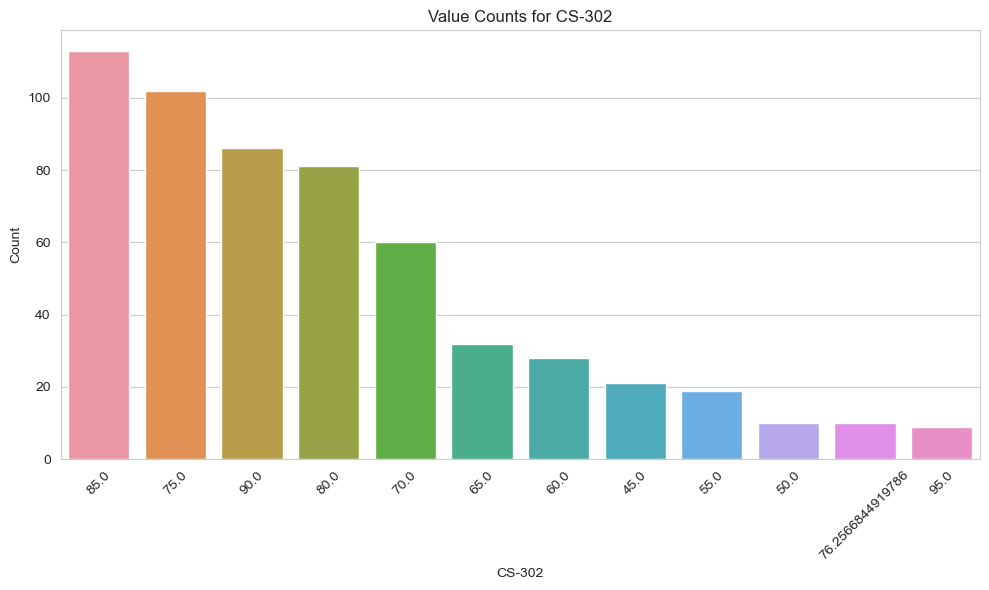

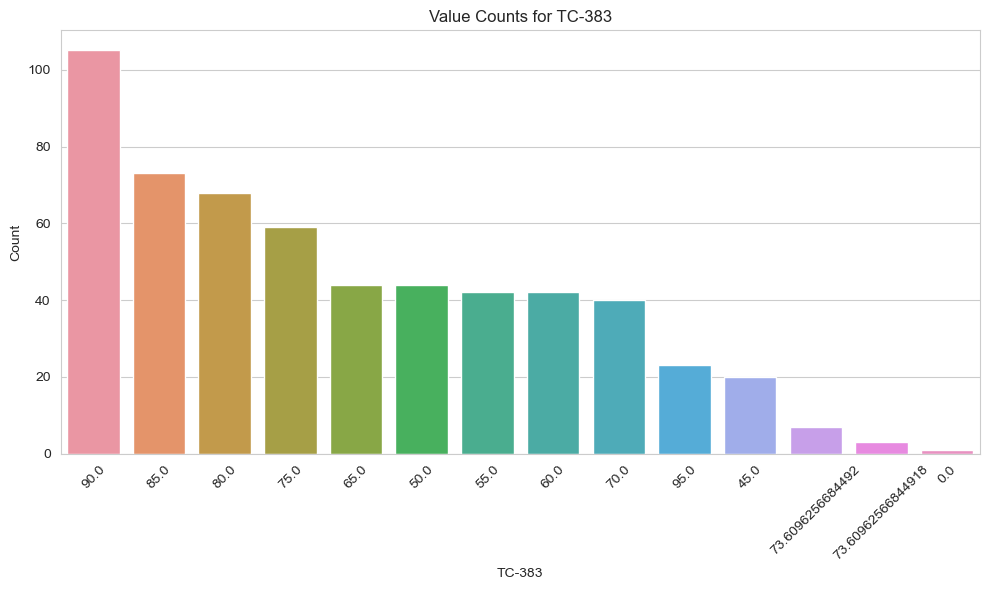

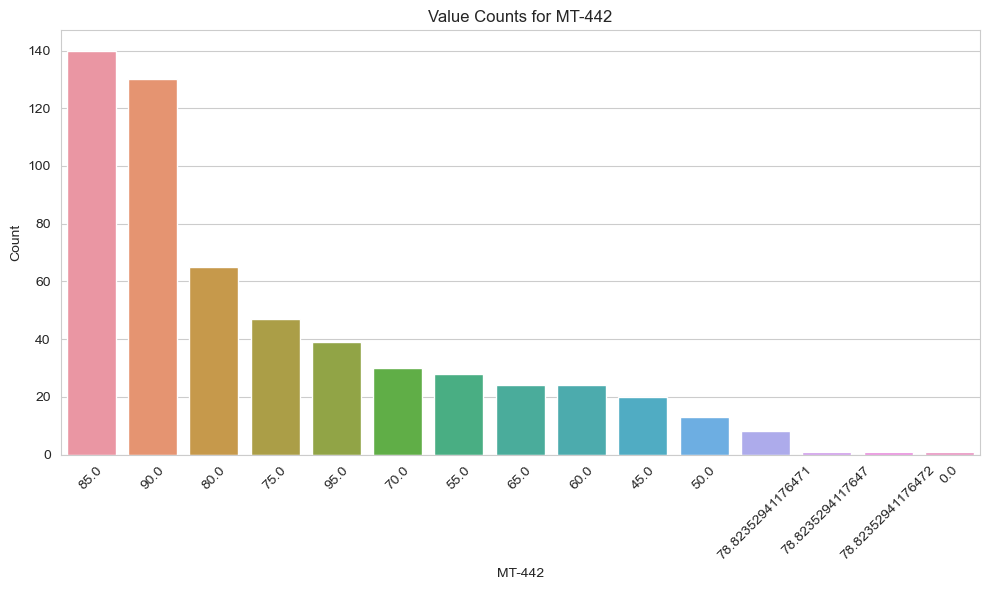

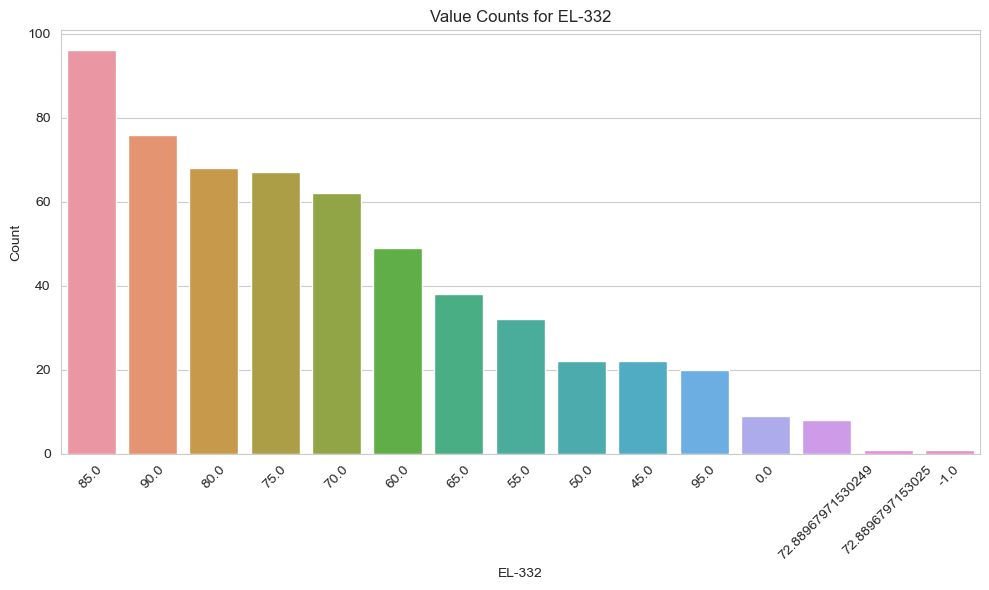

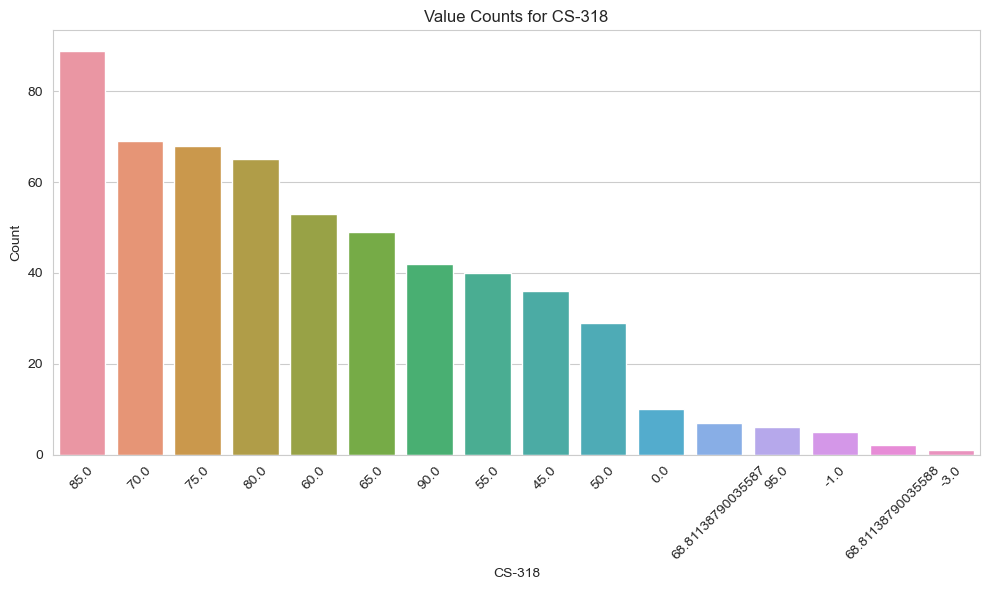

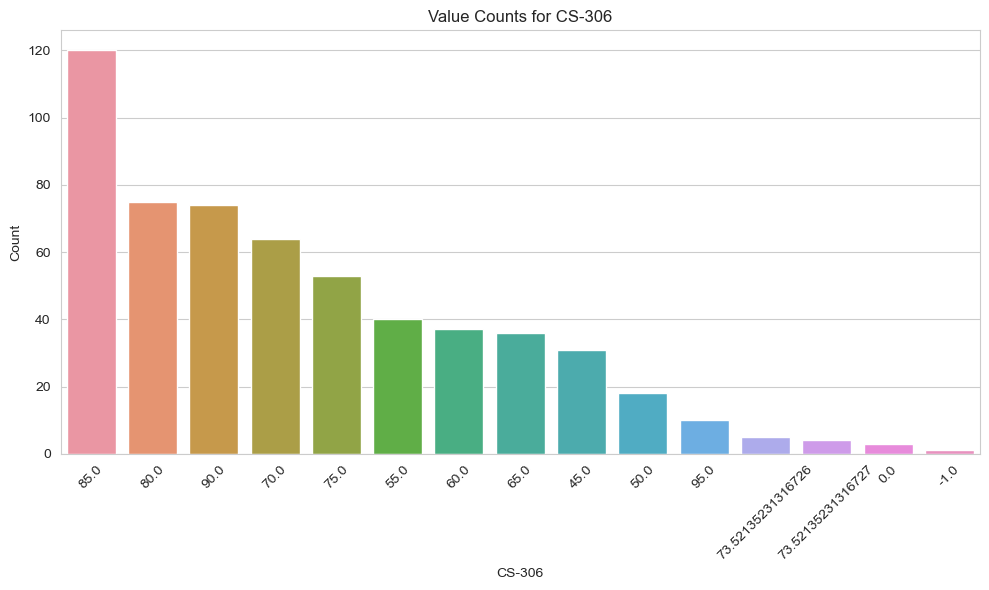

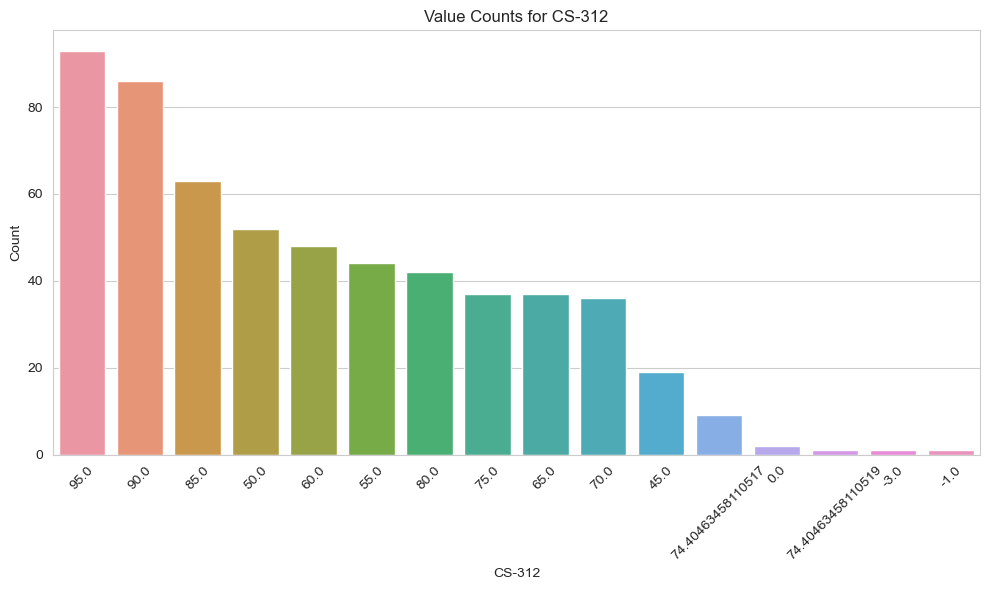

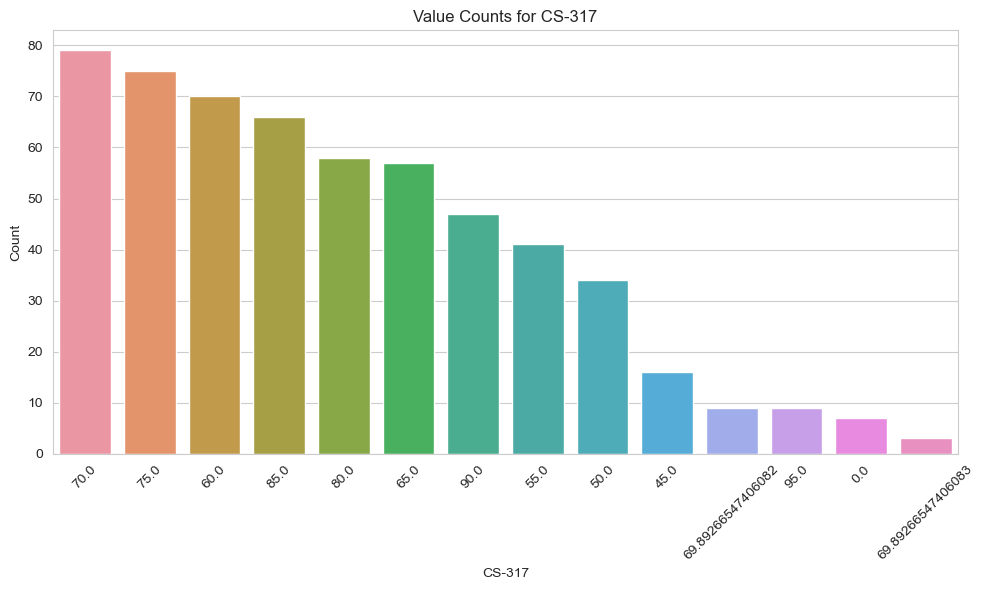

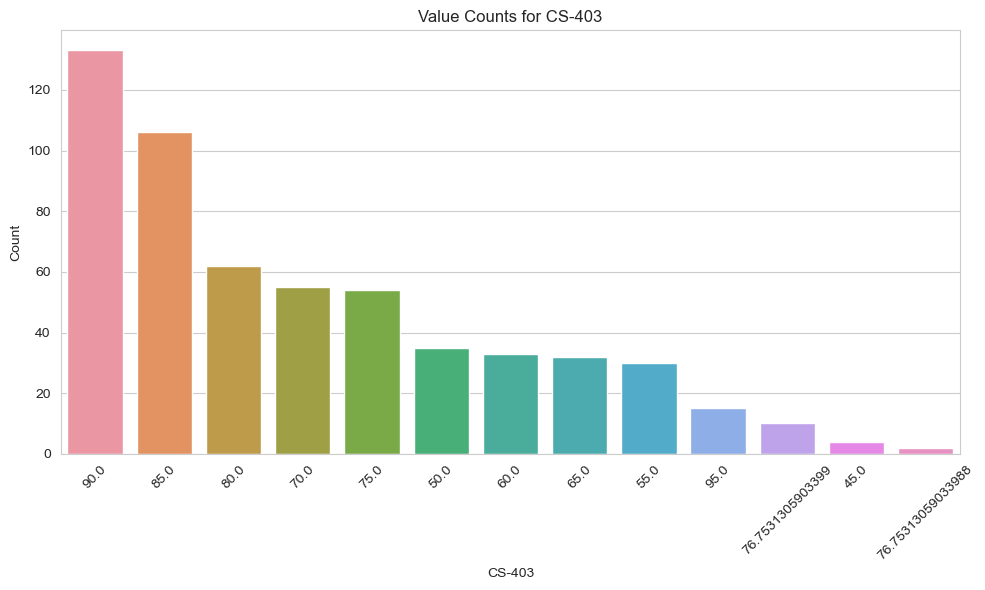

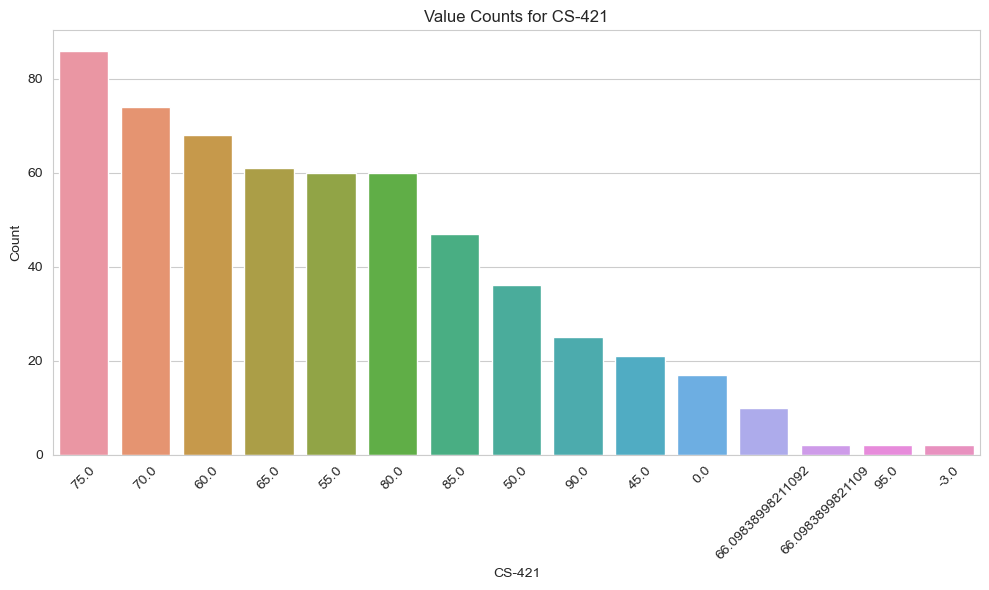

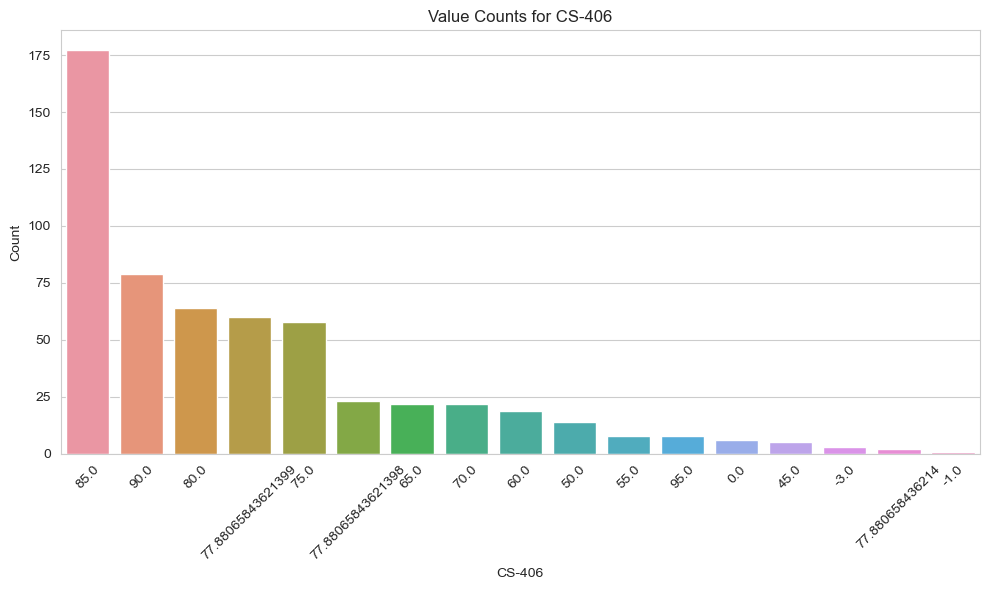

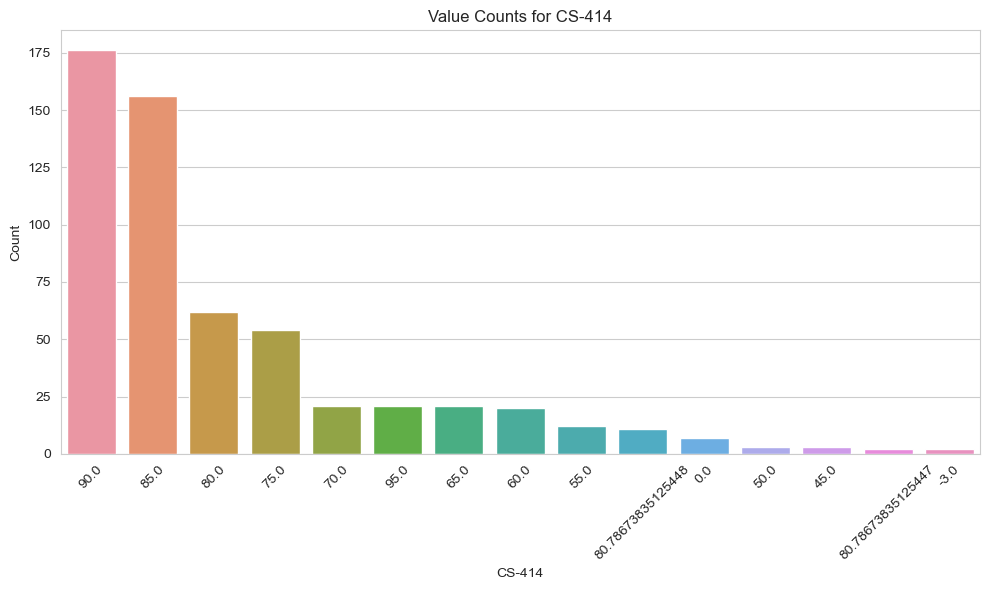

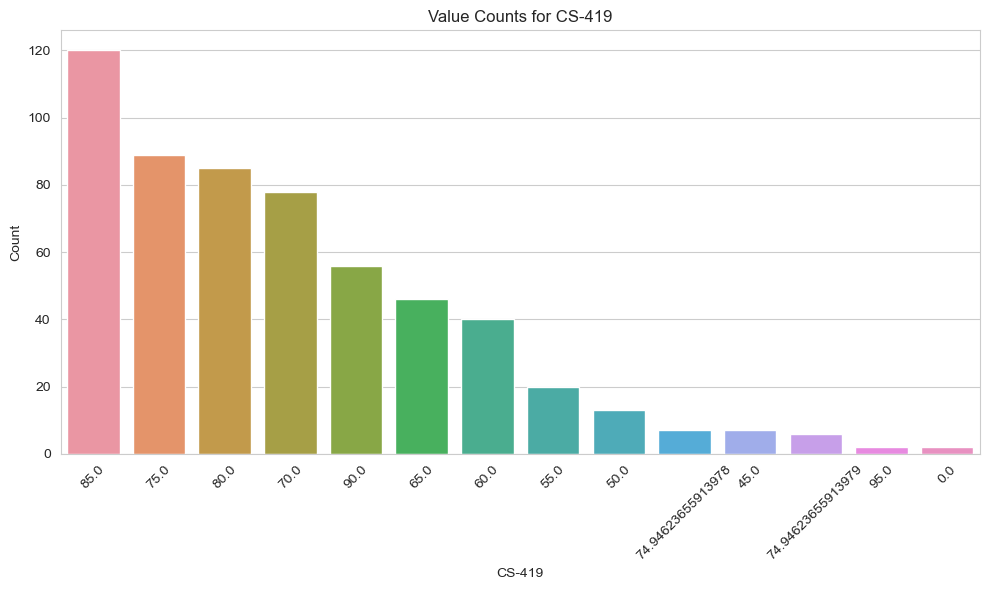

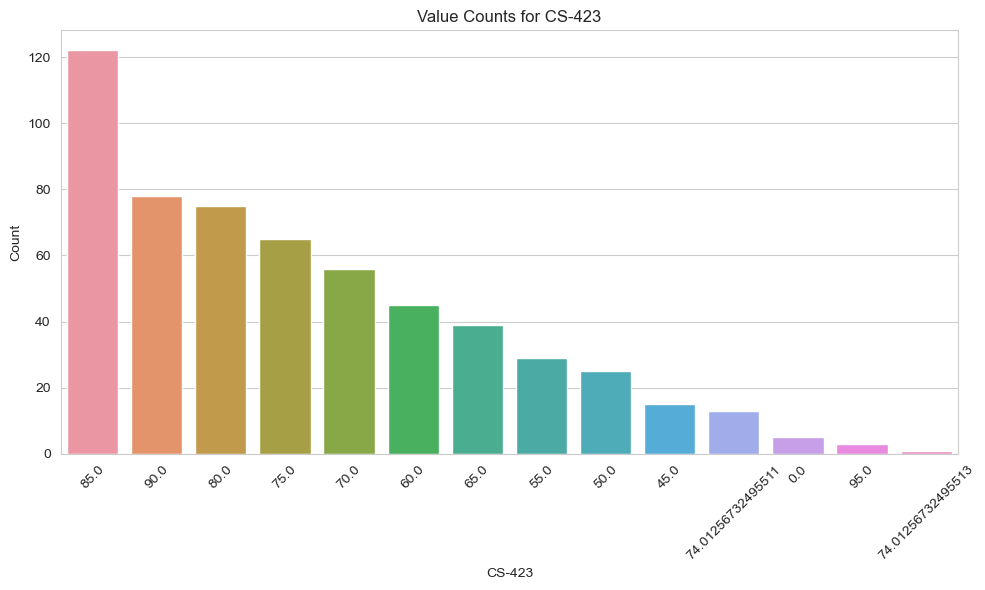

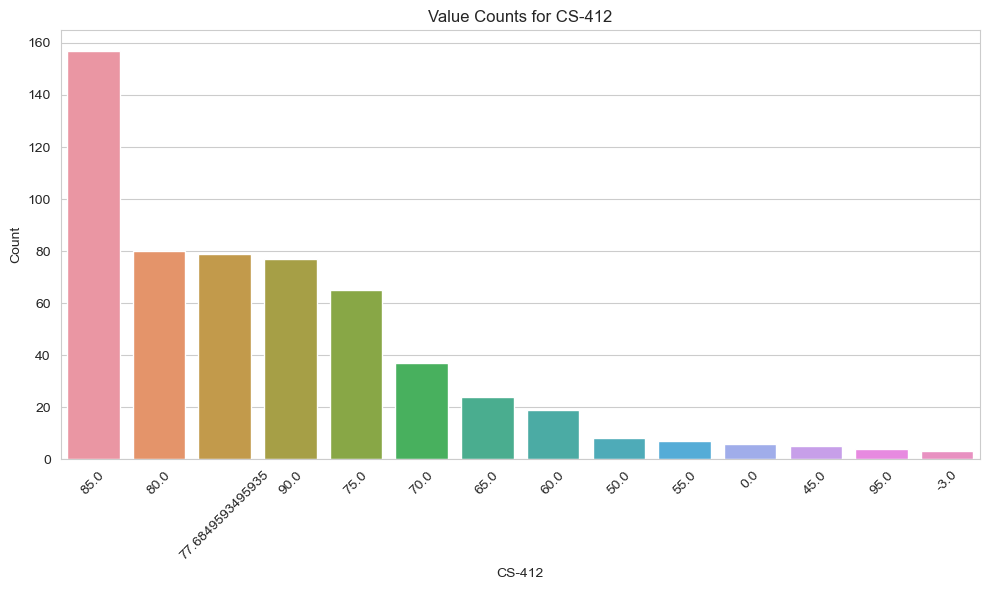

In [49]:
columns = df.columns[df.columns != 'CGPA']


for column in columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Value Counts for {column}')
    plt.xticks(rotation=45)  
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.tight_layout() 
    plt.show() 

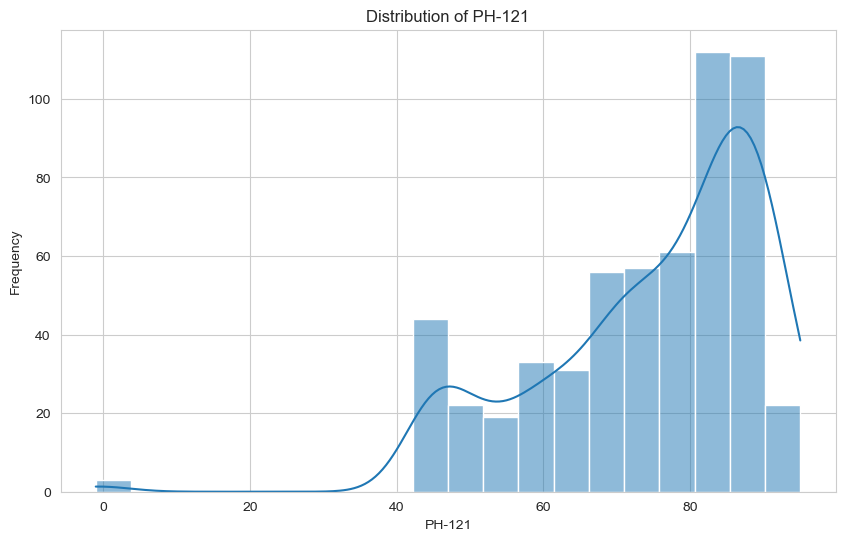

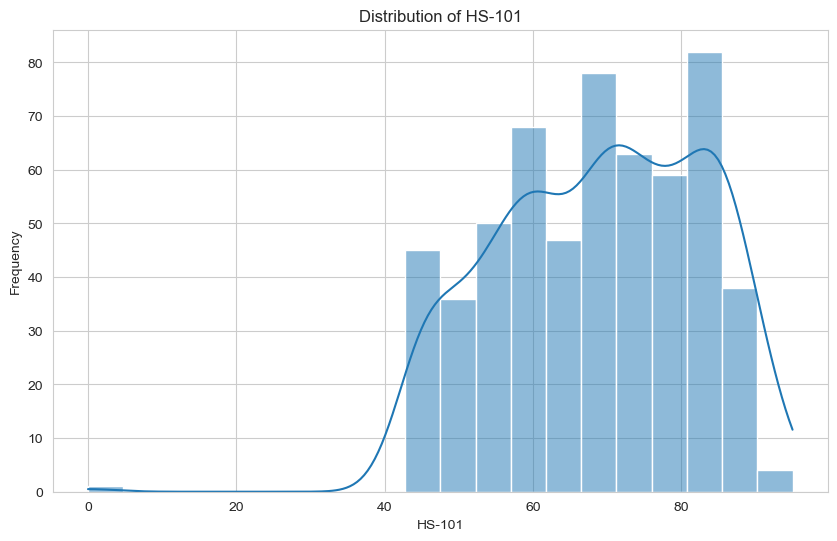

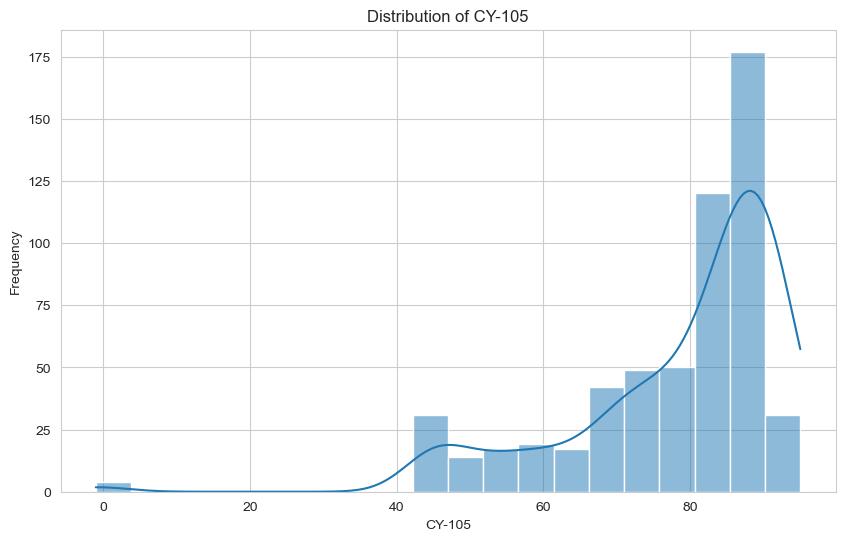

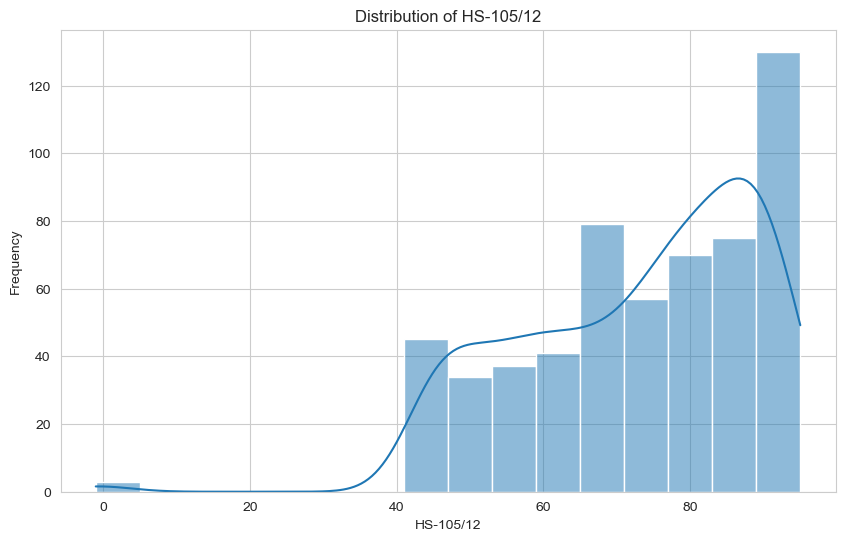

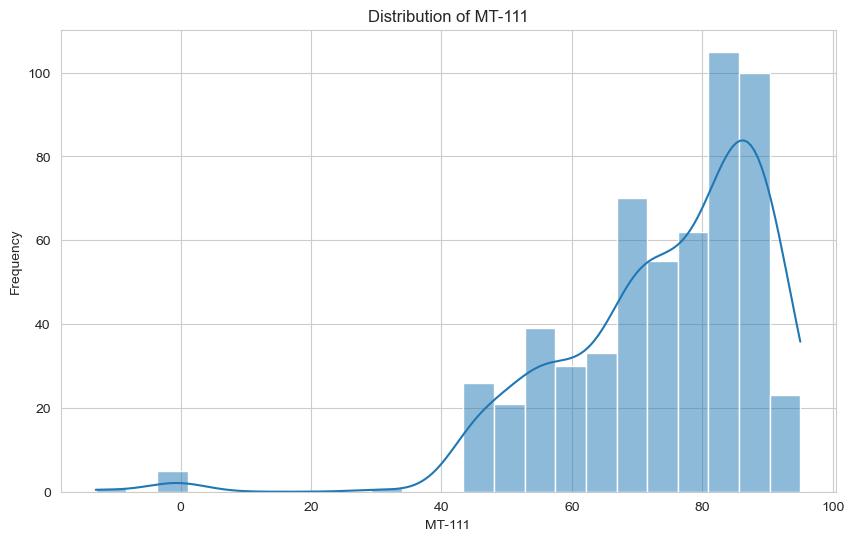

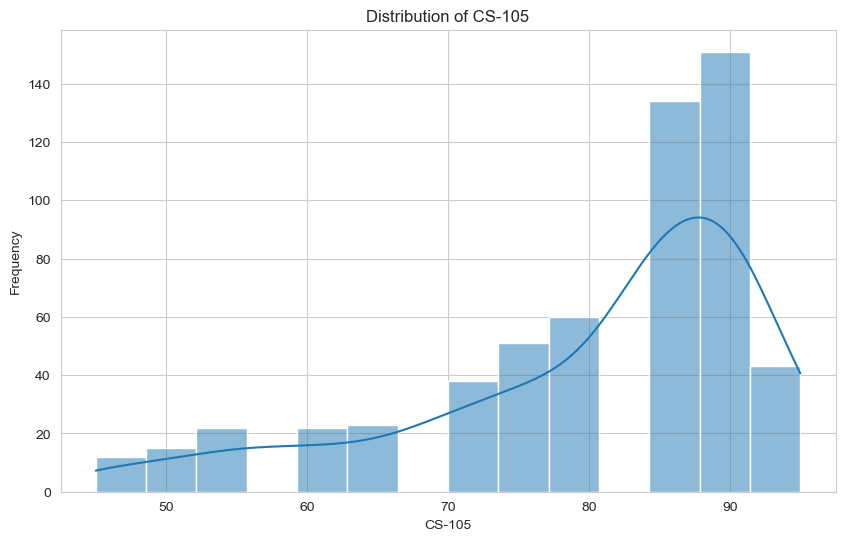

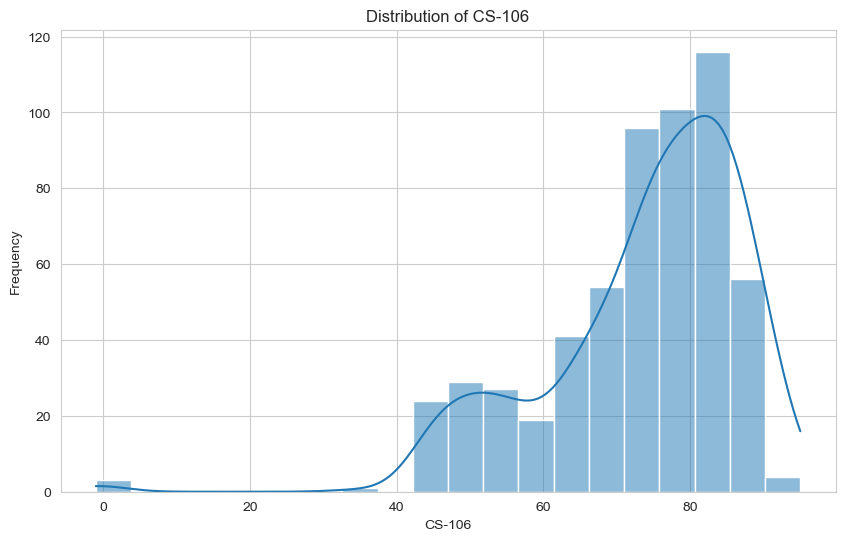

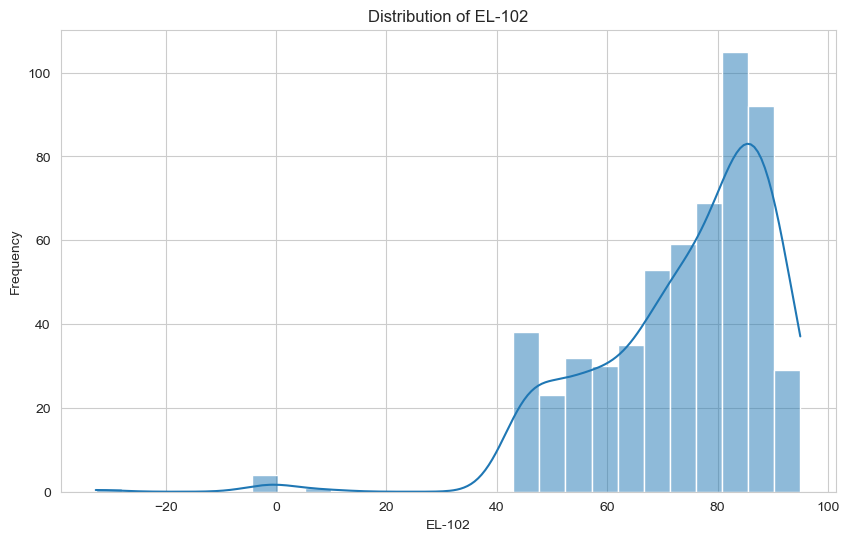

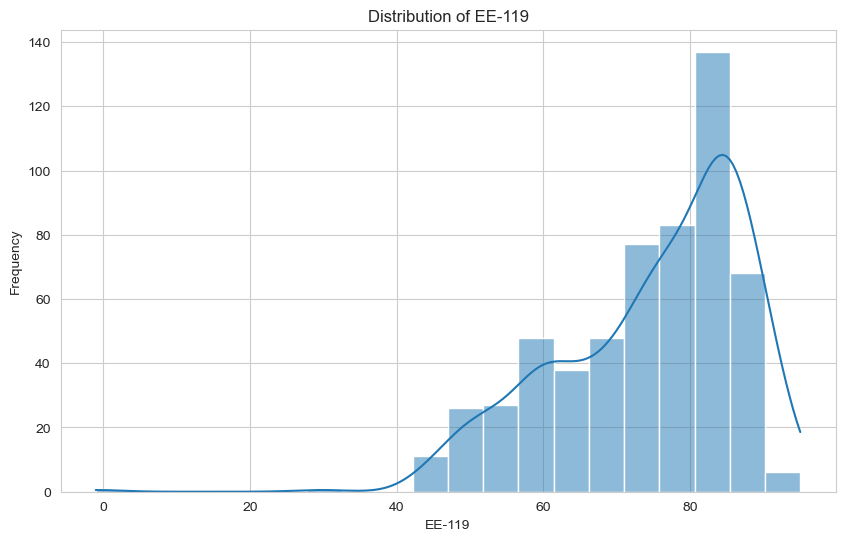

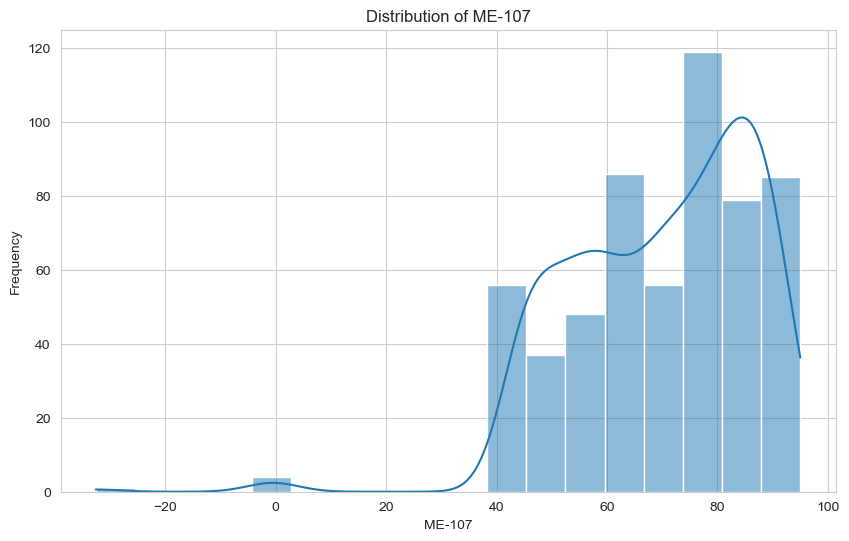

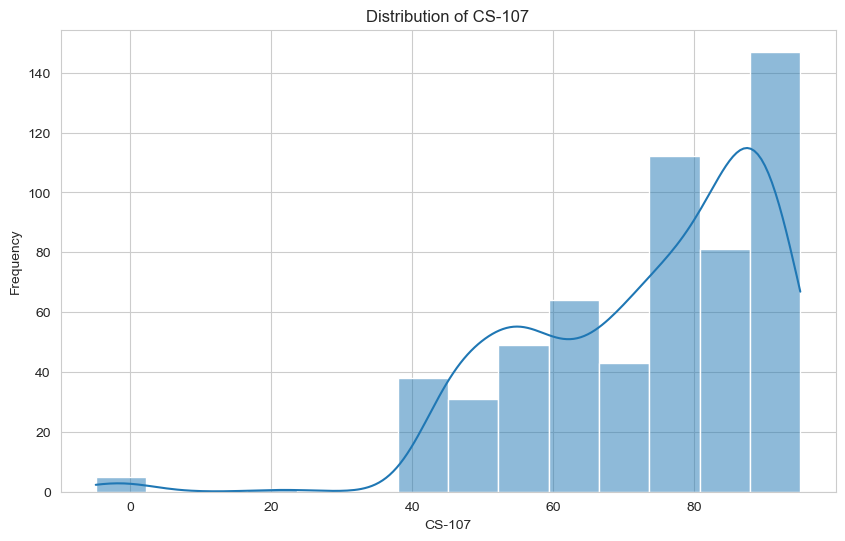

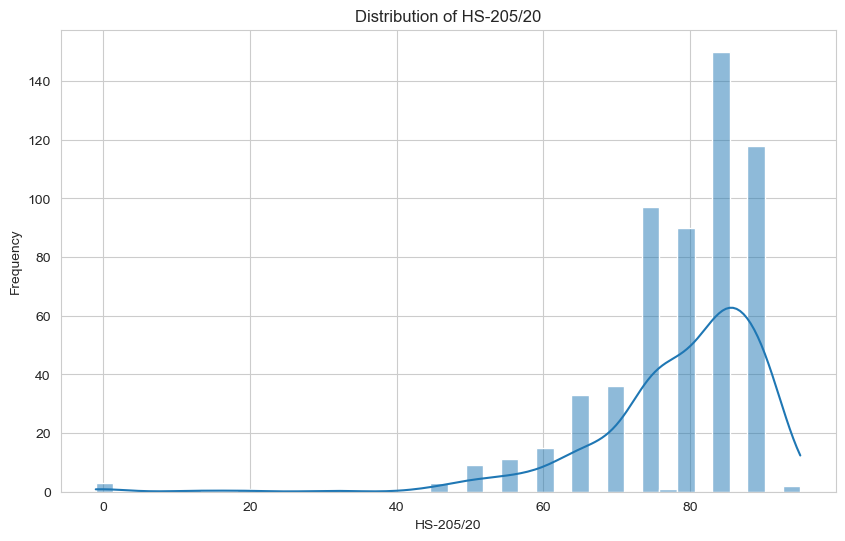

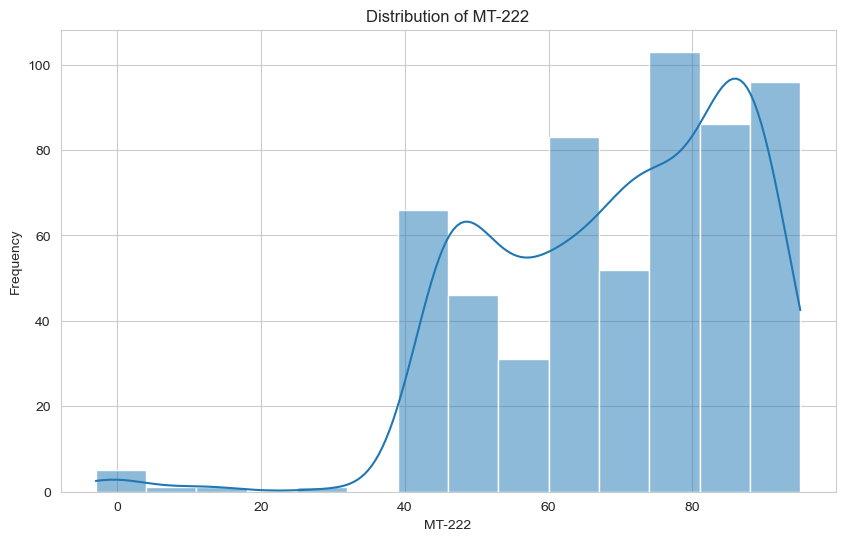

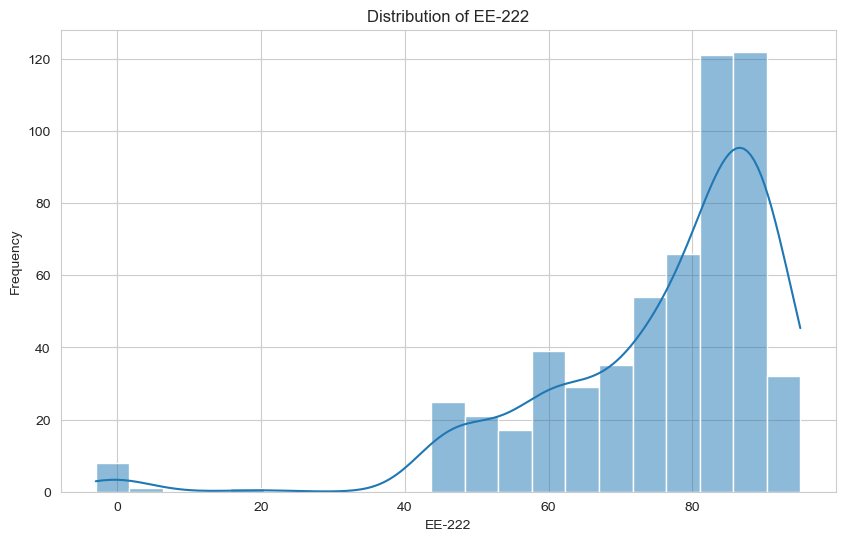

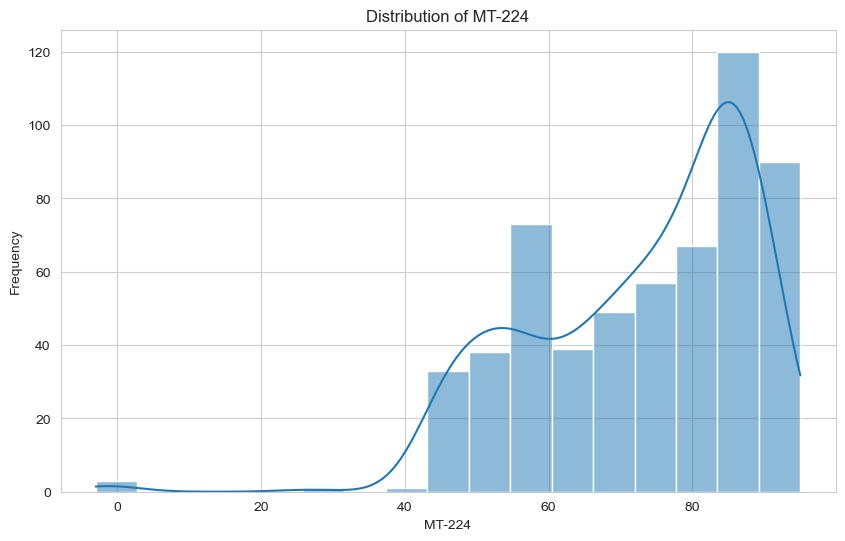

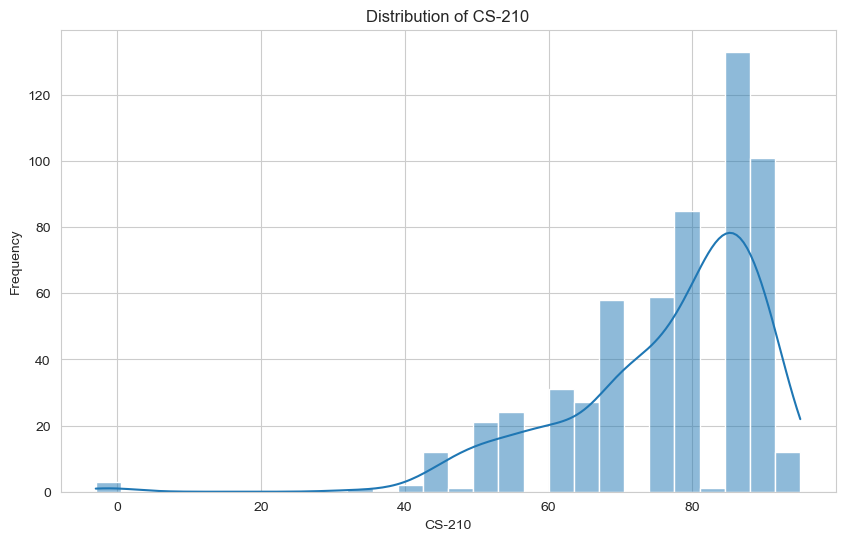

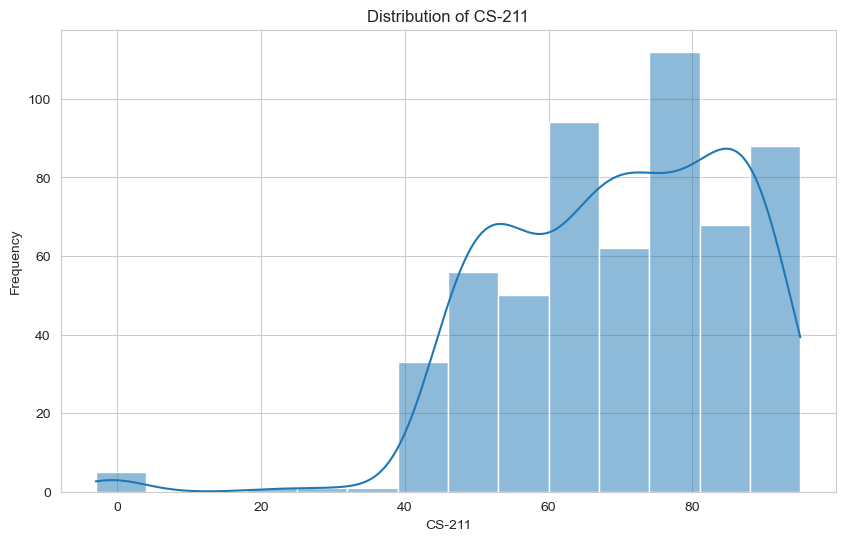

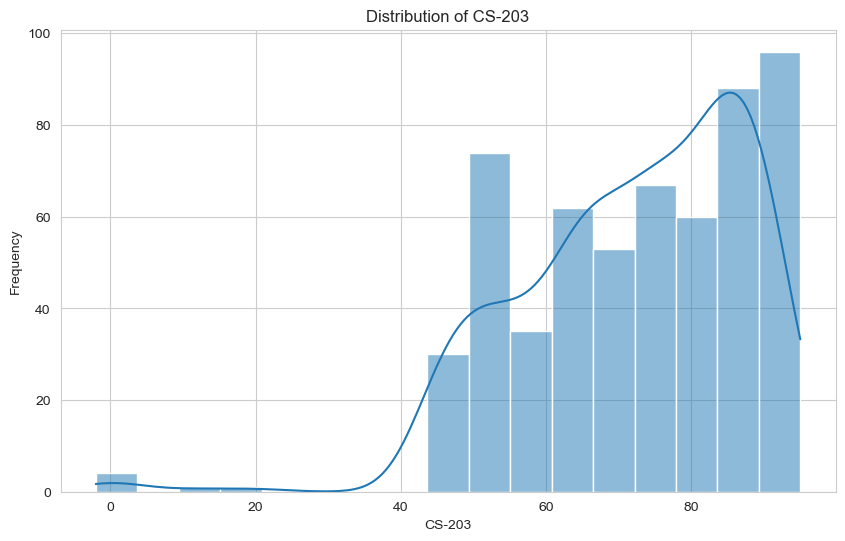

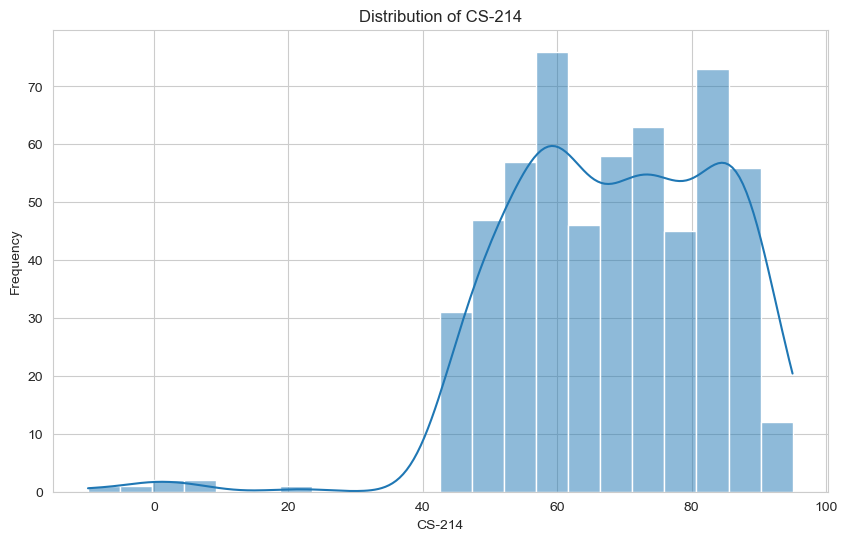

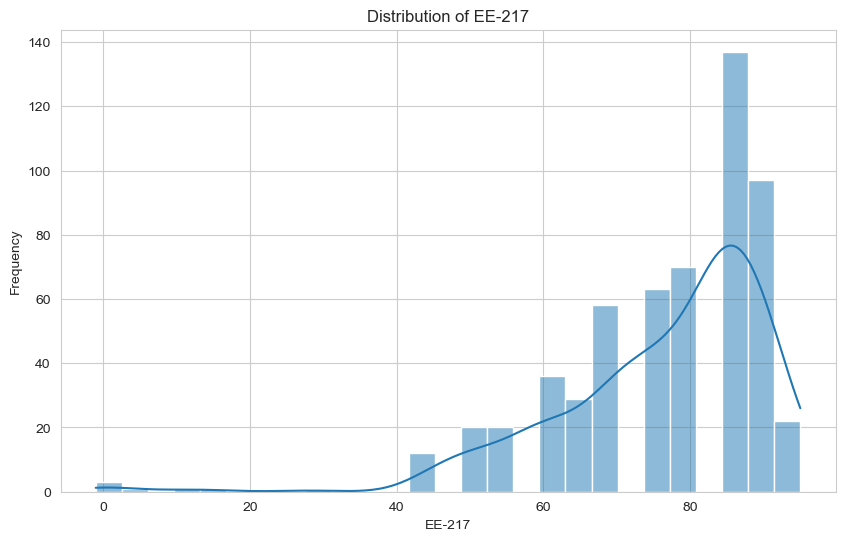

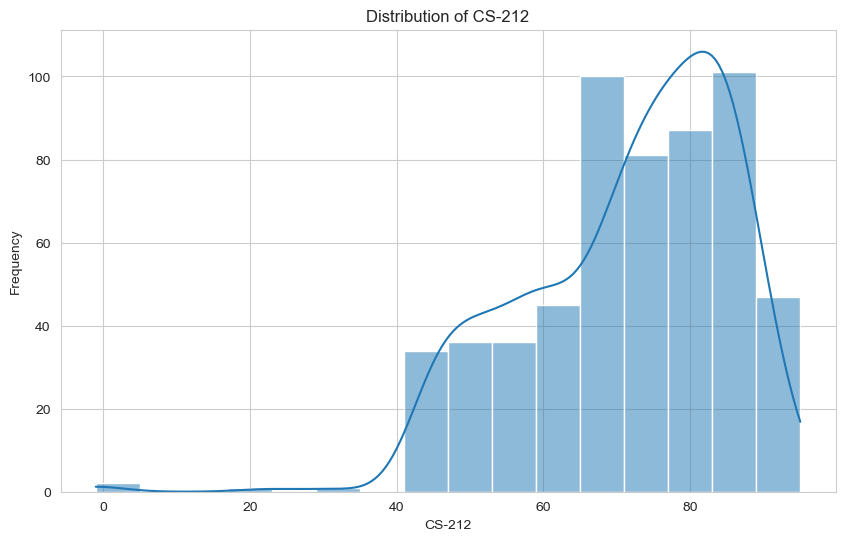

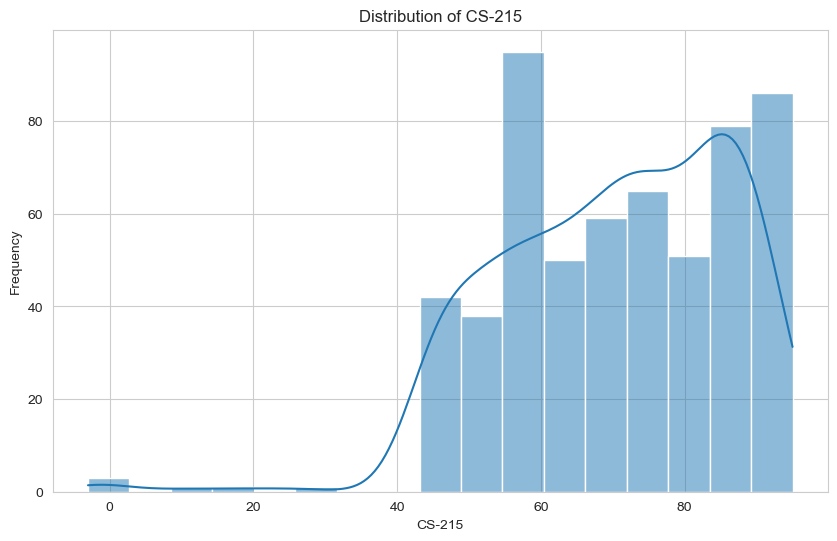

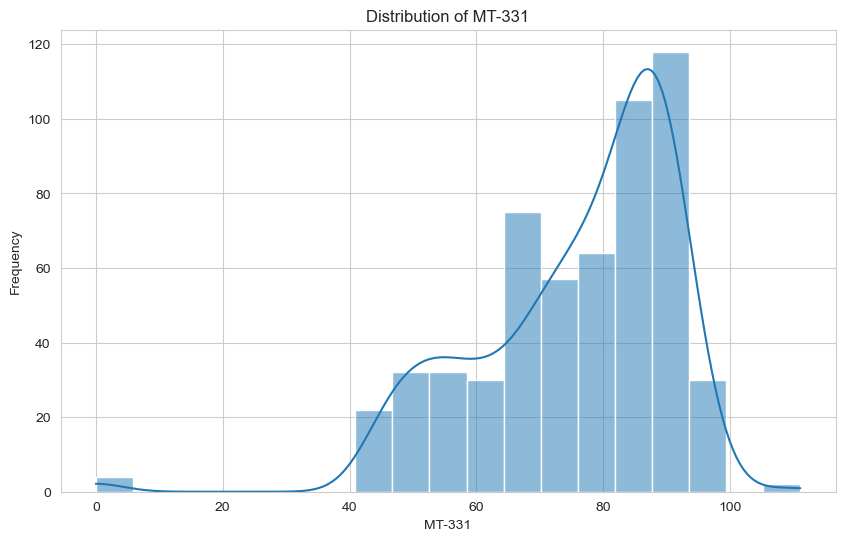

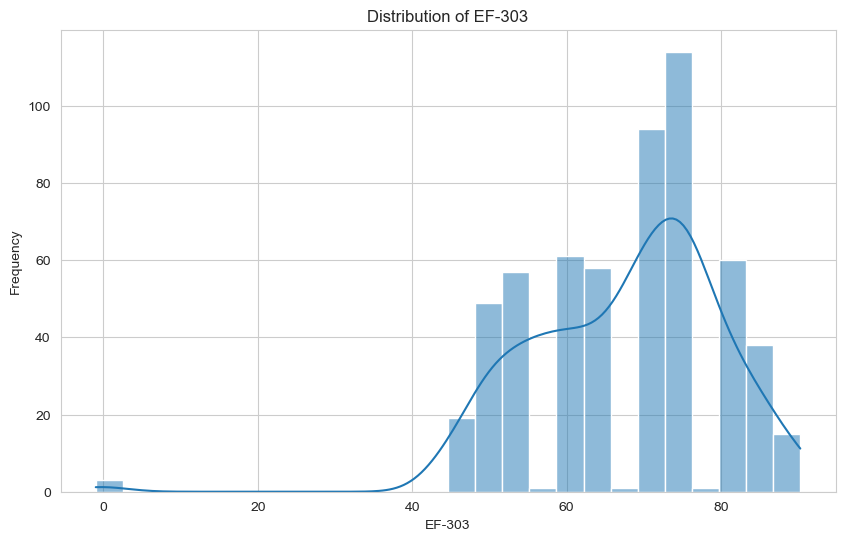

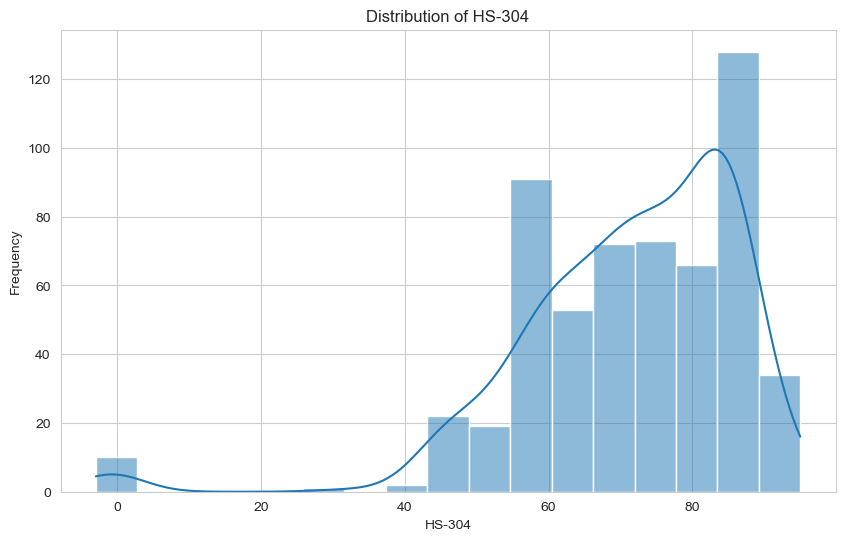

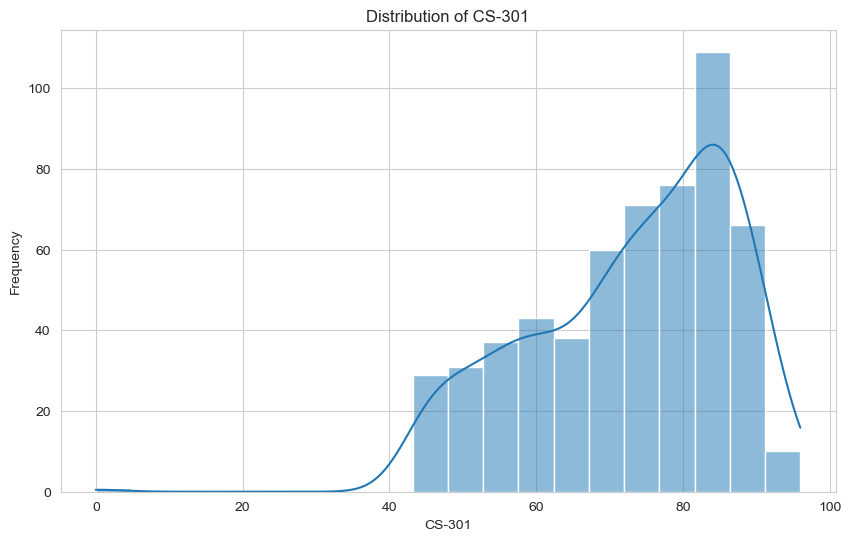

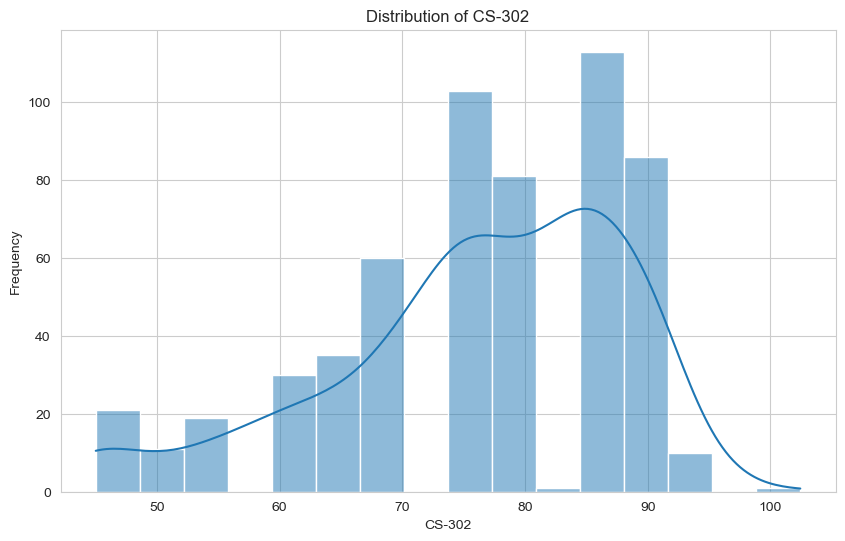

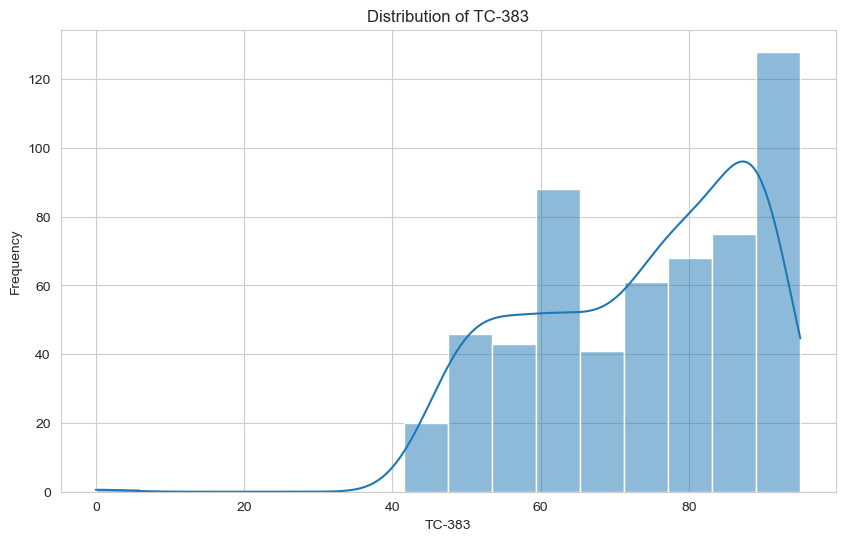

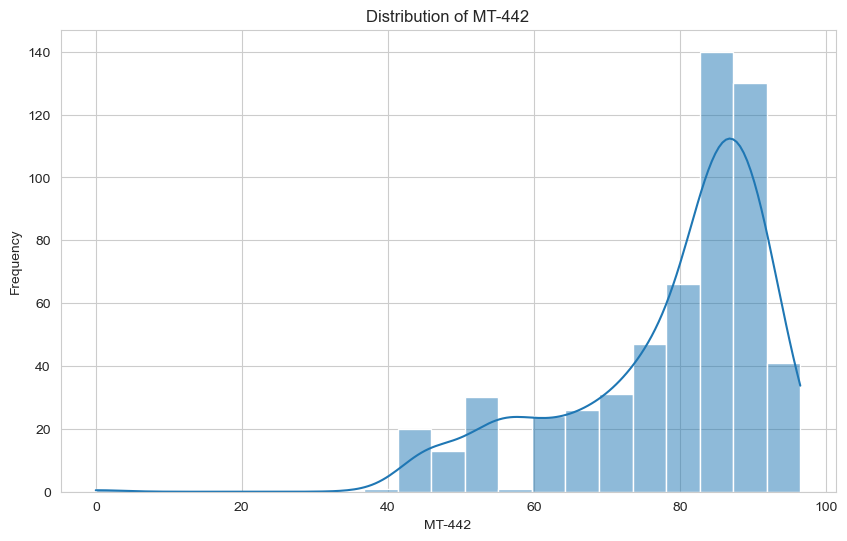

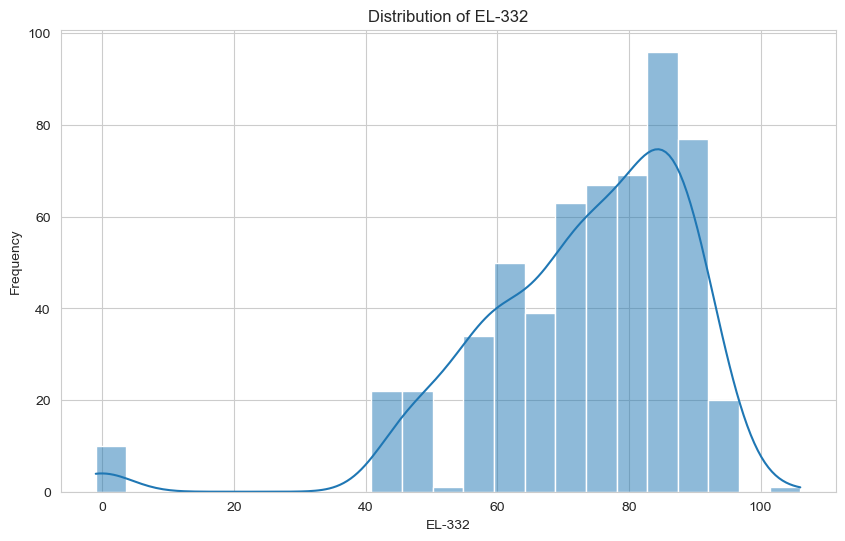

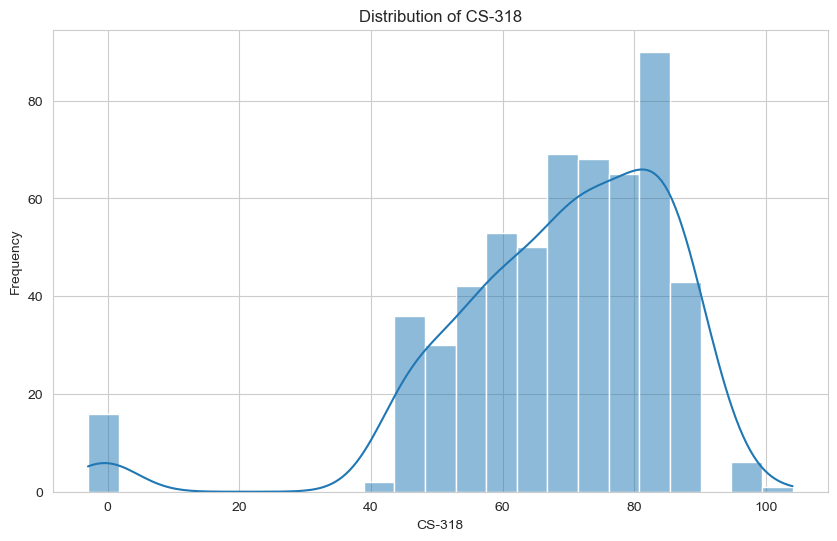

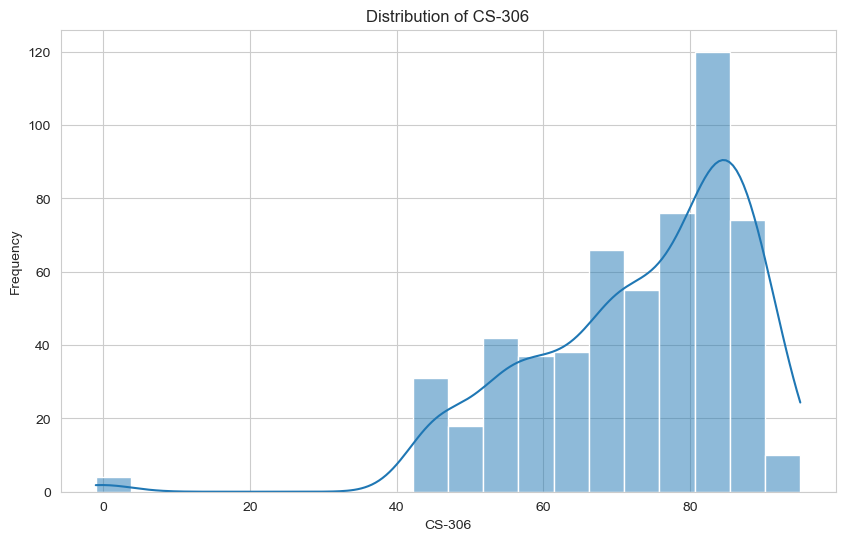

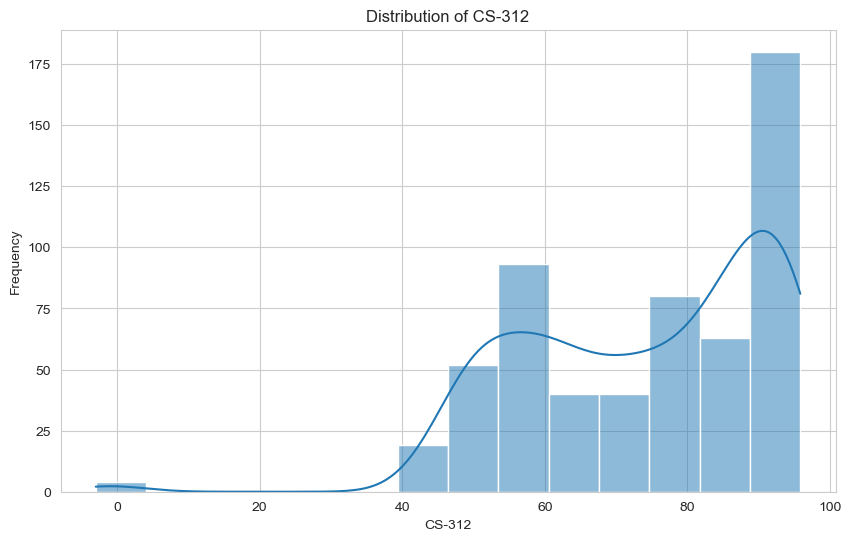

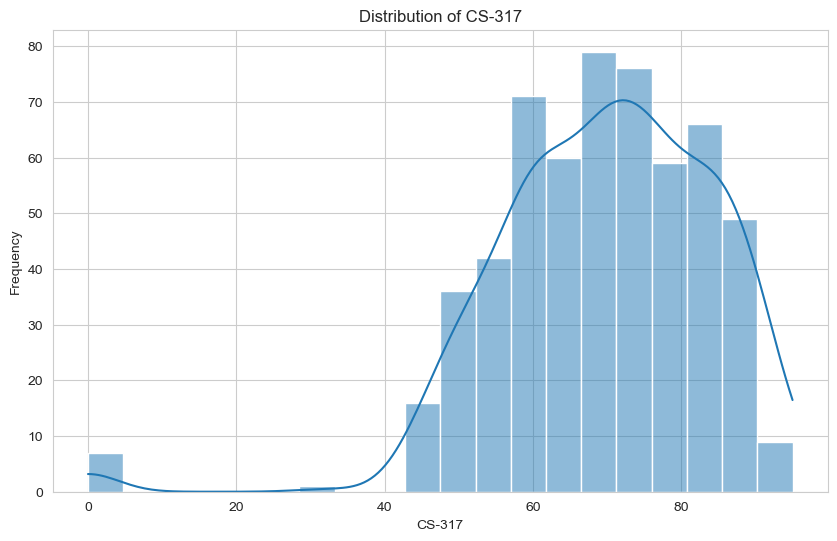

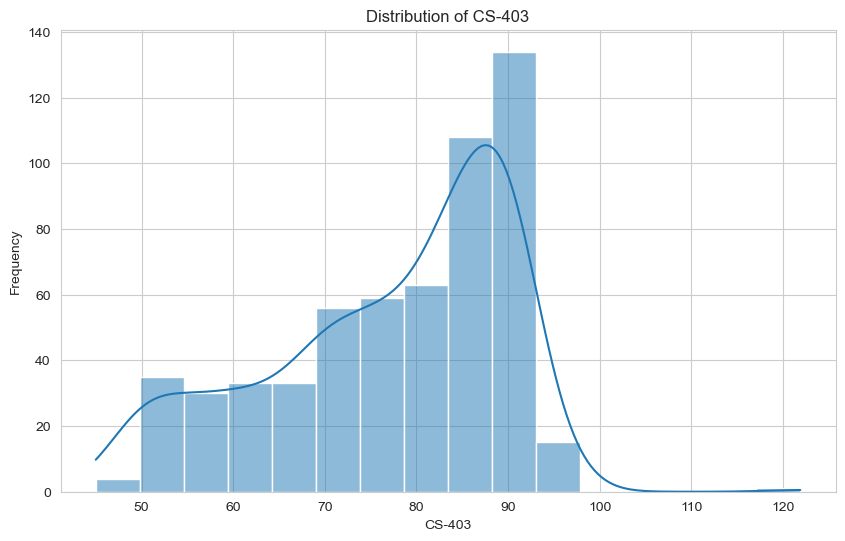

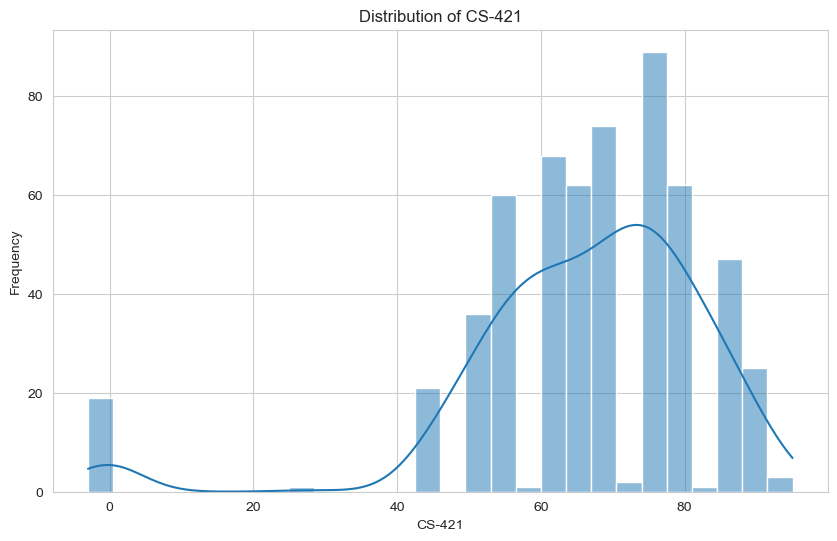

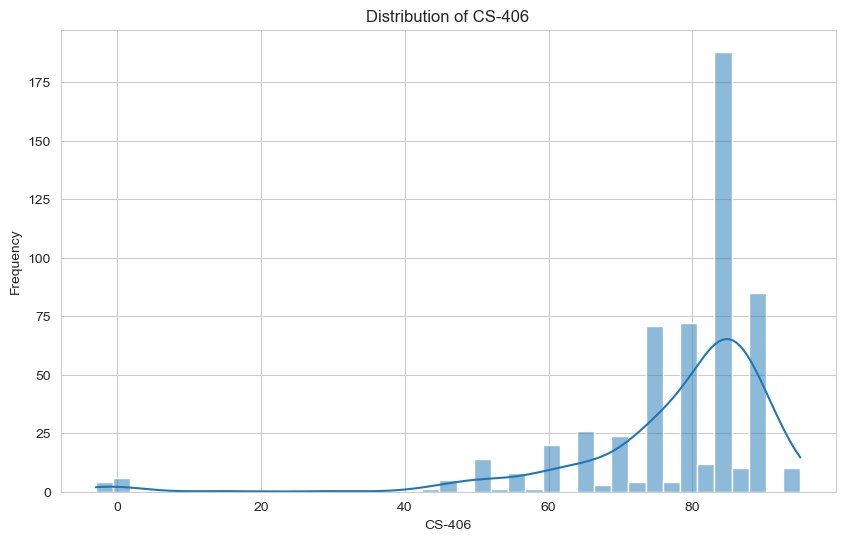

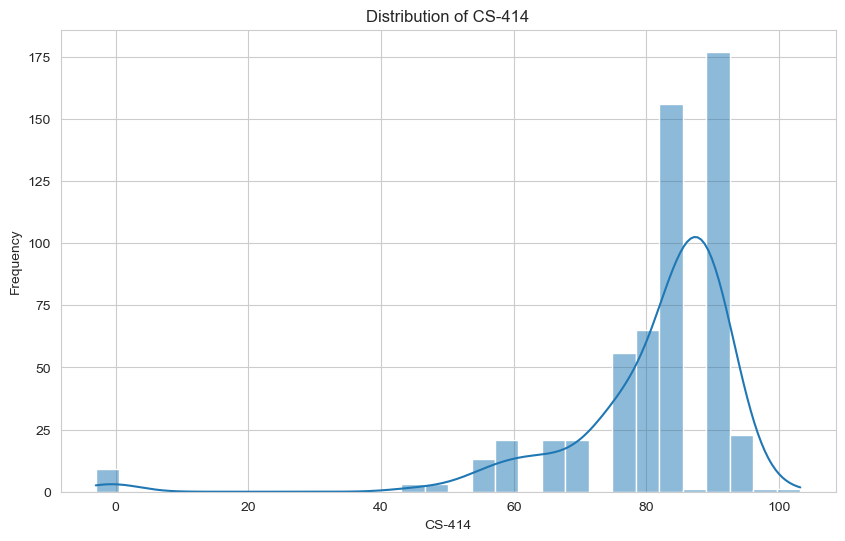

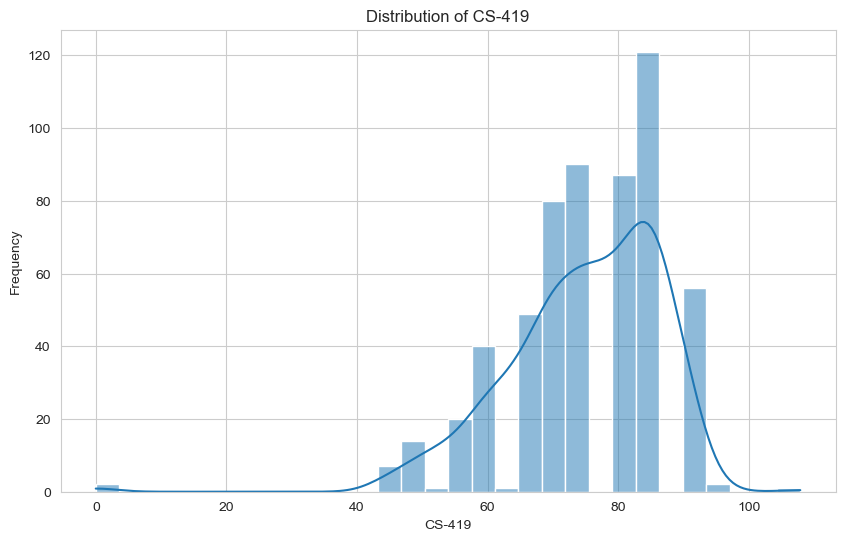

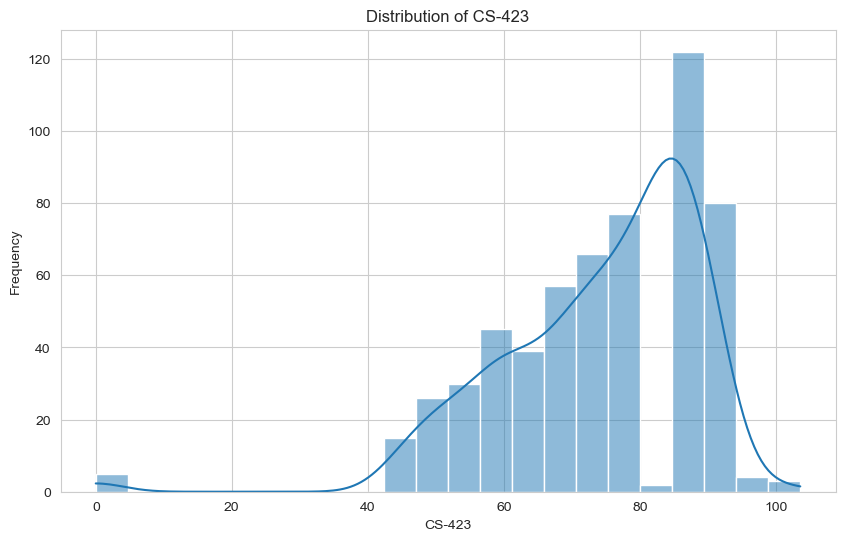

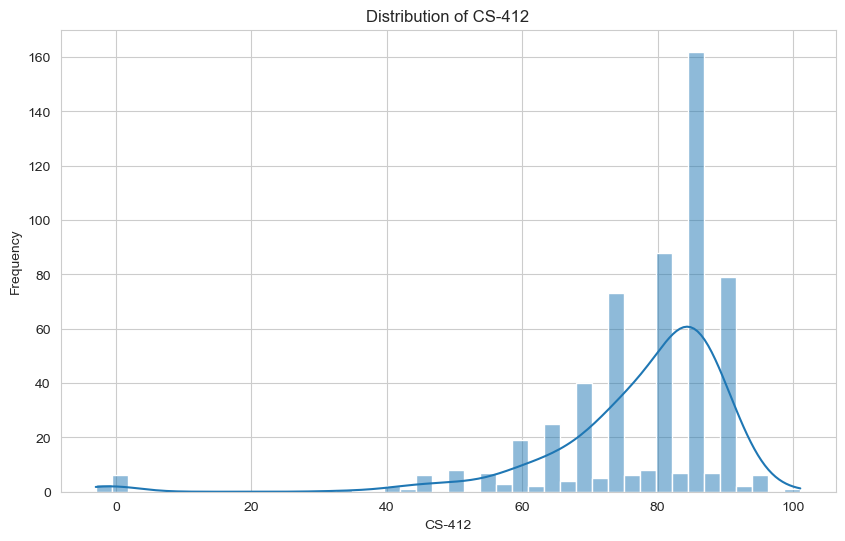

In [51]:
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

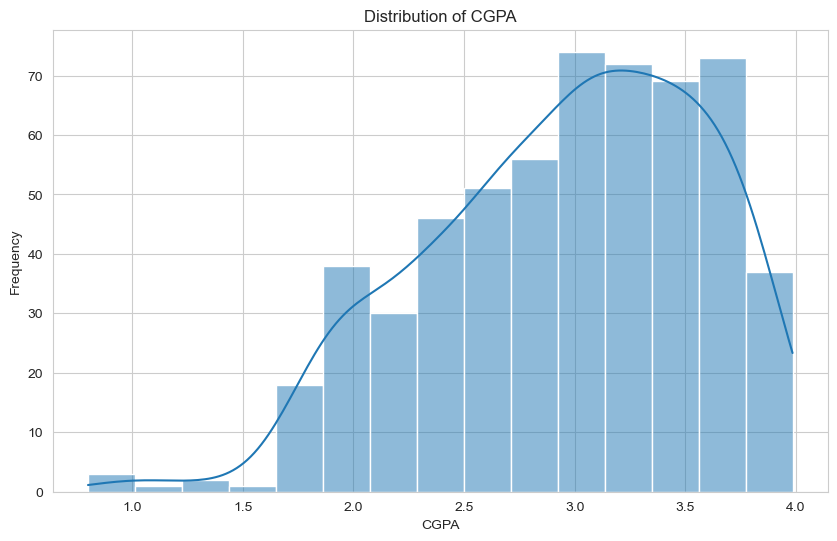

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()


CGPA         1.000000
CS-210       0.822758
CS-215       0.805148
CS-214       0.791551
CS-317       0.777331
MT-111       0.767265
CS-302       0.761104
MT-224       0.756935
CS-301       0.754634
CS-306       0.747952
EL-332       0.747248
CS-212       0.736134
EE-217       0.730696
MT-222       0.722775
CS-211       0.712312
ME-107       0.711859
CS-203       0.708964
CS-419       0.708957
EE-119       0.691156
PH-121       0.686692
CY-105       0.677523
TC-383       0.667985
EL-102       0.666614
HS-105/12    0.665808
CS-107       0.663291
MT-442       0.652340
EE-222       0.649952
CS-105       0.644594
CS-421       0.629764
HS-304       0.624694
CS-403       0.603662
CS-318       0.589971
CS-106       0.582959
HS-101       0.568438
MT-331       0.567678
HS-205/20    0.533352
EF-303       0.529633
CS-312       0.522182
CS-423       0.516116
CS-412       0.497292
CS-406       0.496861
CS-414       0.400851
Name: CGPA, dtype: float64


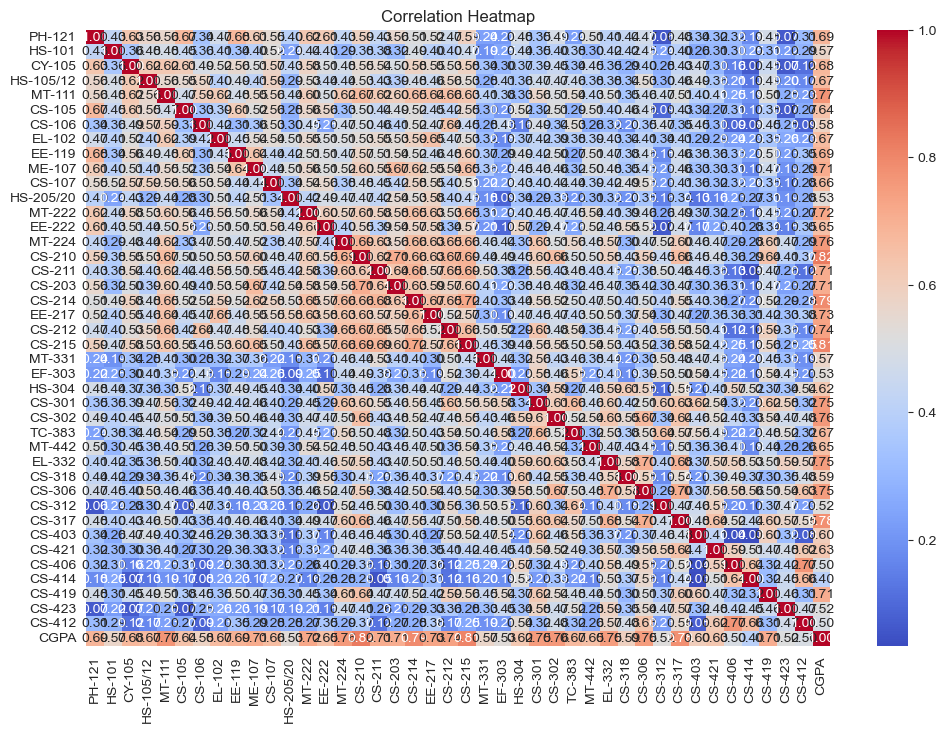

In [54]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix['CGPA'].sort_values(ascending=False))

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


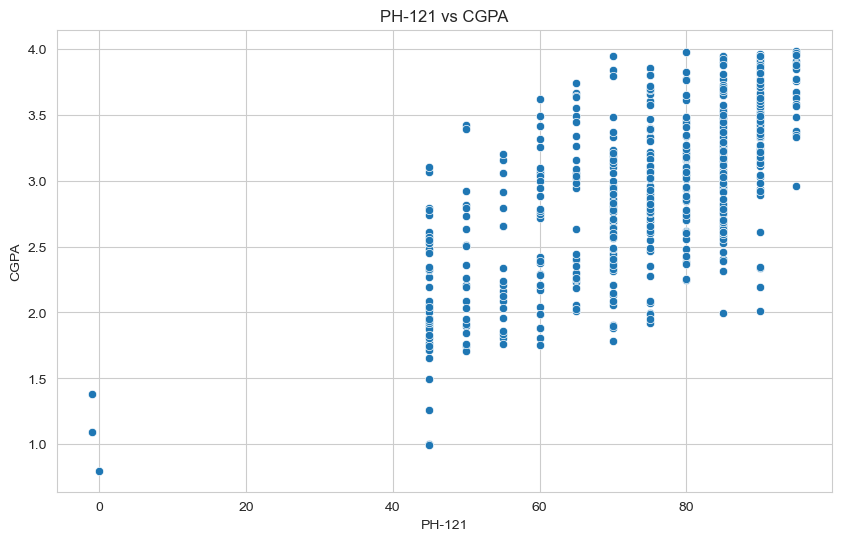

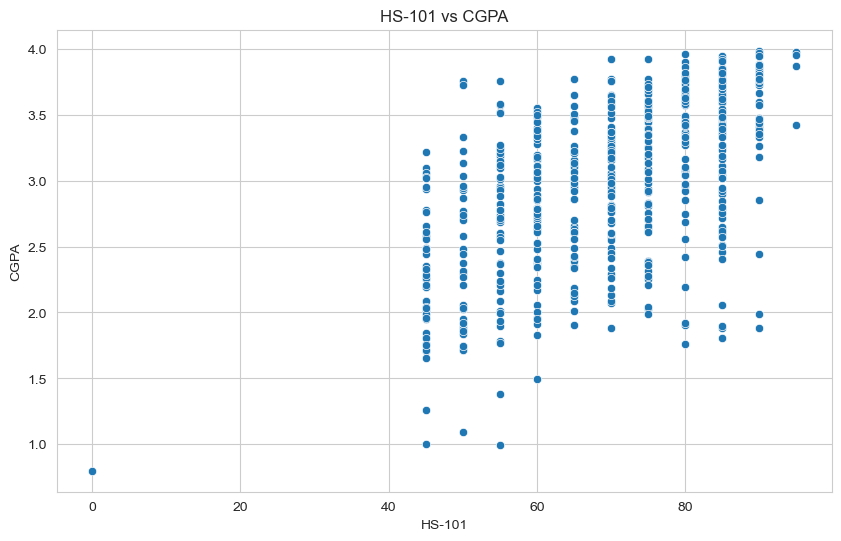

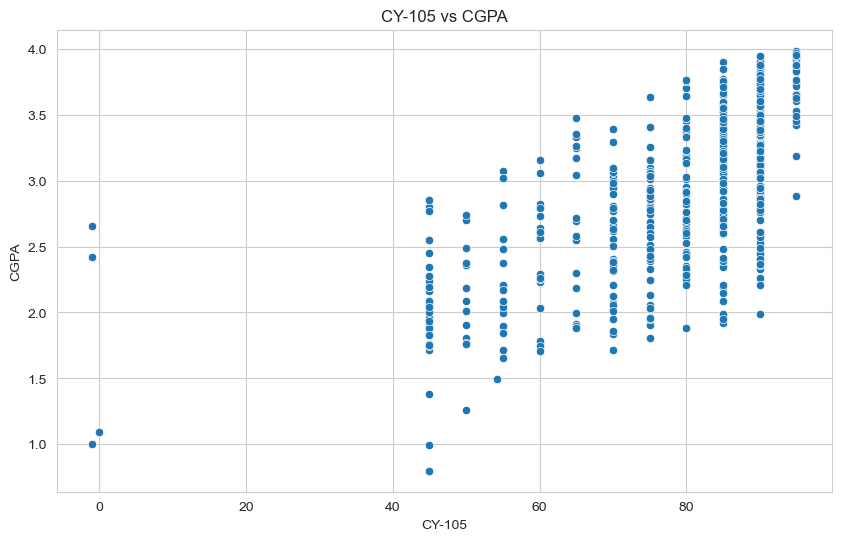

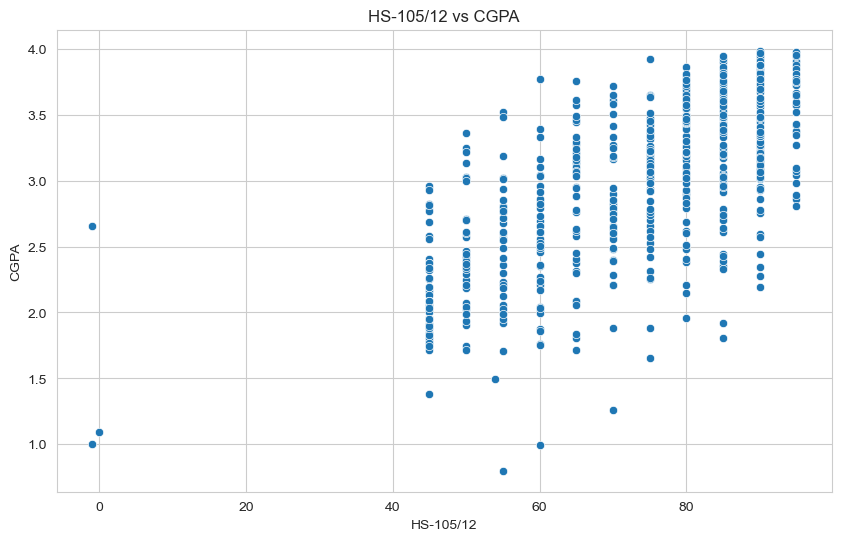

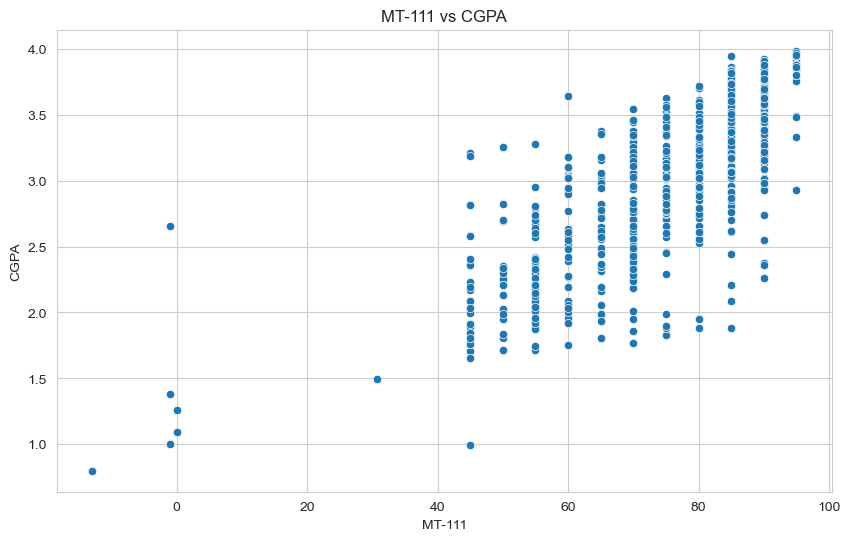

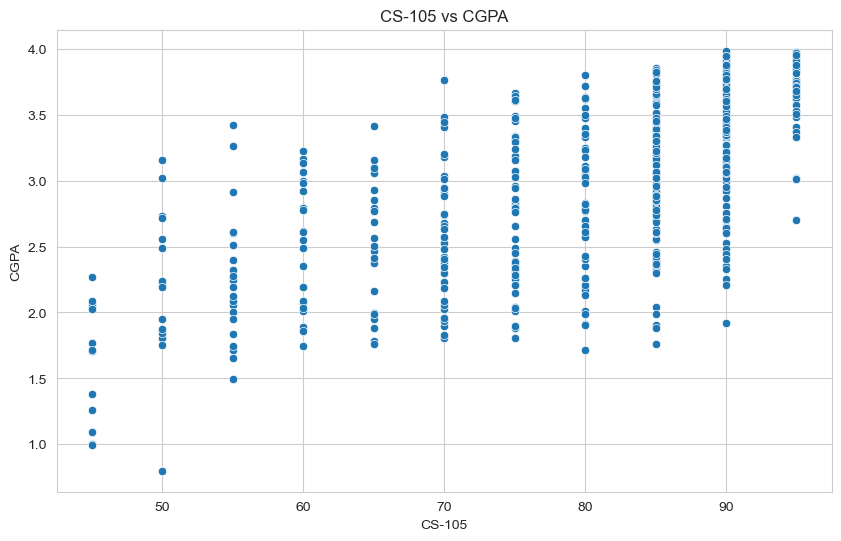

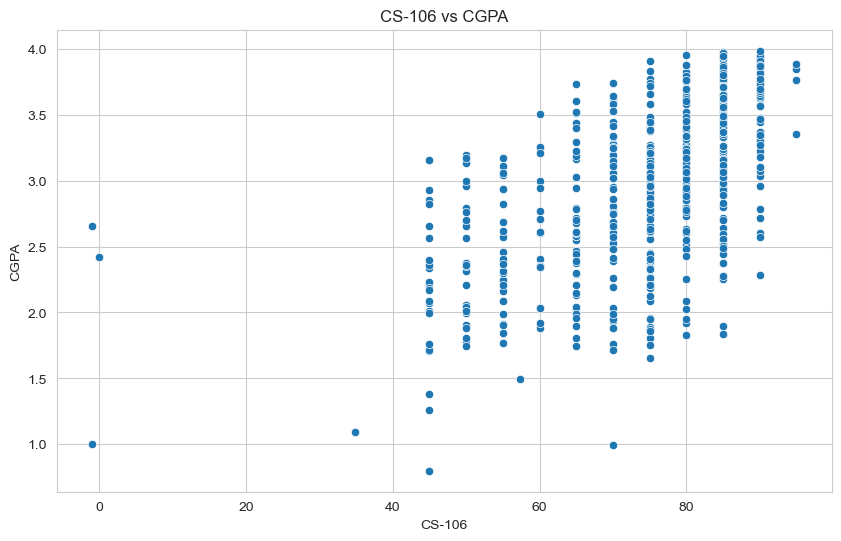

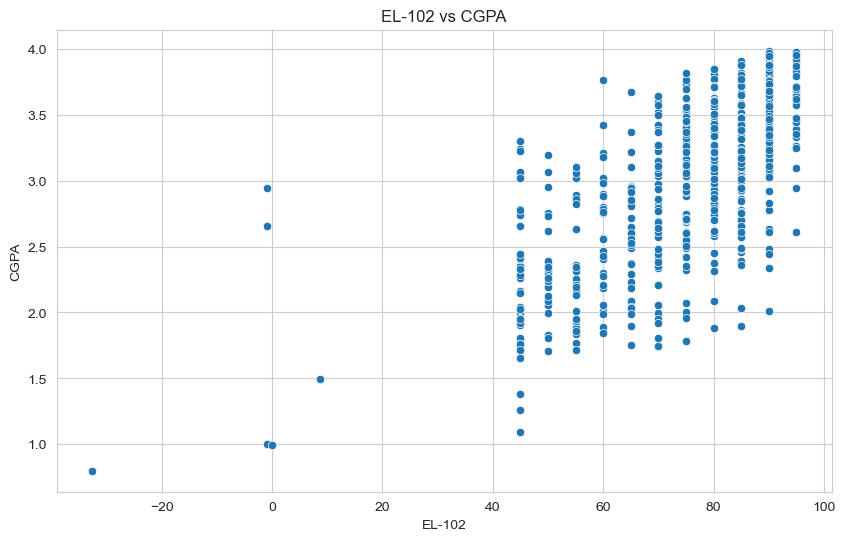

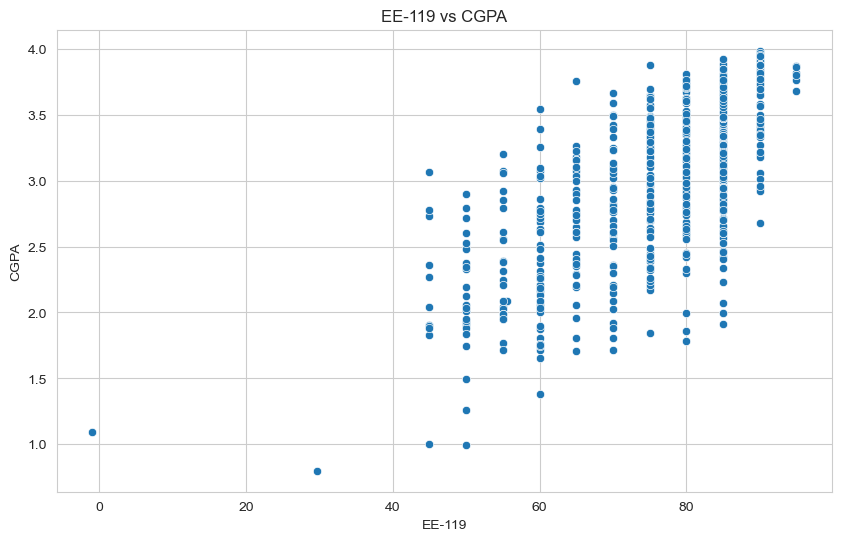

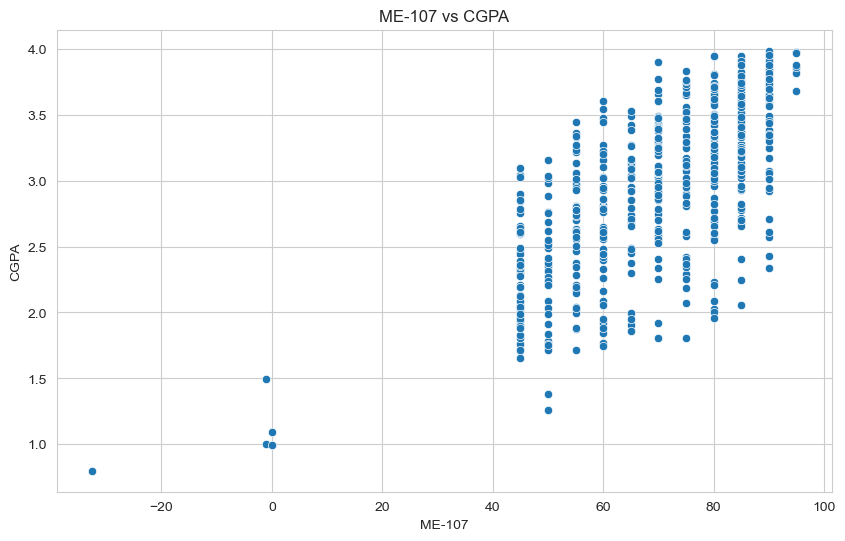

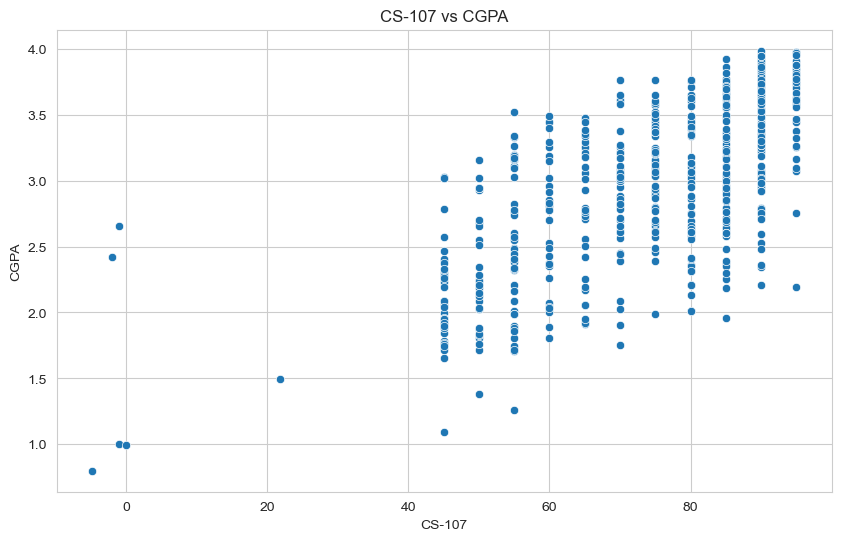

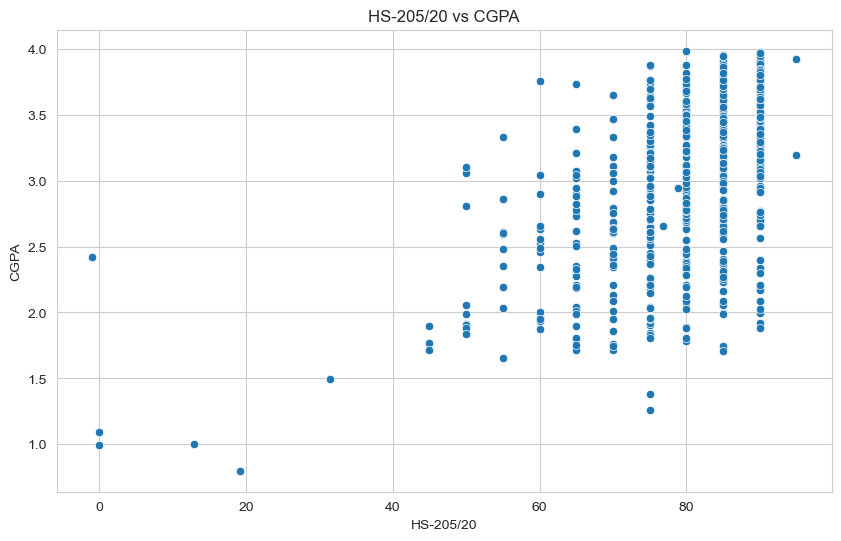

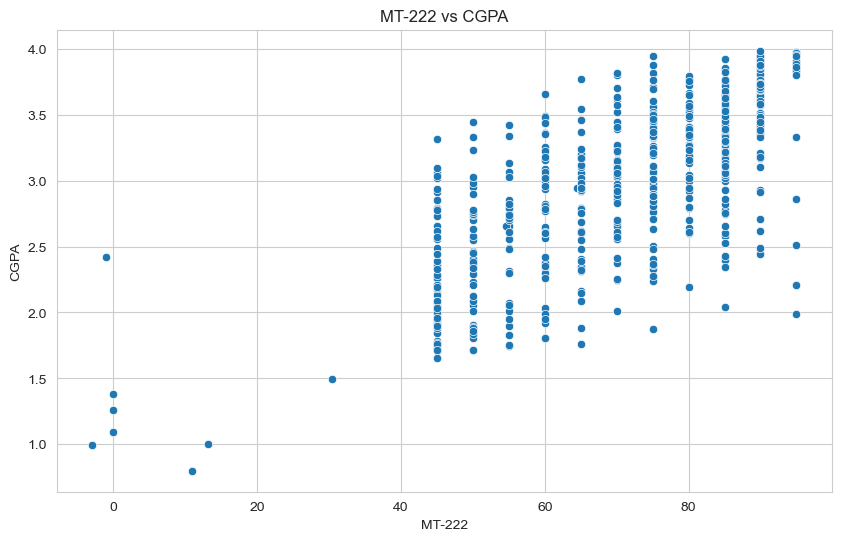

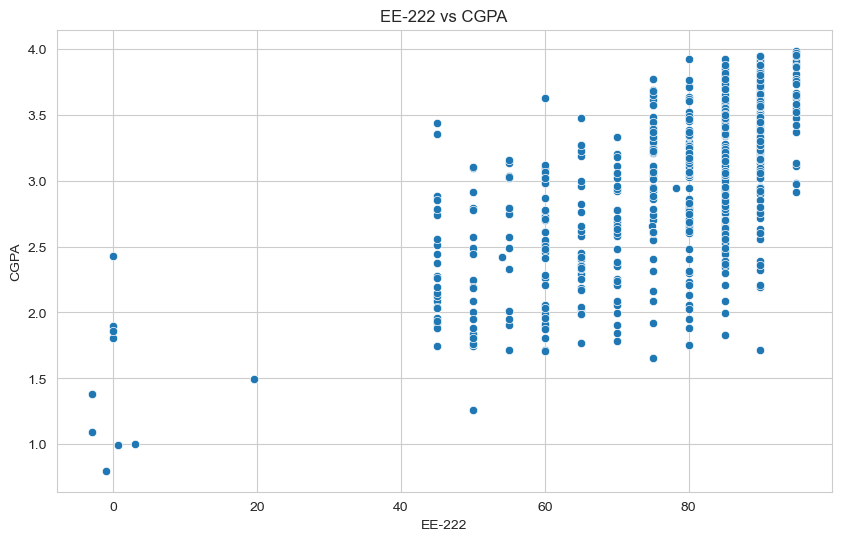

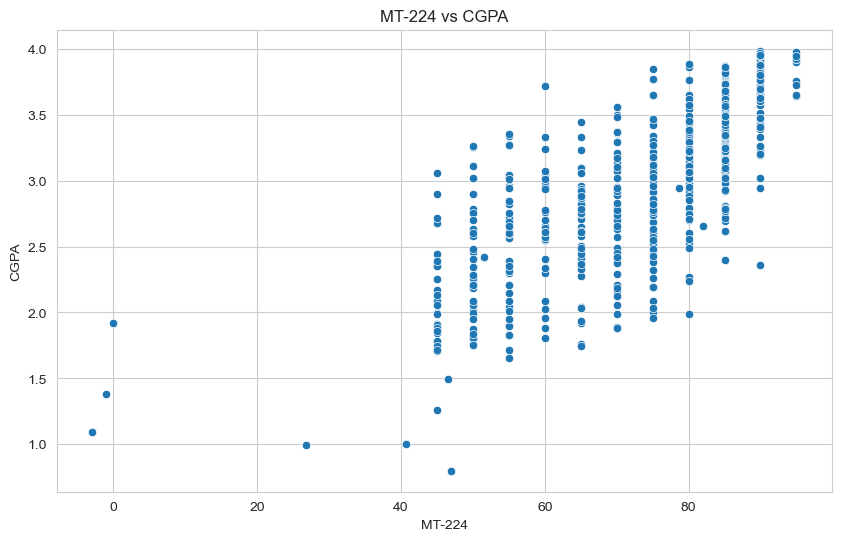

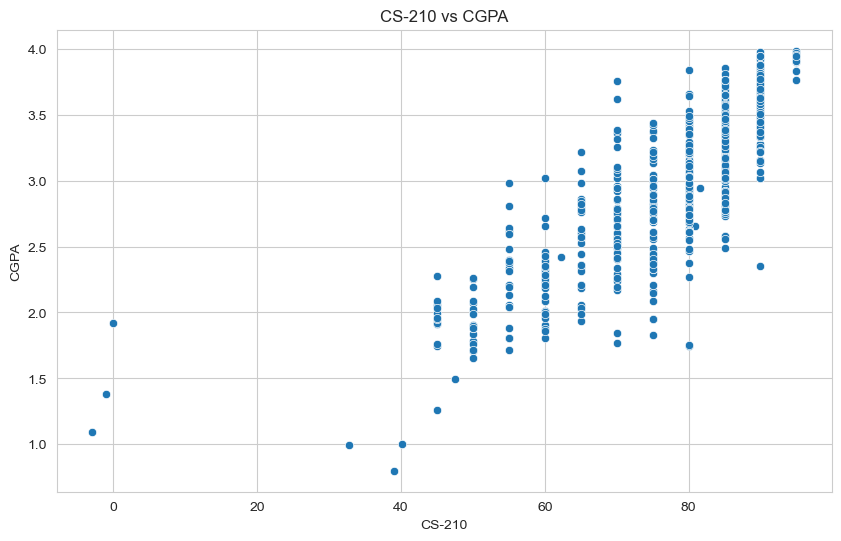

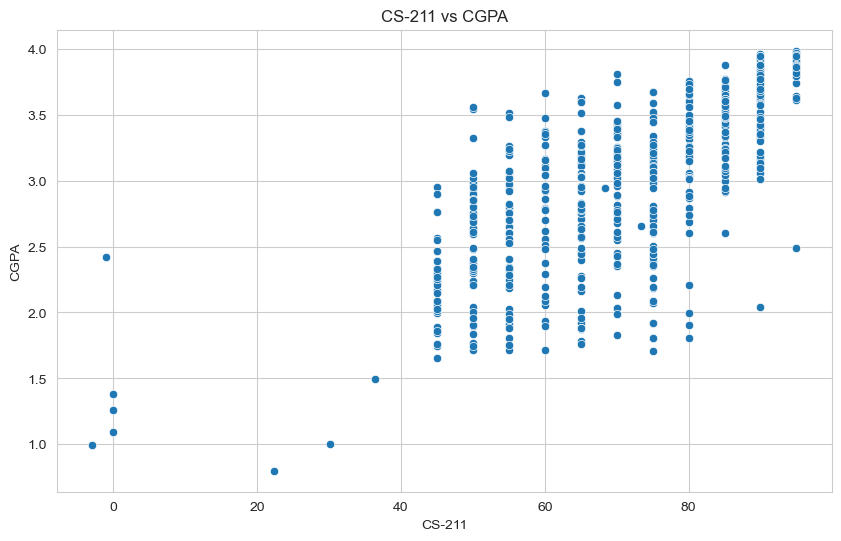

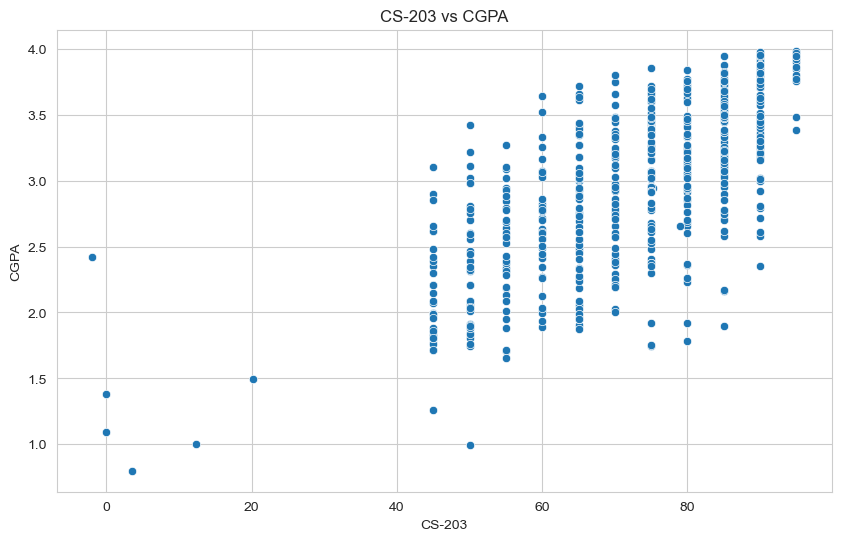

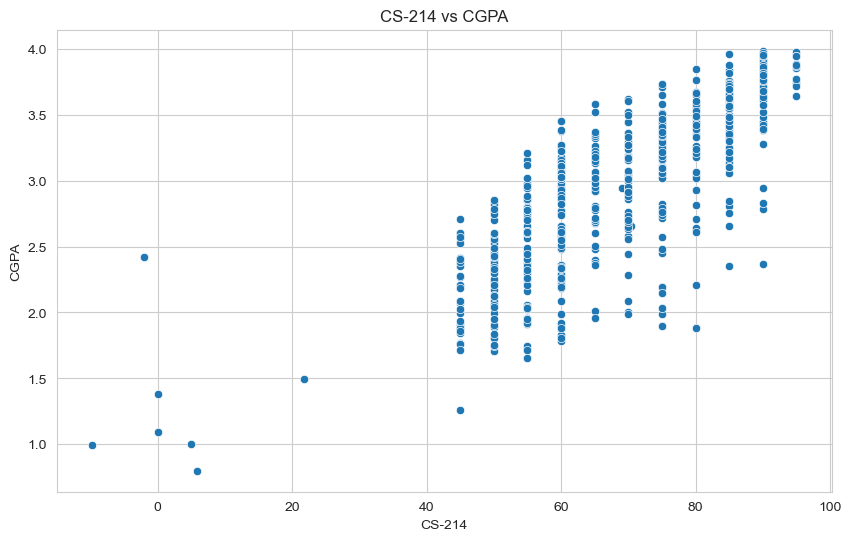

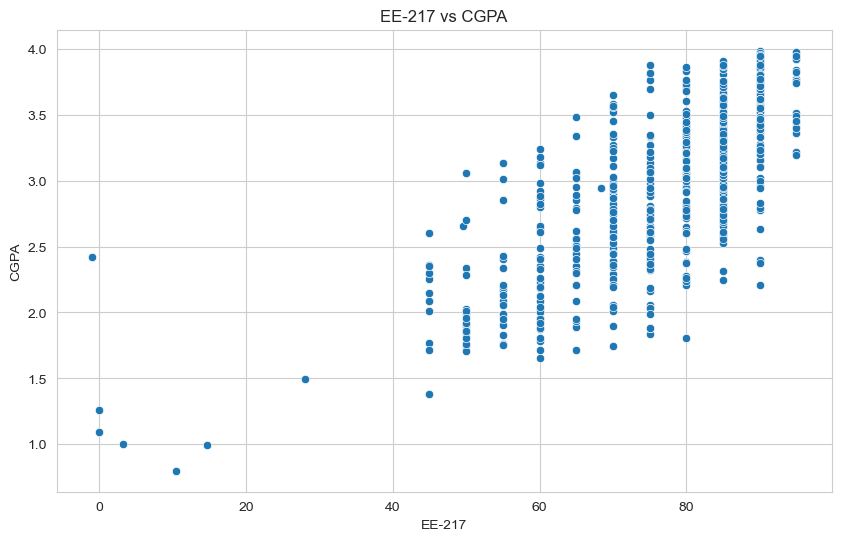

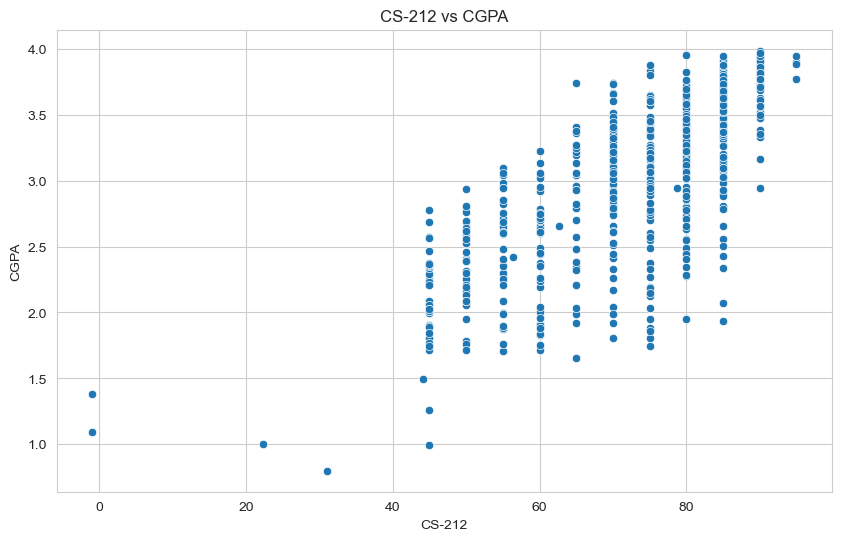

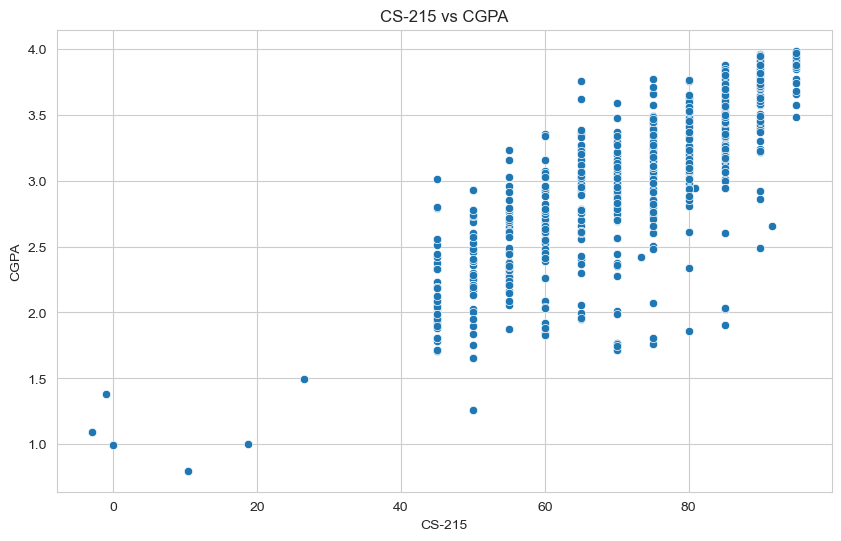

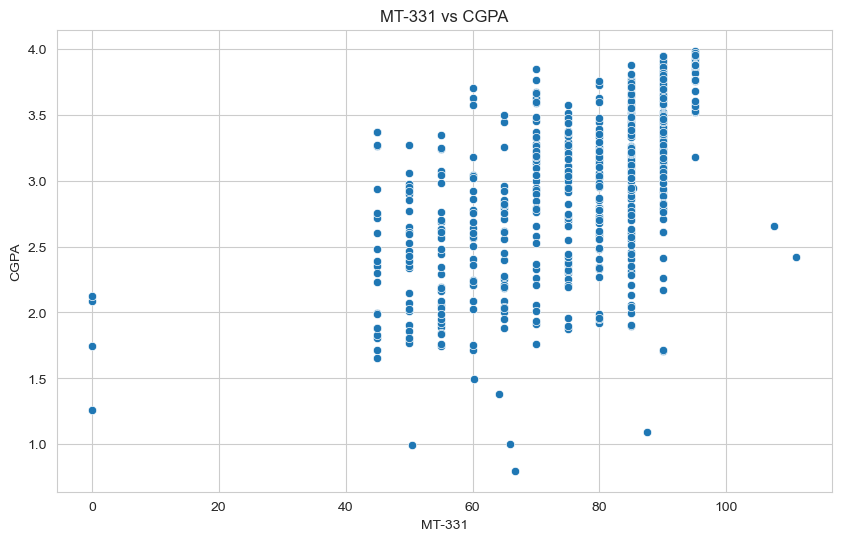

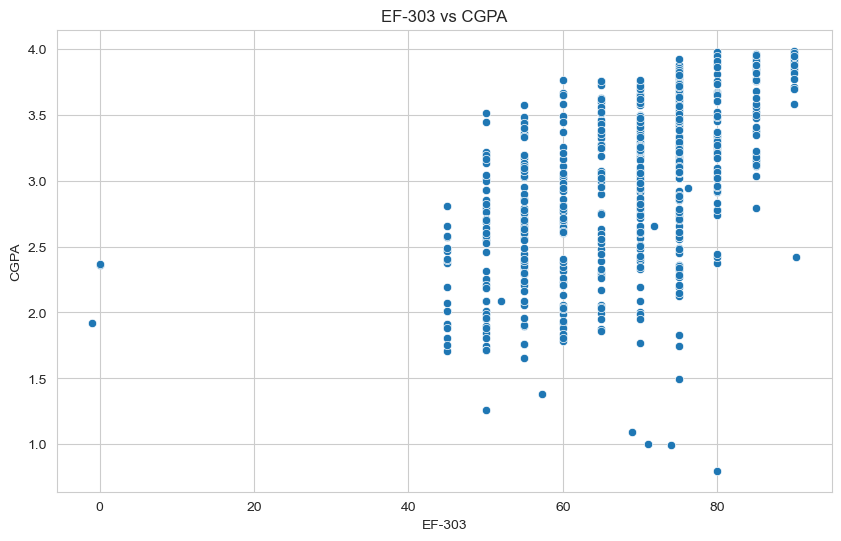

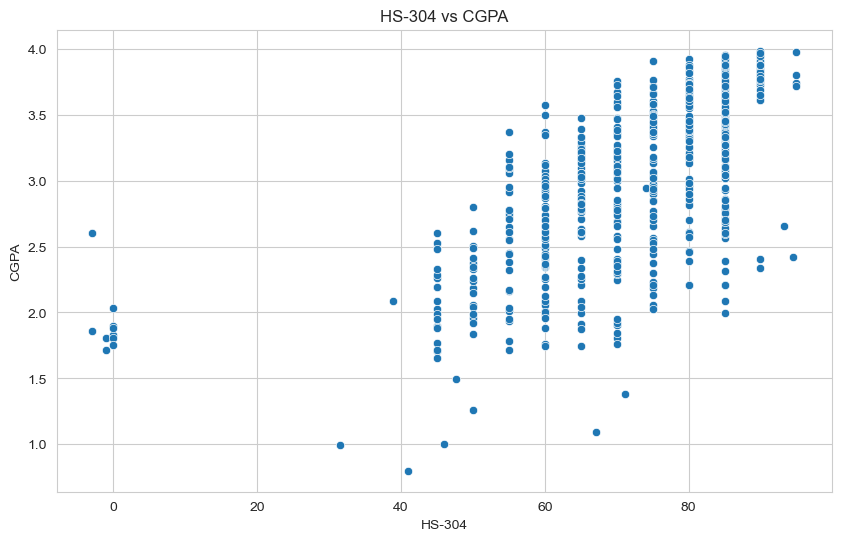

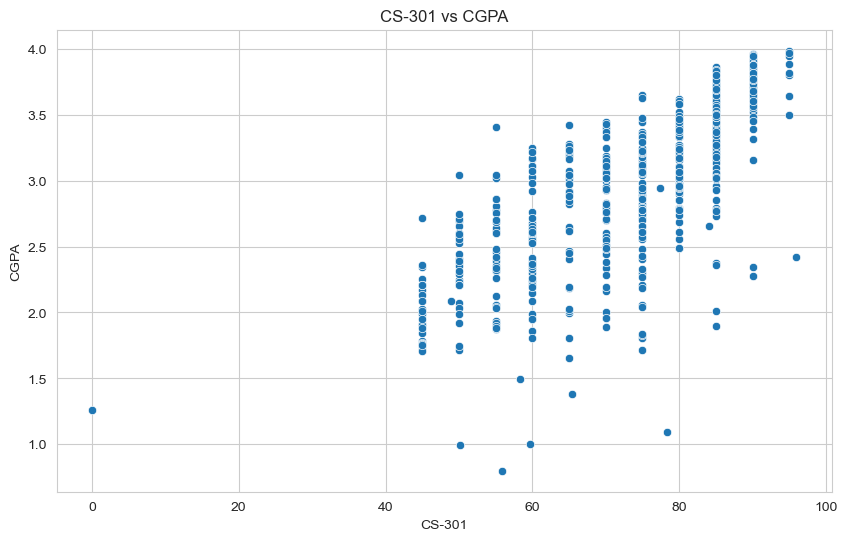

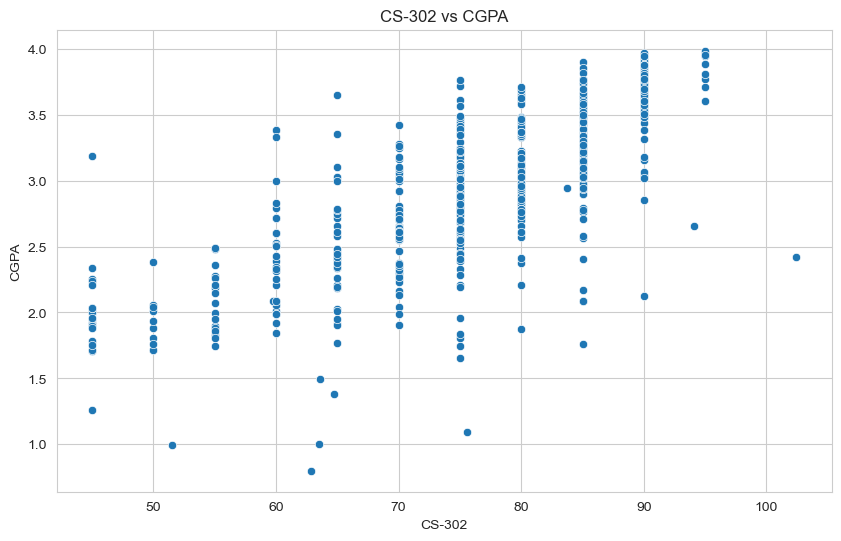

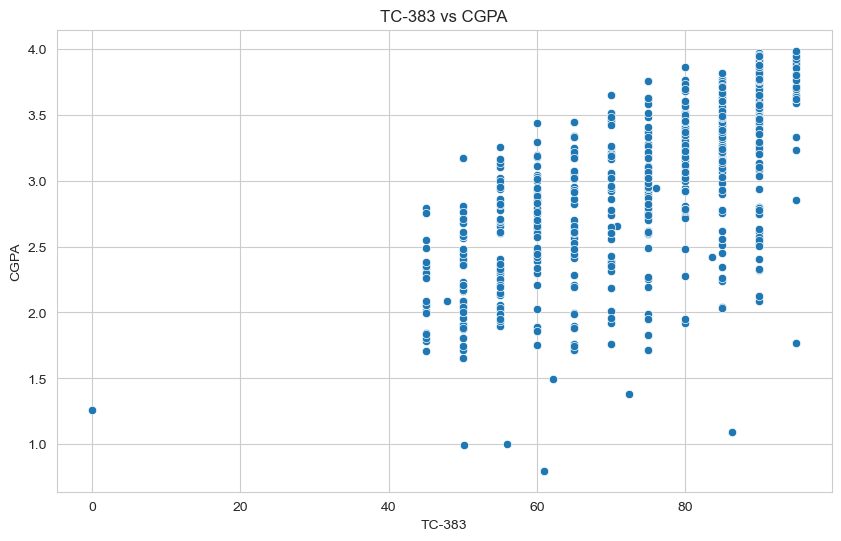

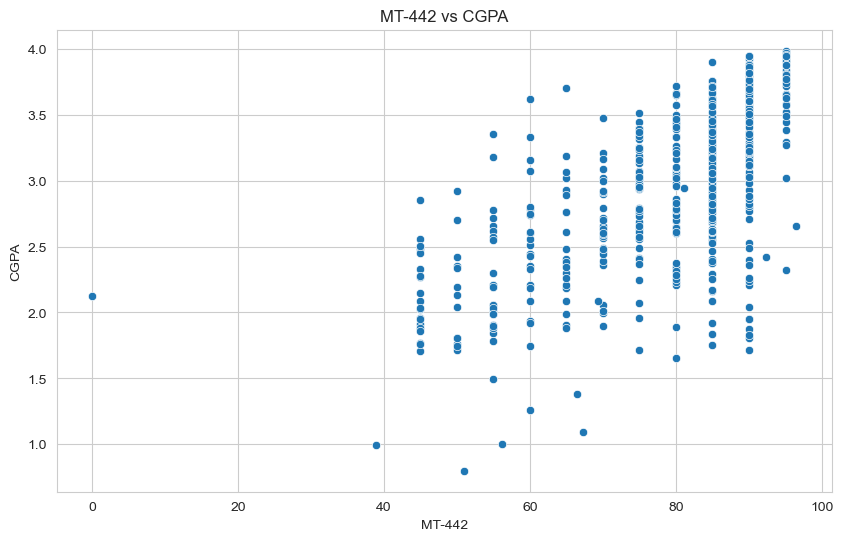

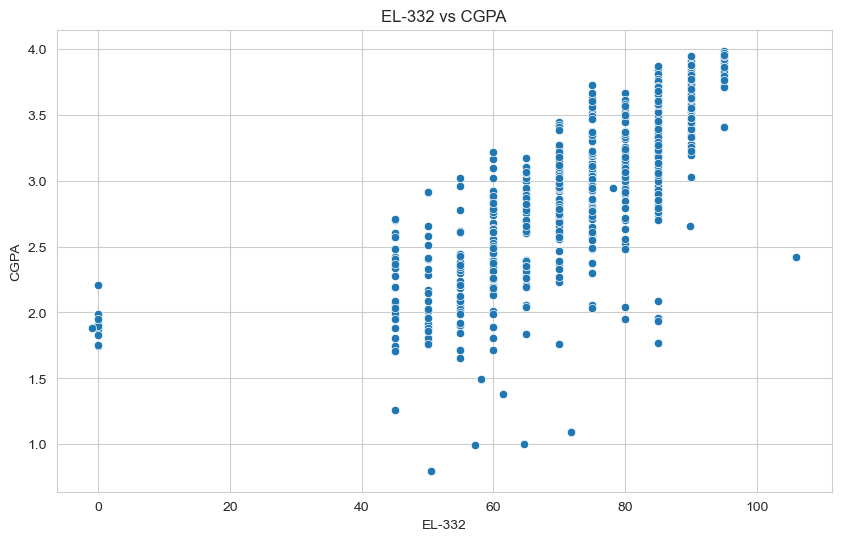

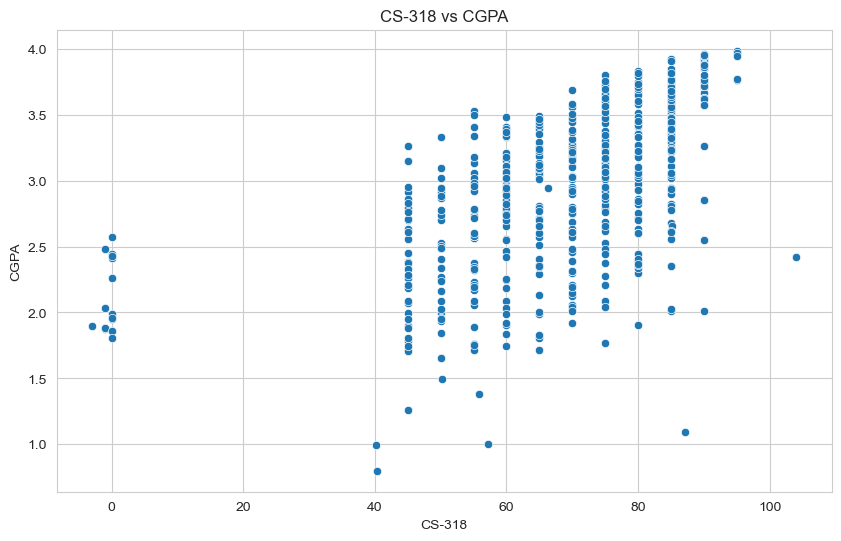

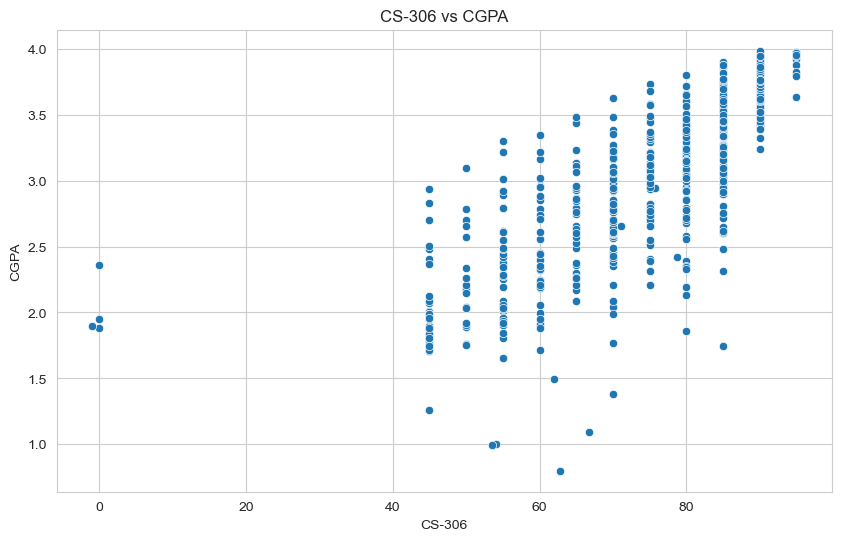

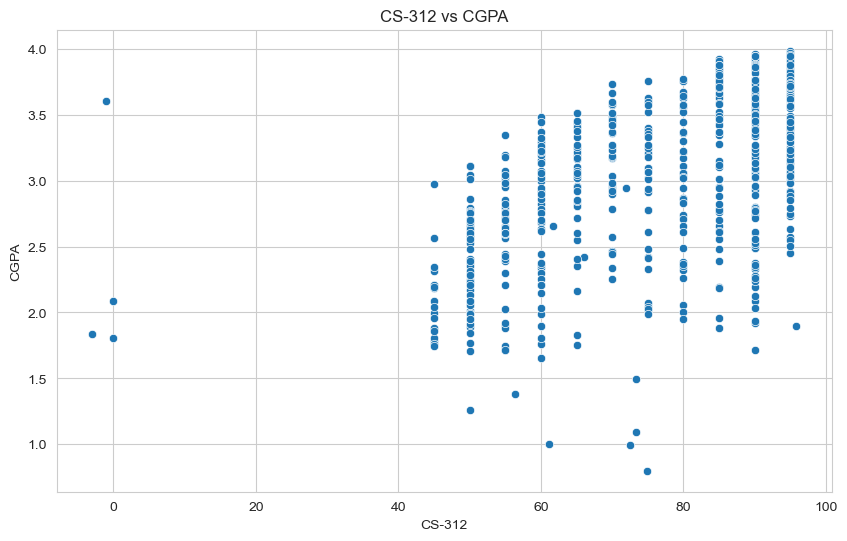

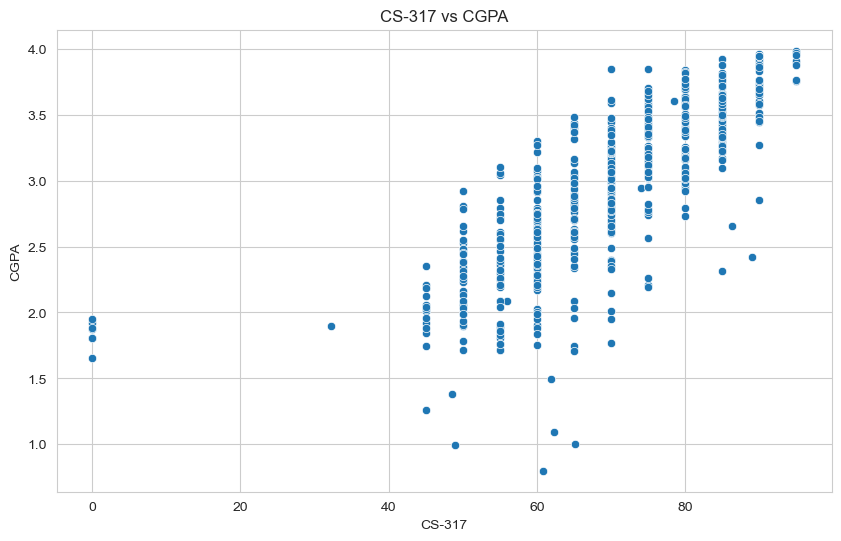

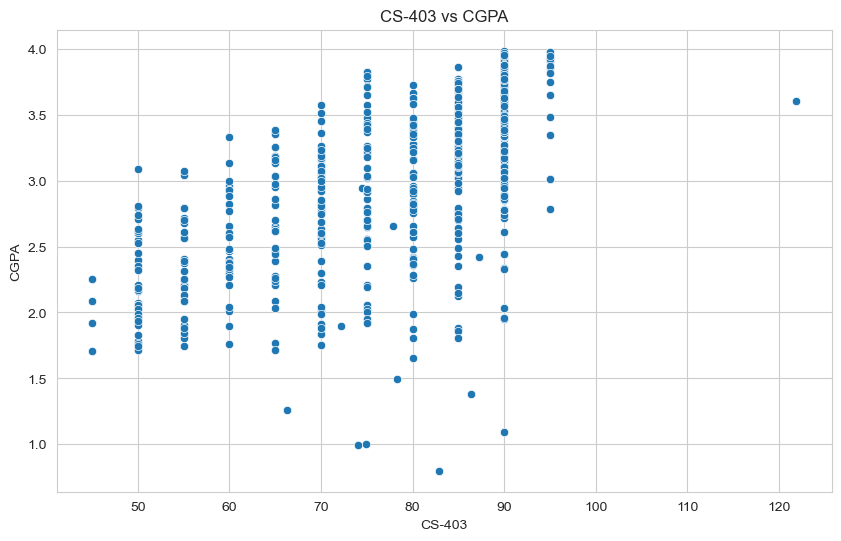

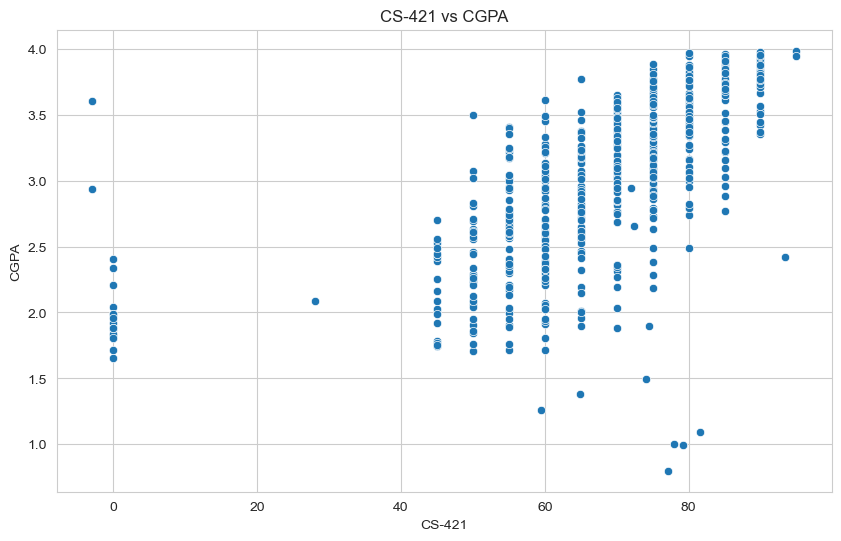

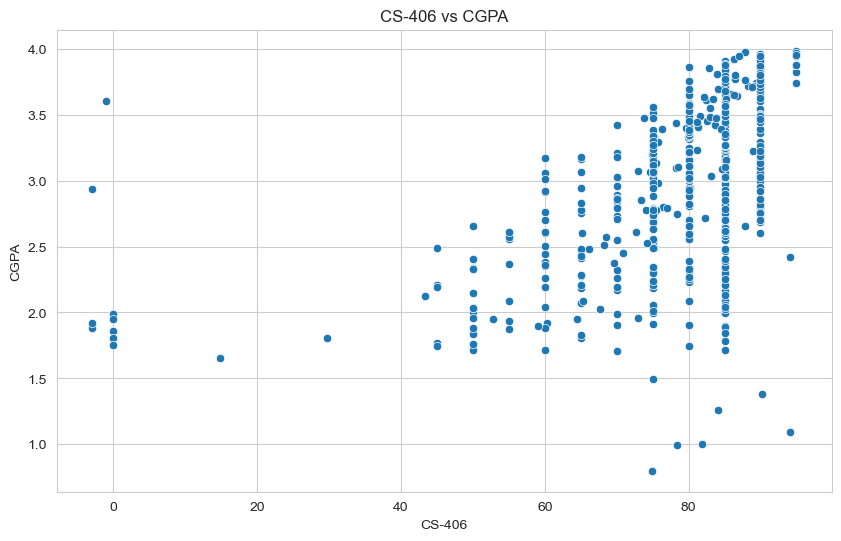

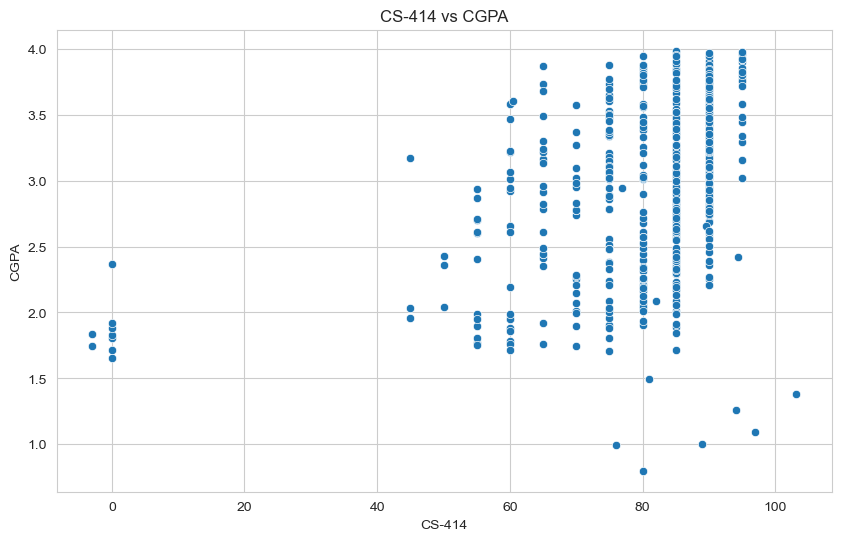

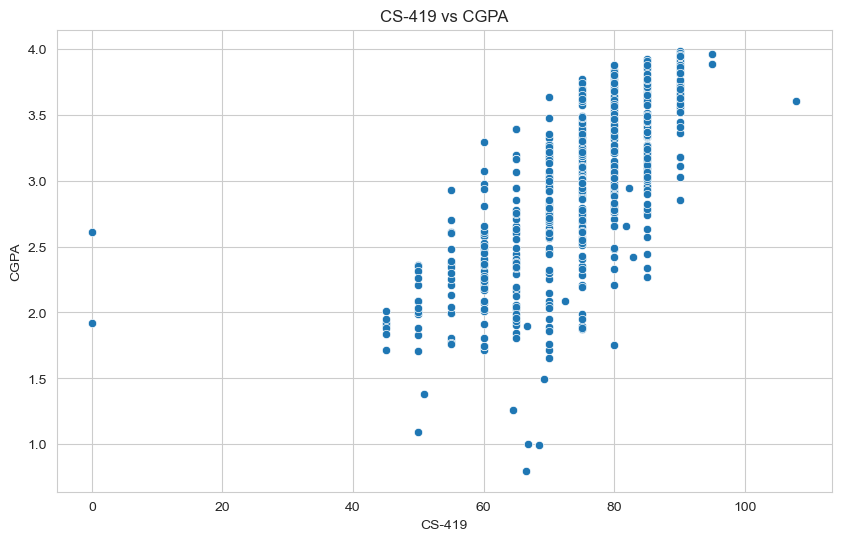

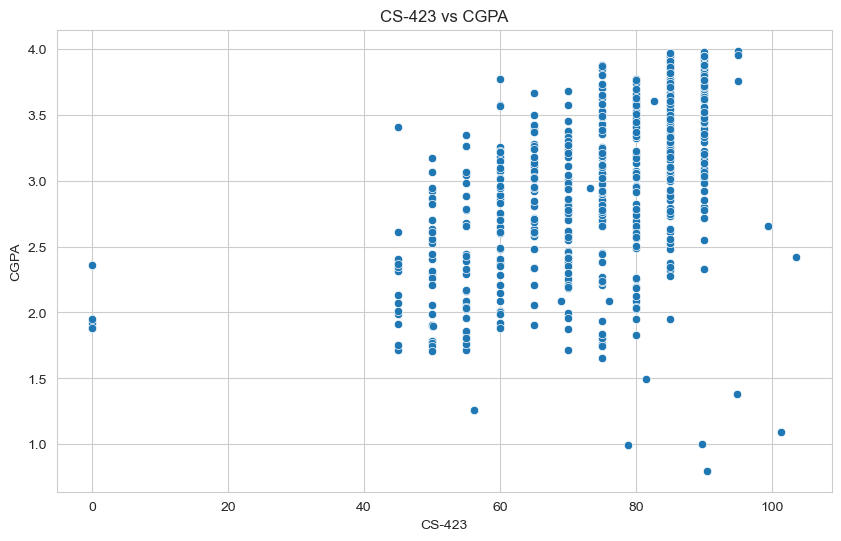

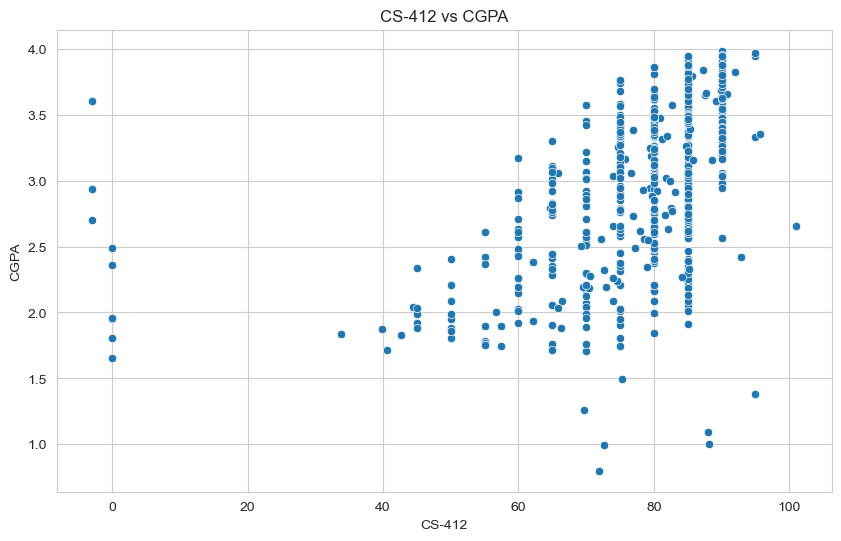

In [55]:
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column], y=df['CGPA'])
    plt.title(f'{column} vs CGPA')
    plt.xlabel(column)
    plt.ylabel('CGPA')
    plt.show()


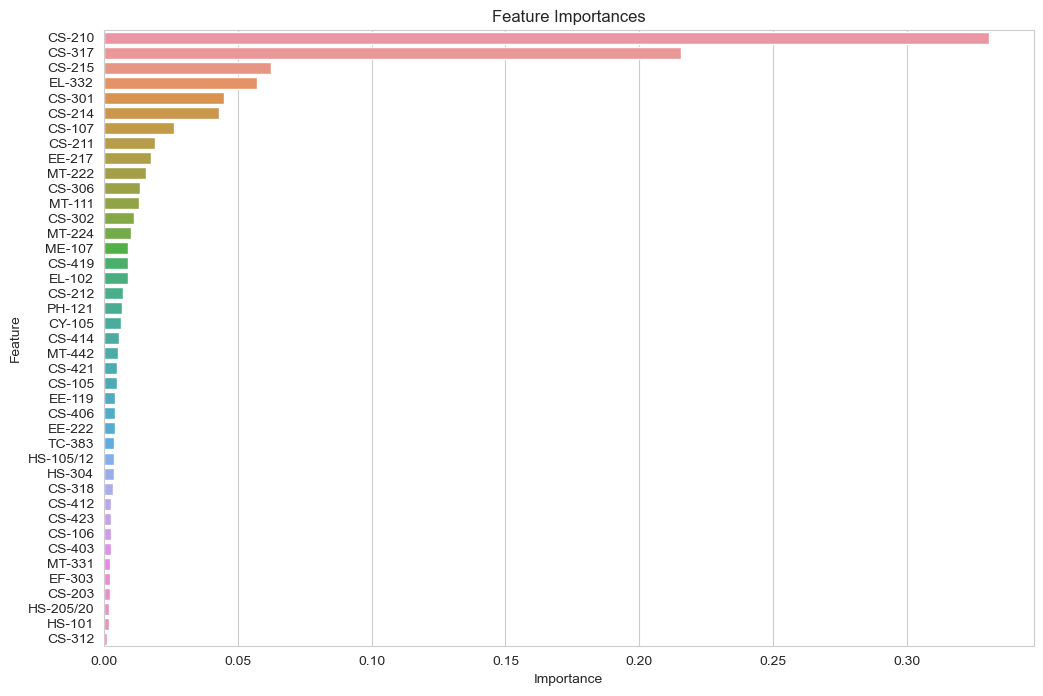

In [56]:
from sklearn.ensemble import RandomForestRegressor


X = df[columns]
y = df['CGPA']


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


feature_importances = pd.Series(model.feature_importances_, index=columns)
feature_importances = feature_importances.sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[columns]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


      feature         VIF
0      PH-121   91.458912
1      HS-101   47.373883
2      CY-105   88.064852
3   HS-105/12   60.697426
4      MT-111   77.801536
5      CS-105  112.139004
6      CS-106   77.431112
7      EL-102   50.000441
8      EE-119   97.065419
9      ME-107   51.739390
10     CS-107   56.183891
11  HS-205/20   86.604322
12     MT-222   48.707153
13     EE-222   63.691679
14     MT-224   83.715325
15     CS-210  134.538967
16     CS-211   66.017457
17     CS-203   70.570393
18     CS-214   72.178920
19     EE-217  101.721845
20     CS-212  101.117405
21     CS-215   79.320482
22     MT-331   53.380918
23     EF-303   72.094240
24     HS-304   62.132150
25     CS-301  106.516528
26     CS-302  128.580167
27     TC-383   87.284168
28     MT-442   74.495573
29     EL-332   67.972954
30     CS-318   39.508276
31     CS-306  102.924006
32     CS-312   70.135567
33     CS-317   84.324766
34     CS-403   91.736732
35     CS-421   51.471670
36     CS-406  103.611955
37     CS-41

Not removing highly correlated features and checking performance of model

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import mean_squared_error, make_scorer

In [60]:
X = df.drop('CGPA', axis=1)
y = df['CGPA']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=13),
    "Lasso Regression": Lasso(random_state=13),
    "Decision Tree": DecisionTreeRegressor(random_state=13),
    "Random Forest": RandomForestRegressor(random_state=13),
    "Gradient Boosting": GradientBoostingRegressor(random_state=7),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(random_state=13),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

In [63]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R² Score: {metrics['R² Score']:.2f}")
    print()

Model: Linear Regression
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00
  R² Score: 0.99

Model: Ridge Regression
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00
  R² Score: 0.99

Model: Lasso Regression
  Mean Absolute Error (MAE): 0.10
  Mean Squared Error (MSE): 0.02
  R² Score: 0.95

Model: Decision Tree
  Mean Absolute Error (MAE): 0.19
  Mean Squared Error (MSE): 0.07
  R² Score: 0.81

Model: Random Forest
  Mean Absolute Error (MAE): 0.07
  Mean Squared Error (MSE): 0.01
  R² Score: 0.97

Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.07
  Mean Squared Error (MSE): 0.01
  R² Score: 0.98

Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.05
  Mean Squared Error (MSE): 0.00
  R² Score: 0.99

Model: XGBoost
  Mean Absolute Error (MAE): 0.09
  Mean Squared Error (MSE): 0.02
  R² Score: 0.96

Model: K-Nearest Neighbors
  Mean Absolute Error (MAE): 0.09
  Mean Squared Error (MSE): 0.01
  R² Score: 0.97



Scaling the inputs


In [65]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.31970295 -1.36916485 -1.56772727 ... -1.68290419  0.0545593
   0.52488865]
 [ 0.97360477 -1.72993694 -1.89789955 ... -1.25940653 -0.97663593
  -0.16993935]
 [ 0.97360477  0.43469562  0.74347876 ...  1.28157944  0.74202279
   0.87230265]
 ...
 [ 0.00362398  1.5170119   0.41330647 ...  0.43458411  0.74202279
   0.52488865]
 [ 0.97360477  0.79546772 -2.22807184 ...  0.01108645 -0.28917244
  -1.21218136]
 [-0.96635681 -1.72993694 -2.22807184 ...  0.43458411 -2.00783116
  -1.55959536]]


In [67]:
X_scaled

array([[-0.31970295, -1.36916485, -1.56772727, ..., -1.68290419,
         0.0545593 ,  0.52488865],
       [ 0.97360477, -1.72993694, -1.89789955, ..., -1.25940653,
        -0.97663593, -0.16993935],
       [ 0.97360477,  0.43469562,  0.74347876, ...,  1.28157944,
         0.74202279,  0.87230265],
       ...,
       [ 0.00362398,  1.5170119 ,  0.41330647, ...,  0.43458411,
         0.74202279,  0.52488865],
       [ 0.97360477,  0.79546772, -2.22807184, ...,  0.01108645,
        -0.28917244, -1.21218136],
       [-0.96635681, -1.72993694, -2.22807184, ...,  0.43458411,
        -2.00783116, -1.55959536]])

In [68]:
X_Scaled=pd.DataFrame(data=X_scaled,columns=X.columns)

In [69]:
X_Scaled

PH-121    HS-101    CY-105  HS-105/12    MT-111    CS-105    CS-106  \
0   -0.319703 -1.369165 -1.567727  -0.800836 -1.207700 -2.399165 -2.112889   
1    0.973605 -1.729937 -1.897900  -1.726257 -0.268592 -1.598742 -2.112889   
2    0.973605  0.434696  0.743479  -0.183889  0.357481  0.802525 -0.284395   
3   -1.936338 -0.286849 -1.897900  -1.726257 -1.833772  0.402314 -1.747190   
4    0.650278  1.156240  0.413306   0.433058  0.983553  0.802525  0.812701   
..        ...       ...       ...        ...       ...       ...       ...   
566  0.003624  1.517012  0.743479   0.741531  1.296589  0.802525  0.812701   
567  1.296932  1.517012  0.743479   1.050005  0.983553  0.802525  1.178400   
568  0.003624  1.517012  0.413306   0.433058  0.983553  0.802525  1.178400   
569  0.973605  0.795468 -2.228072   1.050005 -1.833772 -2.399165 -0.284395   
570 -0.966357 -1.729937 -2.228072  -0.800836 -0.894664 -2.399165  0.081304   

       EL-102    EE-119    ME-107  ...    CS-306    CS-312    CS-317  \
0   -1.152917 -0.382018 -0.894122  ... -0.903276 -1.118826 -0.993967   
1    0.965219 -1.940552 -1.494376  ... -1.914109 -1.408080 -1.667321   
2    0.360037  0.786882  0.906639  ...  0.781444  0.038188  0.352742   
3   -1.152917 -2.330185 -0.293869  ... -1.240221 -1.408080 -0.657289   
4    0.360037  1.176515  0.906639  ...  0.781444 -0.251066  0.689420   
..        ...       ...       ...  ...       ...       ...       ...   
566  0.662628  1.566148  0.606512  ...  0.444500  0.616695  1.026097   
567  0.662628  1.176515  1.206766  ...  0.781444  0.327441  0.689420   
568  0.965219  1.176515  0.306385  ...  0.444500  0.616695  0.352742   
569 -1.152917 -0.382018 -0.894122  ...  0.444500 -1.697333  0.352742   
570 -0.547736 -1.161285 -1.194249  ... -1.577165 -0.540319 -0.657289   

       CS-403    CS-421    CS-406    CS-414    CS-419    CS-423    CS-412  
0   -1.665540 -0.653538  0.476402  0.640455 -1.682904  0.054559  0.524889  
1   -1.284716 -1.236724  0.476402 -0.757363 -1.259407 -0.976636 -0.169939  
2    1.000230 -0.361945  0.807377  0.640455  1.281579  0.742023  0.872303  
3   -2.046365 -0.653538 -0.516523 -0.407909 -0.835909 -0.632904 -0.864767  
4    0.238581  0.221241  0.476402  0.640455  0.858082  0.742023  0.872303  
..        ...       ...       ...       ...       ...       ...       ...  
566  1.000230  1.387614  0.807377 -0.058454  0.434584  0.054559  0.872303  
567  1.000230  1.387614  0.476402 -0.407909  0.858082 -0.976636  0.524889  
568  1.000230  0.804427  0.807377 -1.456272  0.434584  0.742023  0.524889  
569 -0.142243 -0.653538 -2.171398 -1.456272  0.011086 -0.289172 -1.212181  
570 -0.523067 -1.236724 -5.150174 -1.805726  0.434584 -2.007831 -1.559595  

[571 rows x 41 columns]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=57)

In [71]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R² Score": r2
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']:.2f}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R² Score: {metrics['R² Score']:.2f}")
    print()

Model: Linear Regression
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00
  R² Score: 0.99

Model: Ridge Regression
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00
  R² Score: 0.99

Model: Lasso Regression
  Mean Absolute Error (MAE): 0.49
  Mean Squared Error (MSE): 0.36
  R² Score: -0.00

Model: Decision Tree
  Mean Absolute Error (MAE): 0.19
  Mean Squared Error (MSE): 0.07
  R² Score: 0.81

Model: Random Forest
  Mean Absolute Error (MAE): 0.07
  Mean Squared Error (MSE): 0.01
  R² Score: 0.97

Model: Gradient Boosting
  Mean Absolute Error (MAE): 0.07
  Mean Squared Error (MSE): 0.01
  R² Score: 0.98

Model: Support Vector Regressor
  Mean Absolute Error (MAE): 0.05
  Mean Squared Error (MSE): 0.01
  R² Score: 0.99

Model: XGBoost
  Mean Absolute Error (MAE): 0.09
  Mean Squared Error (MSE): 0.02
  R² Score: 0.96

Model: K-Nearest Neighbors
  Mean Absolute Error (MAE): 0.08
  Mean Squared Error (MSE): 0.01
  R² Score: 0.97



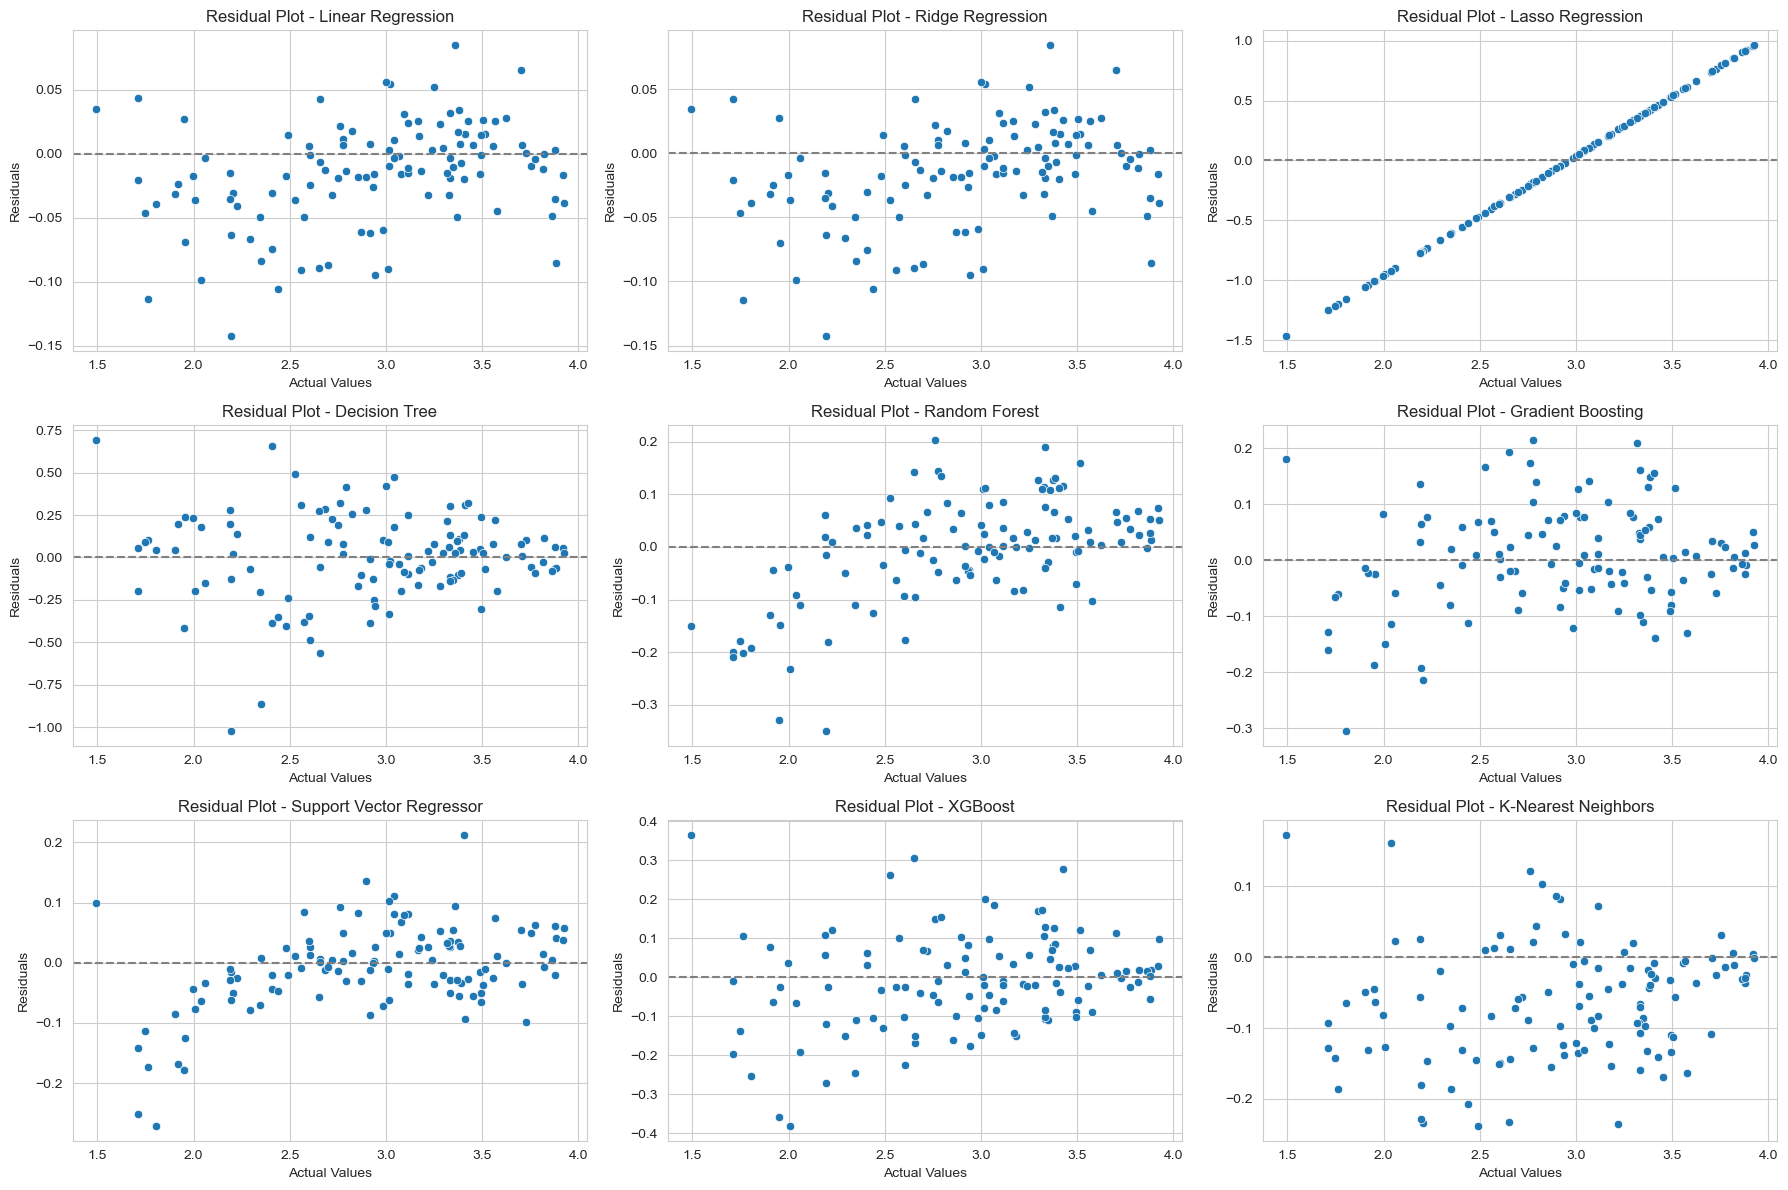

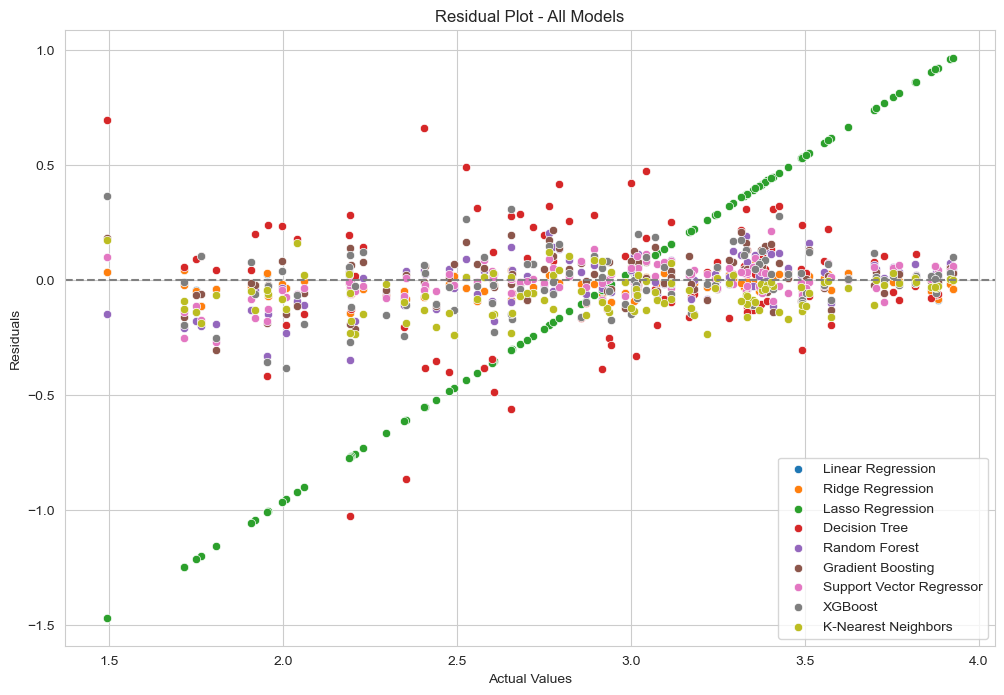

In [72]:
plt.figure(figsize=(18, 12))
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {model_name}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    residuals = y_test - y_pred
    
    sns.scatterplot(x=y_test, y=residuals, label=model_name)

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - All Models')
plt.legend()
plt.show()

Ridge and Linear Regression Performs best

In [75]:
from sklearn.metrics import r2_score


split_random_states = range(1, 157)
model_random_states = range(1, 157)

best_split_random_state = None
best_model_random_state = None
best_r2_score = -float('inf')

for split_state in split_random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=split_state)
    
    for model_state in model_random_states:
        model = Ridge(random_state=model_state)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        
        if r2 > best_r2_score:
            best_r2_score = r2
            best_split_random_state = split_state
            best_model_random_state = model_state

print(f"The best random state for train-test split is {best_split_random_state}")
print(f"The best random state for Ridge Regressor is {best_model_random_state}")
print(f"The best R² score achieved is {best_r2_score:.4f}")


The best random state for train-test split is 97
The best random state for Ridge Regressor is 1
The best R² score achieved is 0.9952


In [76]:
from sklearn.model_selection import cross_validate, KFold
model = Ridge(random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=8)

scoring = {
    'mse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

cv_results = cross_validate(estimator=model,
                            X=X, y=y,
                            scoring=scoring,
                            cv=kf,
                            n_jobs=-1)

print("Cross-Validation Results:")
for fold_idx in range(1, kf.get_n_splits() + 1):
    print(f"Fold {fold_idx}:")
    print(f"  R² Score: {cv_results['test_r2'][fold_idx-1]:.2f}")
    print(f"  Mean Absolute Error (MAE): {cv_results['test_mae'][fold_idx-1]:.2f}")
    print(f"  Mean Squared Error (MSE): {cv_results['test_mse'][fold_idx-1]:.2f}")
    print()

average_r2 = cv_results['test_r2'].mean()
average_mae = cv_results['test_mae'].mean()
average_mse = cv_results['test_mse'].mean()

print("Average Metrics across all folds:")
print(f"  Average R² Score: {average_r2:.2f}")
print(f"  Average Mean Absolute Error (MAE): {average_mae:.2f}")
print(f"  Average Mean Squared Error (MSE): {average_mse:.2f}")

Cross-Validation Results:
Fold 1:
  R² Score: 0.99
  Mean Absolute Error (MAE): 0.04
  Mean Squared Error (MSE): 0.00

Fold 2:
  R² Score: 0.99
  Mean Absolute Error (MAE): 0.04
  Mean Squared Error (MSE): 0.00

Fold 3:
  R² Score: 0.99
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00

Fold 4:
  R² Score: 0.99
  Mean Absolute Error (MAE): 0.04
  Mean Squared Error (MSE): 0.00

Fold 5:
  R² Score: 0.99
  Mean Absolute Error (MAE): 0.03
  Mean Squared Error (MSE): 0.00

Average Metrics across all folds:
  Average R² Score: 0.99
  Average Mean Absolute Error (MAE): 0.04
  Average Mean Squared Error (MSE): 0.00
